<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта-и-набора-данных" data-toc-modified-id="Описание-проекта-и-набора-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта и набора данных</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Предварительная-обработка-данных" data-toc-modified-id="Предварительная-обработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предварительная обработка данных</a></span></li><li><span><a href="#Постановка-задачи-и-построение-модели" data-toc-modified-id="Постановка-задачи-и-построение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Постановка задачи и построение модели</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Оценка-модели-и-результатов" data-toc-modified-id="Оценка-модели-и-результатов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка модели и результатов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Описание проекта и набора данных

### Описание проекта

Из Банка Х стали уходить клиенты. Наблюдается ежемесячный отток, который становится заметным. По мнению маркетологов сохранение текущих клиентов дешевле, чем привлечение новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Анализируются исторические данные о поведении клиентов и расторжении договоров с банком. 

Метрика, использованная в проекте F1- score (F1-мера).
F1- score (F1-мера) - агрегируюшая метрика, позволяющая параллельно контролировать полноту и точность и являющаяся средним гармоническим полноты и точности. Полнота и точность оченивают качество прогноза положительного класса с разных позиций. Recall описывает, насколько хорошо модель распознает классы, при этом Precision выявляет ситуацию, когда положительные метрики присваиваются излишне часто. Когда полнота или точность близки к нулю, то к 0 приближается и само среднее гармоническое.
Пороговое значение метрики F1-score - 0.59. 


Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Описание данных
Данные находятся в файле Churn.csv (англ. «отток клиентов»).
 
*Признаки*
 
 - RowNumber — индекс строки в данных
 - CustomerId — уникальный идентификатор клиента
 - Surname — фамилия
 - CreditScore — кредитный рейтинг
 - Geography — страна проживания
 - Gender — пол
 - Age — возраст
 - Tenure — сколько лет человек является клиентом банка
 - Balance — баланс на счёте
 - NumOfProducts — количество продуктов банка, используемых клиентом
 - HasCrCard — наличие кредитной карты
 - IsActiveMember — активность клиента
 - EstimatedSalary — предполагаемая зарплата
 
*Целевой признак*
 
 - Exited — факт ухода клиента

## Предварительная обработка данных

In [1]:
import sklearn

In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.3.


In [3]:
!pip install imblearn

In [4]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [5]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from imblearn.pipeline import make_pipeline
from  imblearn import under_sampling, over_sampling
from imblearn import datasets
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = 200
import warnings
warnings.filterwarnings("ignore")

In [6]:
! pip install missingno

In [7]:
import missingno as msno

In [8]:
SCORING = ['f1','roc_auc']

In [9]:
df = pd.read_csv('Churn.csv') # загрузим данные из файла в датафрейм
df.head() # выведем на экран первые 5 строк датафрейма

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [10]:
df.info() # посмотрим общую информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe() # посмотрим основные статистические параменты датафрейма с помощью метода discribe()

RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

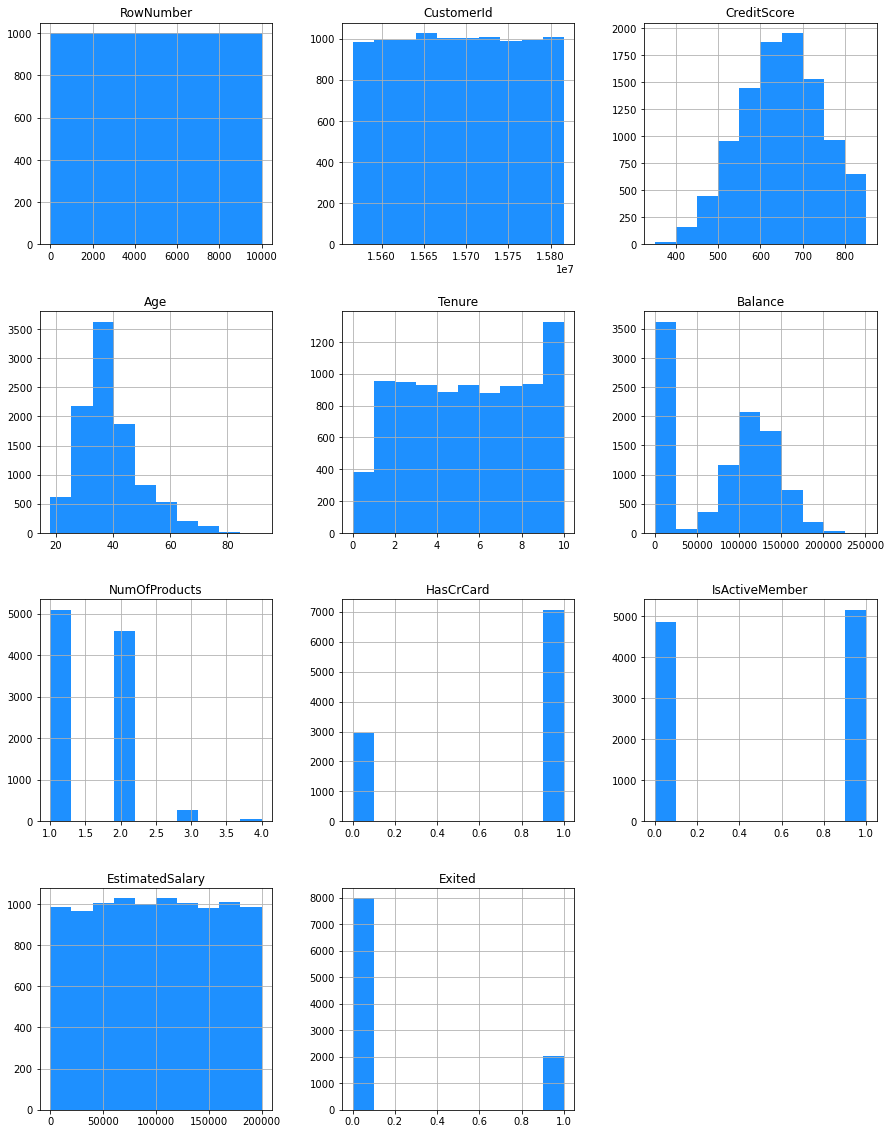

In [12]:
df.hist(figsize=(15,20),color='dodgerblue')# Построим общую гисnограмму для всех столбцов таблицы
plt.show()

In [13]:
df.duplicated().sum() # проверим наличие явных дубликатов

0

Явные дубликаты в датасете отстутствуют.

Проверим наличие неявных дубликатов в столбцах с типом object: Surname, Geography, Gender.

In [14]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
df['Surname'].value_counts().head(30)

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Yeh         25
Shih        25
Genovese    25
Maclean     24
Wright      24
Wilson      23
White       23
Ma          23
Fanucci     23
Wang        22
Johnson     22
Moore       22
Chu         22
Lu          22
Thompson    21
Mai         21
McGregor    21
Sun         21
Kao         20
Fang        20
Watson      20
Kennedy     20
Hughes      20
Jamieson    20
Young       20
Name: Surname, dtype: int64

В датасете неявные дубликаты не выявлены, наличие в датасете однофамильцев не является признаком наличия неявных дубликатов, это логично.

In [18]:
df.isna().sum() # определяем в каких столбцах и сколько пропущенных значений

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [19]:
df.isna().mean() # определяем в каких столбцах и сколько пропущенных значений

RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

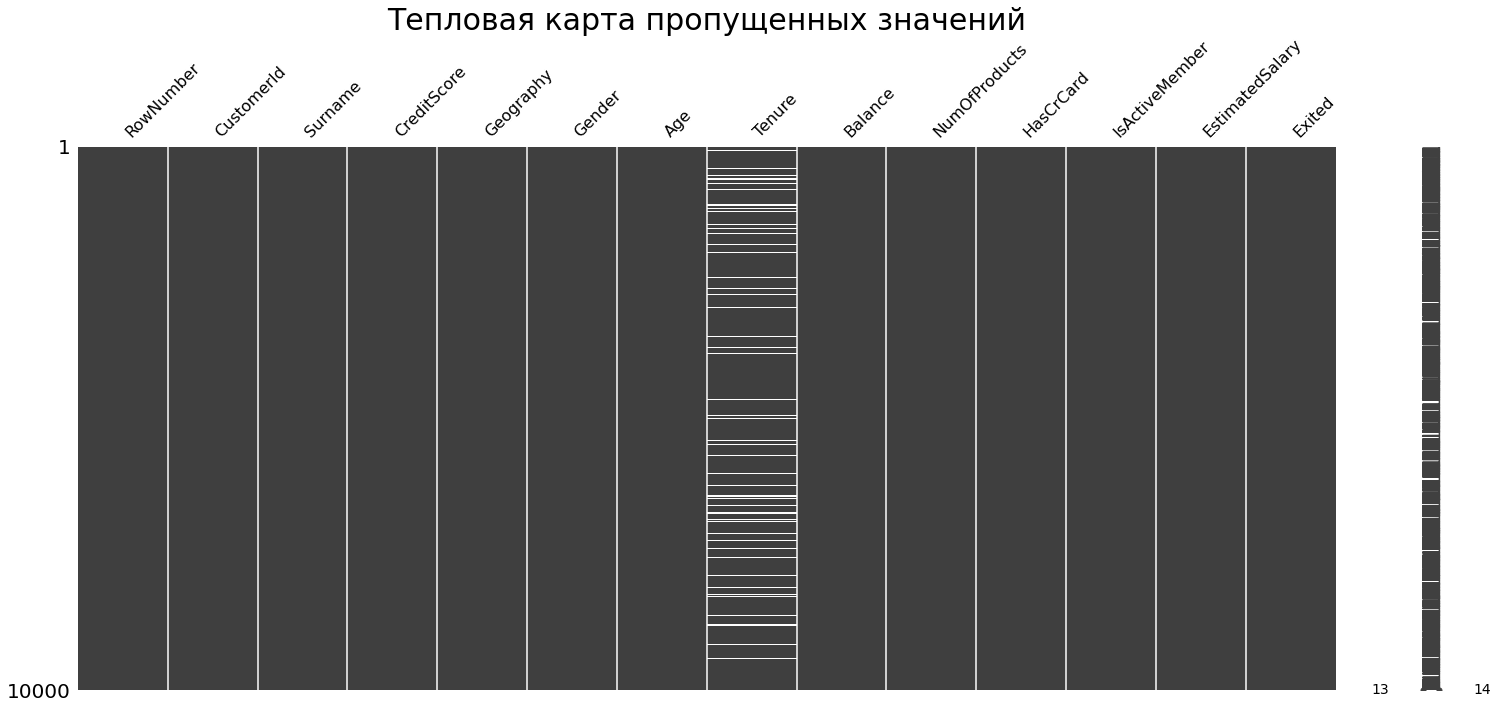

In [20]:
msno.matrix(df).set_title('Тепловая карта пропущенных значений', fontsize=30)
plt.show()

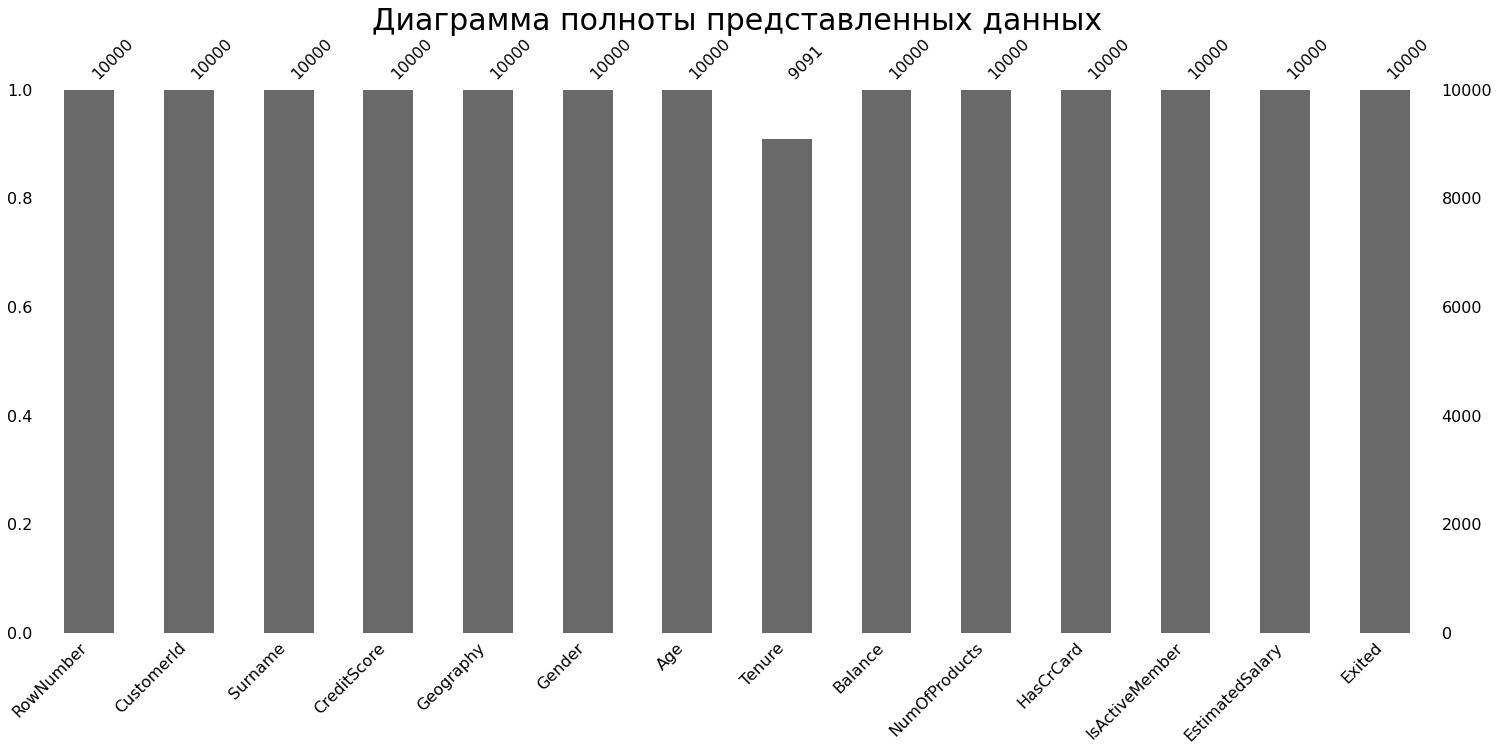

In [21]:
msno.bar(df)
plt.title('Диаграмма полноты представленных данных', fontsize=30)
plt.show()

In [22]:
df[df['Tenure'].isnull()].head(10) # посмотрим строки, содержащие пропуски в данном столбце

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
30          31    15589475    Azikiwe          591     Spain  Female   39   
48          49    15766205        Yin          550   Germany    Male   38   
51          52    15768193  Trevisani          585   Germany    Male   36   
53          54    15702298   Parkhill          655   Germany    Male   41   
60          61    15651280     Hunter          742   Germany    Male   35   
82          83    15641732      Mills          543    France  Female   36   
85          86    15805254    Ndukaku          652     Spain  Female   75   
94          95    15676966      Capon          730     Spain    Male   42   
99         100    15633059    Fanucci          413    France    Male   34   
111        112    15665790   Rowntree          538   Germany    Male   39   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
30      NaN       0.00              3          1               0   
48      NaN  103391.38              1          0               1   
51      NaN  146050.97              2          0               0   
53      NaN  125561.97              1          0               0   
60      NaN  136857.00              1          0               0   
82      NaN       0.00              2          0               0   
85      NaN       0.00              2          1               1   
94      NaN       0.00              2          0               1   
99      NaN       0.00              2          0               0   
111     NaN  108055.10              2          1               0   

     EstimatedSalary  Exited  
30         140469.38       1  
48          90878.13       0  
51          86424.57       0  
53         164040.94       1  
60          84509.57       0  
82          26019.59       0  
85         114675.75       0  
94          85982.47       0  
99           6534.18       0  
111         27231.26       0

В датасете присутствуют пропущенные значения только в одном столбце Tunure - сколько лет человек является клиентом банка. Количество пропущенных значений 909 шт или 9.09% общего объема данных. Заполним пропущенные значения на этапе анализа признаков.

Проанализируем количественные признаки на наличие аномальных данных и выбросов. Для этого используем метод describe() - для анализа статистических характеристик, метод value_counts() - позволяющий детальнее проанализировать значения в столбце и диаграмму размаха boxplot(), гистограммы.

- столбец CreditScore

In [23]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [24]:
df['CreditScore'].value_counts().head(20)

850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
648     48
660     48
682     47
663     47
640     47
637     46
714     45
686     45
710     45
645     45
Name: CreditScore, dtype: int64

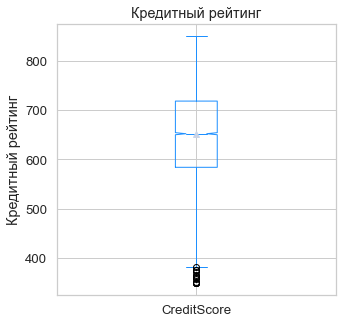

In [25]:
plt.figure(figsize=(5, 5))
sns.set(style='whitegrid', font_scale=1.2, palette = 'Pastel2')
box=df.boxplot(column = 'CreditScore', color='dodgerblue', showmeans=True, grid=True, notch = True)
plt.ylabel('Кредитный рейтинг')
plt.title('Кредитный рейтинг')
plt.show()

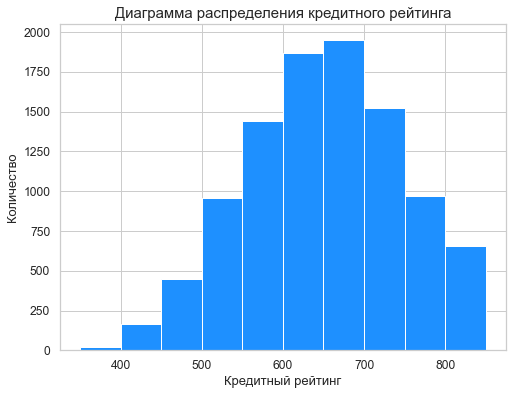

In [26]:
col = df['CreditScore']
sns.set(style='whitegrid', font_scale=1.1)
col.hist( bins=10,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма распределения кредитного рейтинга', fontsize=15)
plt.xlabel('Кредитный рейтинг', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

В данном столбце указаны данные о кредитном рейтинга клиентов банка. Диапазон кредитного рейтинга, представленного в датасете, от 350 до 850. Среднее значение около 650. В данных присутствуют выбросы в части данных кредитного рейтинга до 380, но в целом данные выглядят непротиворечиво. Поэтому мы не будем в данном случае удалять данные выбросы.

- столбец Age

In [27]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [28]:
df['Age'].value_counts().head(20)

37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
Name: Age, dtype: int64

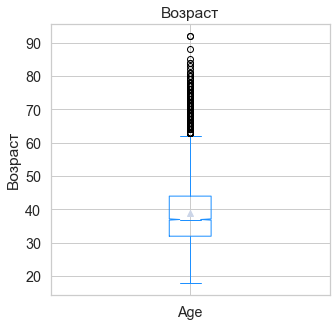

In [29]:
plt.figure(figsize=(5, 5))
sns.set(style='whitegrid', font_scale=1.3, palette = 'Pastel2')
box=df.boxplot(column = 'Age', color='dodgerblue', showmeans=True, grid=True, notch = True)
plt.ylabel('Возраст')
plt.title('Возраст')
plt.show()

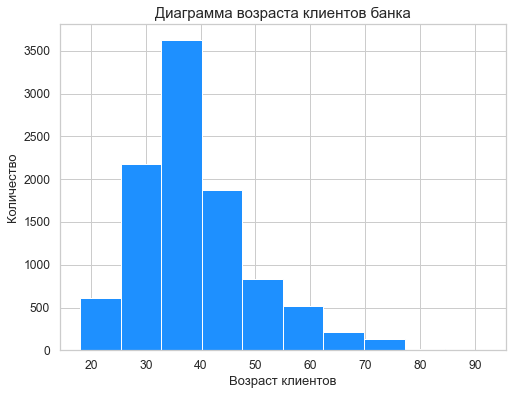

In [30]:
col = df['Age']
sns.set(style='whitegrid', font_scale=1.1)
col.hist( bins=10,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма возраста клиентов банка', fontsize=15)
plt.xlabel('Возраст клиентов', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

В столбце представлены данные о возрасте клиентов банка. Клиенты банка имеют возраст от 18 до 92 лет. Данные выглядят непротиворечиво. Скорее всего возрастное ограничение на открытие счета - 18 лет. Более возрастные клиенты более редки , в связи с этим мы наблюдаем выбросы начиная с 63 лет. Удалять данную группу клиентов неверно, так как она, хоть и не такая многочисленная, как другие возрастные группы, но тем не менее интересно проанализировать эти данные, они могут быть индикатором того, что услугами банка может быть неудобно пользоваться возврастным клиентам и данный факт может быть одним из источников ухода клиентов. 

- столбец Tenure

In [31]:
df['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [32]:
df['Tenure'].value_counts().head(20)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

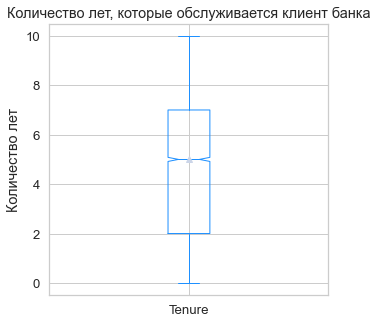

In [33]:
plt.figure(figsize=(5, 5))
sns.set(style='whitegrid', font_scale=1.2, palette = 'Pastel2')
box=df.boxplot(column = 'Tenure', color='dodgerblue', showmeans=True, grid=True, notch = True)
plt.ylabel('Количество лет')
plt.title('Количество лет, которые обслуживается клиент банка')
plt.show()

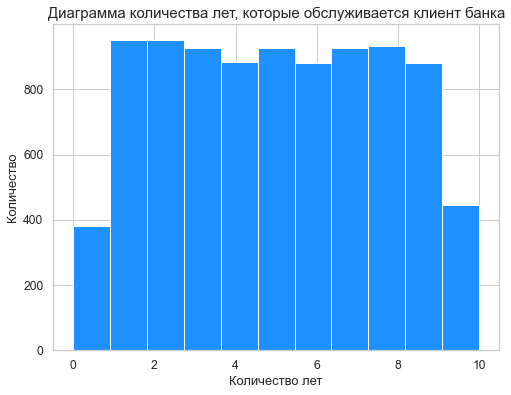

In [34]:
col = df['Tenure']
sns.set(style='whitegrid', font_scale=1.1)
col.hist(bins=11,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма количества лет, которые обслуживается клиент банка', fontsize=15)
plt.xlabel('Количество лет', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

В основном клиенты банка обслуживаются от 1 до 10 лет, наименее представлены новые клиенты до 1 года и свыше 9 лет. Остальные группы представлены довольно равномерно. 

Заполним пропущенные значения медианным значением (оно практически совпадает со средним значением). Нам важно заполнить пропуски, так как не все алгоритмы классификации могут работать с пропущенными значениями.

In [35]:
# заменим NaN в столбце на медиану
df['Tenure'].fillna((df['Tenure'].median()), inplace=True) 

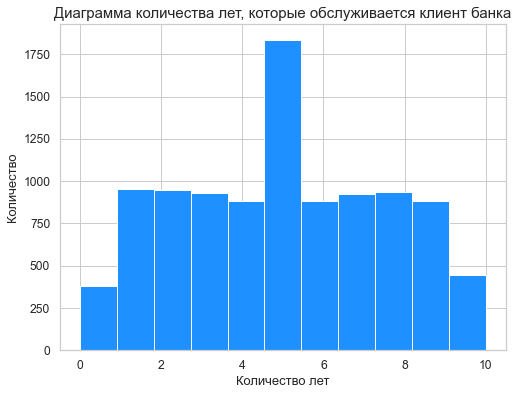

In [36]:
col = df['Tenure']
sns.set(style='whitegrid', font_scale=1.1)
col.hist(bins=11,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма количества лет, которые обслуживается клиент банка', fontsize=15)
plt.xlabel('Количество лет', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

In [37]:
df['Tenure'].describe()

count    10000.00000
mean         4.99790
std          2.76001
min          0.00000
25%          3.00000
50%          5.00000
75%          7.00000
max         10.00000
Name: Tenure, dtype: float64

Как видно, значение среднего практически не изменилось было 4.997690 стало 4.99790, медиана не изменилась осталась -5, стандартное отклонение ожидаемо немного снизилось было- 2.894723 стало- 2.76001. Таким образом, распределение признака не исказилось.

Проверим, удалось ли нам заполнить все пропущенные значения.

In [38]:
df.isna().sum() # определяем в каких столбцах и сколько пропущенных значений

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- столбец Balance

In [39]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [40]:
df['Balance'].value_counts().head(20)

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
144238.70       1
112262.84       1
109106.80       1
142147.32       1
109109.33       1
146587.30       1
79896.00        1
132371.30       1
85859.76        1
69365.25        1
197715.93       1
95502.21        1
79857.64        1
142643.54       1
120923.52       1
Name: Balance, dtype: int64

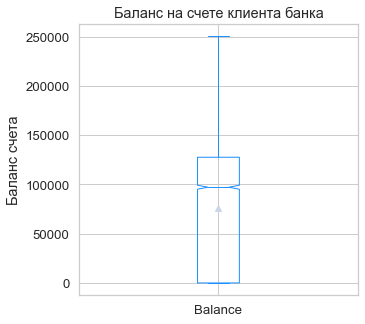

In [41]:
plt.figure(figsize=(5, 5))
sns.set(style='whitegrid', font_scale=1.2, palette = 'Pastel2')
box=df.boxplot(column = 'Balance', color='dodgerblue', showmeans=True, grid=True, notch = True)
plt.ylabel('Баланс счета')
plt.title('Баланс на счете клиента банка')
plt.show()

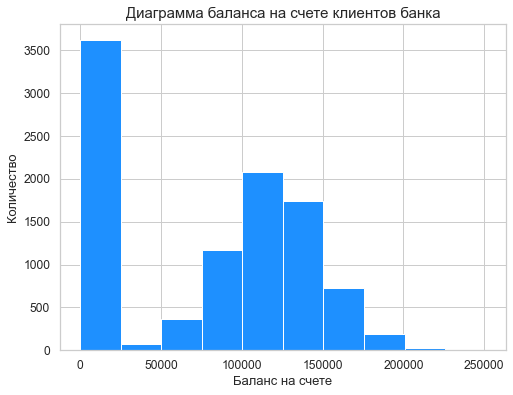

In [42]:
col = df['Balance']
sns.set(style='whitegrid', font_scale=1.1)
col.hist( bins=10,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма баланса на счете клиентов банка', fontsize=15)
plt.xlabel('Баланс на счете', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

В столбце представлены данные о балансе средств на счетах клиентов. Данные можно условно разделить на две группы - одна группа нулевые остатки, в том числе, возможно, по ушедшим клиентам и тем клиентам, которые планируют отказаться от услуг банка. Распределение средств действующих клиентов близко к нормальному. 

- столбец NumOfProducts

In [43]:
df['NumOfProducts'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

In [44]:
df['NumOfProducts'].value_counts().head(20)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

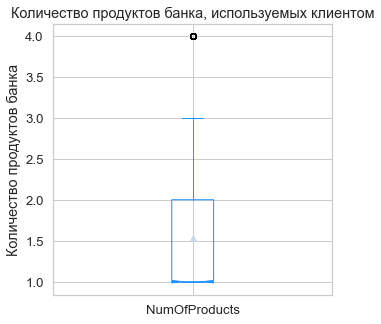

In [45]:
plt.figure(figsize=(5, 5))
sns.set(style='whitegrid', font_scale=1.2, palette = 'Pastel2')
box=df.boxplot(column = 'NumOfProducts', color='dodgerblue', showmeans=True, grid=True, notch = True)
plt.ylabel('Количество продуктов банка')
plt.title('Количество продуктов банка, используемых клиентом')
plt.show()

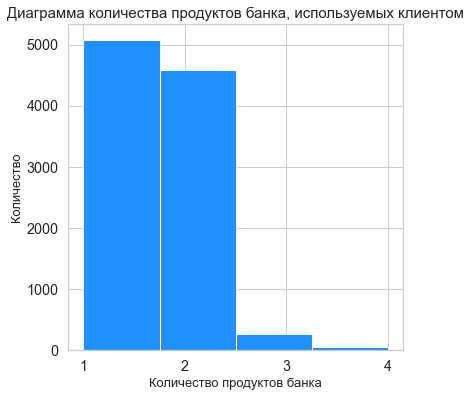

In [46]:
col = df['NumOfProducts']
sns.set(style='whitegrid', font_scale=1.3)
col.hist( bins=4,figsize=(6,6),color='dodgerblue')
plt.title ('Диаграмма количества продуктов банка, используемых клиентом', fontsize=15)
plt.xlabel('Количество продуктов банка', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks([1, 2, 3, 4], rotation=0)
plt.show ()

Данный столбец содержит данные о количестве использованных продуктов банка(от 1 до 4). В основном клиенты пользуются 1-2 продуктами, реже 3-4. 

- столбец EstimatedSalary

In [47]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [48]:
df['EstimatedSalary'].value_counts().head(20)

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
4993.94      1
124964.82    1
161971.42    1
39488.04     1
187811.71    1
121505.61    1
184514.01    1
121311.12    1
12873.39     1
157238.05    1
123242.11    1
184399.76    1
57323.18     1
89874.82     1
31422.69     1
Name: EstimatedSalary, dtype: int64

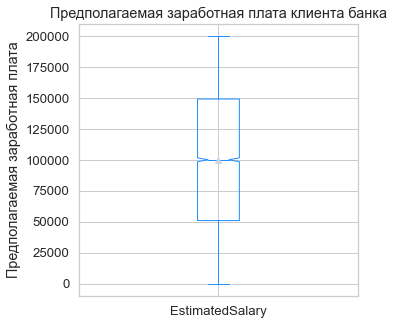

In [49]:
plt.figure(figsize=(5, 5))
sns.set(style='whitegrid', font_scale=1.2, palette = 'Pastel2')
box=df.boxplot(column = 'EstimatedSalary', color='dodgerblue', showmeans=True, grid=True, notch = True)
plt.ylabel('Предполагаемая заработная плата')
plt.title('Предполагаемая заработная плата клиента банка')
plt.show()

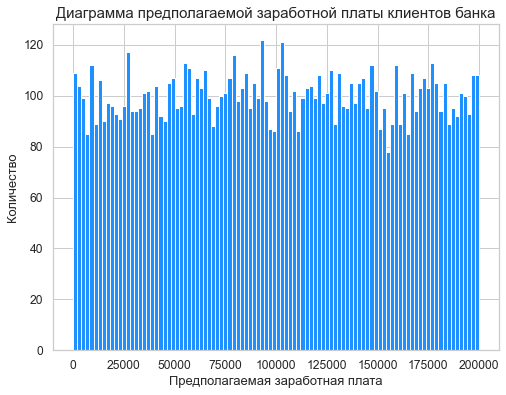

In [50]:
col = df['EstimatedSalary']
sns.set(style='whitegrid', font_scale=1.1)
col.hist( bins=100,figsize=(8,6),color='dodgerblue')
plt.title ('Диаграмма предполагаемой заработной платы клиентов банка', fontsize=15)
plt.xlabel('Предполагаемая заработная плата', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.xticks(rotation=360)
plt.show ()

Столбец содержит данные о предполагаемой заработной плате клиентов банка - разброс очень существенный от 11.58 до 199992.48. У нас отсутствует информация о методе оценки предполагаемой заработной платы. В целом по группам распределение выглядит достаточно равномерным, не смотря на существенную разницу между максимумом и минимумом. Значение 11.58 выглядит не очень правдоподобным, тем не менее, как мы видим, значений близких к нулю достаточно много. Оставим столбец без изменений , для снижения влияния различного масштаба данных в разных солбцах датафрейма в дальнейшем используем масштабирование.

Не смотря на то, что столбцы HasCrCard и IsActiveMember имеют количественное значение, данные столбцы содержат качественные признаки.

- столбец HasCrCard

In [51]:
df['HasCrCard'].value_counts().head()

1    7055
0    2945
Name: HasCrCard, dtype: int64

- столбец IsActiveMember

In [52]:
df['IsActiveMember'].value_counts().head()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

И, наконец, посмотрим целевой признак.

- столбец Exited

In [53]:
df['Exited'].value_counts().head()

0    7963
1    2037
Name: Exited, dtype: int64

На основе анализа можно констатировать наличие дисбаланса классов в представленном датасете.

Теперь посмотрим корреляцию признаков.

Корреляция — коэффициент, который характеризует взаимозависимость двух или нескольких случайных величин. Суть ее заключается в том, что при изменении значения одной переменной происходит закономерное изменение (уменьшение или увеличение) другой переменной.
Корреляция не говорит о причинно-следственных связях, она говорит лишь о взаимосвязанности рассматриваемых параметров, причем в данной конкретной выборке, в другой выборке мы можем не наблюдать полученные корреляции.

Для численной оценки корреляции находят коэффициент корреляции Пирсона. Он помогает определить наличие линейной связи между величинами. Коэффициент корреляции варьируется в пределах от -1 (отрицательная корреляция) до +1 (положительная корреляция). Если коэффициент корреляции равен 0 то, это говорит об отсутствии корреляционных связей между переменными. Если коэффициент корреляции ближе к 1 или -1, то это говорит о сильной корреляции, а если ближе к 0 — о слабой корреляции. Бывает, что коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер. 

При положительной корреляции увеличение (или уменьшение) значений одной переменной ведет к закономерному увеличению (или уменьшению) другой переменной, т.е. взаимосвязи типа увеличение-увеличение (уменьшение-уменьшение).

При отрицательной корреляции увеличение (или уменьшение) значений одной переменной ведет к закономерному уменьшению (или увеличению) другой переменной, т.е. взаимосвязи типа увеличение-уменьшение (уменьшение-увеличение).

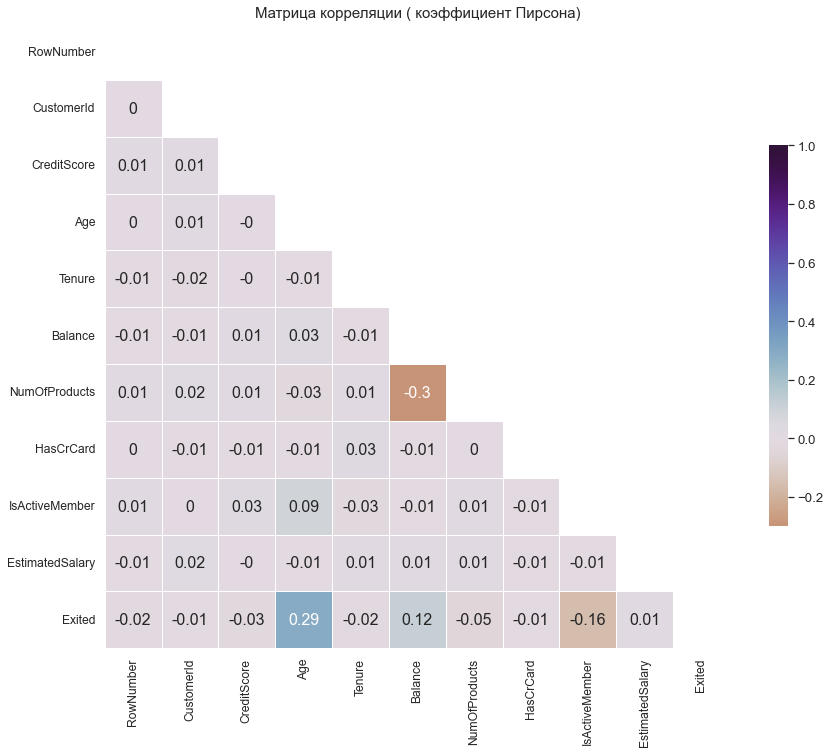

In [54]:
f, ax = plt.subplots(figsize=(14,14))
mat = df.corr('pearson').round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(15, 15, as_cmap=True) 
sns.set(font_scale=1.2) 
sns.heatmap(mat, mask=mask, cmap= "twilight_shifted_r", linecolor = "white", vmax=1, center=0, annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 16}) 
plt.title('Матрица корреляции ( коэффициент Пирсона)', size=15)
plt.show()

Из матрицы корреляции мы можем сделать вывод, что ярко выраженной корреляции для целевого признака мы не наблюдаем. Наибольшая корреляция наблюдается с признаком Age(0.29) и Balance(0.12). В целом это логично, люди более старшего возраста менее склонны к изменениям, наличие значительных средств в банке, может быть индикатором того, что клиент планирует продолжать сотрудничество с банком.

*Вывод:* Прочитан, используемый в проекте датафрейм. Датасет содержит исторические данные о поведении клиентов и расторжении договоров с банком. В датасете представлена информация о 10000 объектах и их основных характеристиках: уникальный идентификатор клиента, фамилия, кредитный рейтинг, страна проживания, пол, возраст, сколько лет человек является клиентом банка, баланс на счёте, количество продуктов банка, используемых клиентом, наличие кредитной карты, активность клиента, предполагаемая зарплата. Основные типы данных в представленном датасете: float64(3), int64(8), object(3). Проведена предварительная обработка данных: заполнены пропущенные значения. Дубликаты явные и неявные не выявлены. Выраженная корреляция между признаками не выявлена.  

## Постановка задачи и построение модели

Мы будем решать задачу классификации, которая спрогнозирует уйдет клиент из банка в ближайшее время или нет. Целевой признак - Exited, данный признак является категориальным и принимает значение 0 или 1 («Ушел» — 1, «Не ушел» — 0). Наша задача построить модель с предельно большим значением F1-меры (не менее 0.59). Дополнительно мы будем измерять AUC-ROC и сравнивать её значение с F1-мерой.

В нашем датасете 10000 объектов, 13 признаков ('CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'), 1 целевой признак ('Exited'). Признаки имеют тип float64(3), int64(7), object(3), целевой признак- int64. Так как предобработка данных уже проведена, пропуски и дубликаты в данных отсутствуют.

 - Произведем подготовку признаков

In [55]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Для начала удалим столбецы RowNumber — индекс строки в данных и Surname — фамилия, которые не имеют никакого прогностического значения и сделаем столбец CustomerId — уникальный идентификатор клиента - индексом. 

In [56]:
df = df.drop(['RowNumber'], axis=1)

In [57]:
df = df.drop (['Surname'], axis=1)

In [58]:
df = df.set_index('CustomerId')

Для преобразования категориальных признаков в численные используем технику прямого кодирования One-Hot-Encoding. Для избежания дамми-ловушки(dummy trap)возпользуемся аргументом drop_first=True.

In [59]:
# one-hot-encoding
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
CustomerId                                                                  
15634602            619   42     2.0       0.00              1          1   
15647311            608   41     1.0   83807.86              1          0   
15619304            502   42     8.0  159660.80              3          1   
15701354            699   39     1.0       0.00              2          0   
15737888            850   43     2.0  125510.82              1          1   

            IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
CustomerId                                                               
15634602                 1        101348.88       1                  0   
15647311                 1        112542.58       0                  0   
15619304                 0        113931.57       1                  0   
15701354                 0         93826.63       0                  0   
15737888                 1         79084.10       0                  0   

            Geography_Spain  Gender_Male  
CustomerId                                
15634602                  0            0  
15647311                  1            0  
15619304                  0            0  
15701354                  0            0  
15737888                  1            0

Так как в дальнейшем мы планируем использовать в работе GridSearchCV, в который включается кросс-валидация разобьем данные на две части: обучающую и тестовую. Примем, что размеры тестового набора - 25%. Следовательно, исходные данные будут разбиты в соотношении 3:1 или 75%, и 25%.

In [60]:
features = df_ohe.drop(['Exited'], axis=1) # пролучим признаки
target = df_ohe['Exited'] # получим целевой признак

Проанализируем как распределены классы в выборке. 

In [61]:
target.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

В датасете наблюдается явный дисбаланс классов. Вначале исследуем модель без учета дисбаланса классов.

In [62]:
print(df.shape)

(10000, 11)


In [63]:
# разделим данные на обучающую и тестовую выборку

def split_data(features, target, test_size=0.25, random_state=12345):
    # получим тестовую выборку
    features_train, features_test, target_train, target_test = train_test_split(
        features,
        target,
        test_size=test_size,
        random_state=12345
    )
    return features_train, features_test, target_train, target_test

features_train, features_test, target_train, target_test = split_data(features, target)

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(7500, 11)
(7500,)
(2500, 11)
(2500,)


В связи с тем, что в данных присутствуют количественные признаки с разными разбросами значений, проведем масштабирование признаков с использованием стандартизации данных для приведения их к одному масштабу.

In [64]:
# масштабирование признаков
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CustomerId                                                             
15774393       0.442805 -0.841274  1.446098 -1.224577       0.817772   
15606232      -0.310897 -0.270730  0.719099  0.641783      -0.896874   
15581840      -0.259274 -0.556002  1.082599 -1.224577       0.817772   
15646817       1.217157  1.155631  1.446098  1.290462       0.817772   
15618410       0.690598 -1.221637 -0.007900  1.142121      -0.896874   

            HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
CustomerId                                                                  
15774393            1               1        -1.269750                  0   
15606232            1               1         0.960396                  0   
15581840            1               0         0.661864                  0   
15646817            1               0        -1.039476                  0   
15618410            0               0        -0.851729                  1   

            Geography_Spain  Gender_Male  
CustomerId                                
15774393                  0            0  
15606232                  1            0  
15581840                  0            1  
15646817                  0            1  
15618410                  0            1

Исследуем три модели: решающее дерево, случайный лес и логистическую регрессию. Для оценки качества модели используем агрегирующую метрику качества F1-мера (среднее гармоническое полноты (Recall) и точности (Precision). Пороговое значение F1-score - 0.59.

Инициализируем модель решающее дерево. Подберем наилучшие значения гиперпараметров для алгоритма DecisionTreeClassifier("классификатор дерева решений"). Используем в подборе следующие гиперпараметры:
- max_depth – глубина дерева 
- criterions - выбор критерия : Джини либо энтропийного, или log_loss.

Для выбора наилучшего значения критериев переберем  различные значения гиперпараметров и сравним качество моделей в разных вариантах. Выбор наилучших гиперпараметров важен так как они меняют качество модели. Один из способов точной настройки - вручную моделировать гиперпараметры до тех пор, пока мы не найдем подходящую комбинацию гиперпараметров. Это может занимать очень много времени, и у нас может не быть времени на изучение нескольких комбинаций, поэтому мы используем  Scikit-Learn GridSearchCV для выполнения поиска оптимальных гиперпараметров, это значительно сократит наше время на подбор. 

In [65]:
%%time
model_dt = DecisionTreeClassifier(random_state=12345)
parameters = { 
    'max_depth': range (1, 11),
    'criterion':['gini', 'entropy', 'log_loss']
}
grid_search_dt = GridSearchCV(
    model_dt,
    parameters,
    cv = 3, 
    scoring = SCORING,
    refit='f1',
    verbose=100,
    return_train_score=True
    )

grid_search_dt.fit(features_train, target_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START criterion=gini, max_depth=1................................
[CV 1/3; 1/30] END criterion=gini, max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.686, test=0.689) total time=   0.0s
[CV 2/3; 1/30] START criterion=gini, max_depth=1................................
[CV 2/3; 1/30] END criterion=gini, max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.689, test=0.685) total time=   0.0s
[CV 3/3; 1/30] START criterion=gini, max_depth=1................................
[CV 3/3; 1/30] END criterion=gini, max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.687, test=0.688) total time=   0.0s
[CV 1/3; 2/30] START criterion=gini, max_depth=2................................
[CV 1/3; 2/30] END criterion=gini, max_depth=2; f1: (train=0.516, test=0.488) roc_auc: (train=0.741, test=0.736) total time=   0.0s
[CV 2/3; 2/30] START criterion=gini, max_depth=2................................
[CV 2/

[CV 2/3; 14/30] END criterion=entropy, max_depth=4; f1: (train=0.534, test=0.503) roc_auc: (train=0.825, test=0.812) total time=   0.0s
[CV 3/3; 14/30] START criterion=entropy, max_depth=4............................
[CV 3/3; 14/30] END criterion=entropy, max_depth=4; f1: (train=0.448, test=0.425) roc_auc: (train=0.819, test=0.813) total time=   0.0s
[CV 1/3; 15/30] START criterion=entropy, max_depth=5............................
[CV 1/3; 15/30] END criterion=entropy, max_depth=5; f1: (train=0.558, test=0.538) roc_auc: (train=0.848, test=0.829) total time=   0.0s
[CV 2/3; 15/30] START criterion=entropy, max_depth=5............................
[CV 2/3; 15/30] END criterion=entropy, max_depth=5; f1: (train=0.535, test=0.484) roc_auc: (train=0.849, test=0.828) total time=   0.0s
[CV 3/3; 15/30] START criterion=entropy, max_depth=5............................
[CV 3/3; 15/30] END criterion=entropy, max_depth=5; f1: (train=0.544, test=0.570) roc_auc: (train=0.840, test=0.829) total time=   0

[CV 3/3; 27/30] END criterion=log_loss, max_depth=7; f1: (train=0.572, test=0.541) roc_auc: (train=0.881, test=0.834) total time=   0.0s
[CV 1/3; 28/30] START criterion=log_loss, max_depth=8...........................
[CV 1/3; 28/30] END criterion=log_loss, max_depth=8; f1: (train=0.639, test=0.544) roc_auc: (train=0.908, test=0.814) total time=   0.0s
[CV 2/3; 28/30] START criterion=log_loss, max_depth=8...........................
[CV 2/3; 28/30] END criterion=log_loss, max_depth=8; f1: (train=0.670, test=0.522) roc_auc: (train=0.907, test=0.791) total time=   0.0s
[CV 3/3; 28/30] START criterion=log_loss, max_depth=8...........................
[CV 3/3; 28/30] END criterion=log_loss, max_depth=8; f1: (train=0.635, test=0.562) roc_auc: (train=0.904, test=0.823) total time=   0.0s
[CV 1/3; 29/30] START criterion=log_loss, max_depth=9...........................
[CV 1/3; 29/30] END criterion=log_loss, max_depth=9; f1: (train=0.696, test=0.543) roc_auc: (train=0.927, test=0.784) total time

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 11)},
             refit='f1', return_train_score=True, scoring=['f1', 'roc_auc'],
             verbose=100)

In [66]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_dt.best_score_}')
#print(f'Значение f1:', grid_search_dt.cv_results_['mean_test_f1'][grid_search_dt.best_index_]) еще один способ вывести лучший параметр f1
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_dt.cv_results_['mean_test_roc_auc'][grid_search_dt.best_index_])
# print(f'Лучшие параметры: {grid_search_dt.best_index_}') индекс лучшей модели
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_dt.best_params_}')

Значение f1: 0.5565456474216623
Значение auc-roc: 0.8010115460607882
Лучшие параметры: {'criterion': 'gini', 'max_depth': 8}


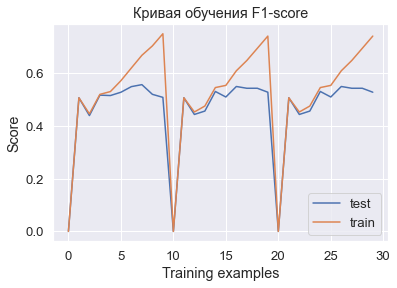

In [67]:
test_scores = grid_search_dt.cv_results_['mean_test_f1']
train_scores = grid_search_dt.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

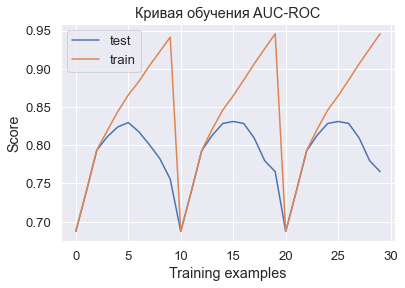

In [68]:
test_scores = grid_search_dt.cv_results_['mean_test_roc_auc']
train_scores = grid_search_dt.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

F1- score (F1-мера) - агрегируюшая метрика, позволяющая параллельно контролировать полноту и точность и являющаяся средним гармоническим полноты и точности. Полнота и точность оченивают качество прогноза положительного класса с разных позиций. Recall описывает, насколько хорошо модель распознает классы, при этом Precision выявляет ситуацию, когда положительные метрики присваиваются излишне часто. Когда полнота или точность близки к нулю, то к 0 приближается и само среднее гармоническое.

Модель показала результат на валидационной выборке, не превышающий установленный порог точности для проекта. Значение f1-score - 0.557 при целевом - 0.59.

ROC-кривая (или кривая ошибок) - это график зависимости доли истинно положительных ответов(TPR) от доли ложноположительных ответов (FPR). Чтобы выявить насколько значительно наша модель отличается от случайной вычислим площадь под ROC-кривой. AUC-ROC (англ. Area Under Curve ROC) - это метрика качества классификации, равная площади под ROC-кривой.Значения метрики изменяются от 0 до 1. При этом для случайной модели AUC-ROC равна 0.5.

AUC-ROC также не очень высокое - 0.801, хотя, конечно, выше чем для случайной модели -0.5.

Инициализируем модель случайного леса. Подберем наилучшие значения гиперпараметров для алгоритма RandomForestClassifier("классификатор случайного леса"). 
Используем в подборе следующие гиперпараметры:
 - n_estimators – количество деревьев в случайном лесу (будет изменяться от 1 до 50 с шагом 10)
 - max_depth – глубина дерева (будет изменяться от 1 до 9)
   /этот гиперпараметр определяет максимальное количество условий от вершины до финального ответа,     считается по количеству переходов между узлами/.
 - min_samples_leaf -  минимальное количество объектов в листе (будет изменяться от 1 до 3)
   /этот гиперпараметр не разрешает создавать лист, в котором слишком мало объектов обучающей выборки/.
 - min_samples_split – минимальное количество примеров для разделения (будет изменяться от 2 до 9 с шагом 2)
/этот гиперпараметр запрещает создавать узлы, в которые попадает слишком мало объектов обучающей выборки/.

In [69]:
%%time
model_rf = RandomForestClassifier(random_state=12345)
parameters = { 
    'n_estimators': range (1, 51, 10),
    'max_depth': range (1, 10),
    'min_samples_leaf': range (1, 4),
    'min_samples_split': range (2, 10, 2)
}
grid_search_rf = GridSearchCV(
    model_rf,
    parameters,
    cv = 3, 
    scoring = ['f1','roc_auc'],
    refit='f1',
    verbose=100,
    return_train_score=True
)

grid_search_rf.fit(features_train, target_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV 1/3; 1/540] START max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 1/3; 1/540] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.234, test=0.248) roc_auc: (train=0.565, test=0.569) total time=   0.0s
[CV 2/3; 1/540] START max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 2/3; 1/540] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.259, test=0.196) roc_auc: (train=0.573, test=0.553) total time=   0.0s
[CV 3/3; 1/540] START max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 3/3; 1/540] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.222, test=0.271) roc_auc: (train=0.561, test=0.577) total time=   0.0s
[CV 1/3; 2/540] START max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=11
[CV 1/3; 2/540] END max_depth=1, min_samples_leaf

[CV 1/3; 13/540] END max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.798, test=0.784) total time=   0.0s
[CV 2/3; 13/540] START max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=21
[CV 2/3; 13/540] END max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.798, test=0.799) total time=   0.0s
[CV 3/3; 13/540] START max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=21
[CV 3/3; 13/540] END max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.788, test=0.798) total time=   0.0s
[CV 1/3; 14/540] START max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=31
[CV 1/3; 14/540] END max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=31; f1: (train=0.000, test=0.000) roc_auc: (train=0.807, test=0.795) total time=   0.0s
[CV 2/3; 14/540] 

[CV 1/3; 24/540] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.000, test=0.000) roc_auc: (train=0.807, test=0.795) total time=   0.0s
[CV 2/3; 24/540] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 2/3; 24/540] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.000, test=0.000) roc_auc: (train=0.803, test=0.802) total time=   0.0s
[CV 3/3; 24/540] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 3/3; 24/540] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.000, test=0.000) roc_auc: (train=0.794, test=0.806) total time=   0.0s
[CV 1/3; 25/540] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=41
[CV 1/3; 25/540] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=41; f1: (train=0.000, test=0.000) roc_auc: (train=0.809, test=0.793) total time=   0.0s
[CV 2/3; 25/540] 

[CV 1/3; 35/540] END max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.000, test=0.000) roc_auc: (train=0.809, test=0.793) total time=   0.0s
[CV 2/3; 35/540] START max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=41
[CV 2/3; 35/540] END max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.000, test=0.000) roc_auc: (train=0.804, test=0.804) total time=   0.0s
[CV 3/3; 35/540] START max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=41
[CV 3/3; 35/540] END max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.000, test=0.000) roc_auc: (train=0.798, test=0.808) total time=   0.0s
[CV 1/3; 36/540] START max_depth=1, min_samples_leaf=2, min_samples_split=8, n_estimators=1
[CV 1/3; 36/540] END max_depth=1, min_samples_leaf=2, min_samples_split=8, n_estimators=1; f1: (train=0.234, test=0.248) roc_auc: (train=0.565, test=0.569) total time=   0.0s
[CV 2/3; 36/540] ST

[CV 3/3; 45/540] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.000, test=0.000) roc_auc: (train=0.798, test=0.808) total time=   0.0s
[CV 1/3; 46/540] START max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 1/3; 46/540] END max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.234, test=0.248) roc_auc: (train=0.565, test=0.569) total time=   0.0s
[CV 2/3; 46/540] START max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 2/3; 46/540] END max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.259, test=0.196) roc_auc: (train=0.573, test=0.553) total time=   0.0s
[CV 3/3; 46/540] START max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 3/3; 46/540] END max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.222, test=0.271) roc_auc: (train=0.561, test=0.577) total time=   0.0s
[CV 1/3; 47/540] START 

[CV 1/3; 58/540] END max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.798, test=0.784) total time=   0.0s
[CV 2/3; 58/540] START max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=21
[CV 2/3; 58/540] END max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.798, test=0.799) total time=   0.0s
[CV 3/3; 58/540] START max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=21
[CV 3/3; 58/540] END max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.788, test=0.798) total time=   0.0s
[CV 1/3; 59/540] START max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=31
[CV 1/3; 59/540] END max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=31; f1: (train=0.000, test=0.000) roc_auc: (train=0.807, test=0.795) total time=   0.0s
[CV 2/3; 59/540] 

[CV 2/3; 68/540] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.164, test=0.127) roc_auc: (train=0.810, test=0.804) total time=   0.0s
[CV 3/3; 68/540] START max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=21
[CV 3/3; 68/540] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.132, test=0.161) roc_auc: (train=0.800, test=0.810) total time=   0.0s
[CV 1/3; 69/540] START max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=31
[CV 1/3; 69/540] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=31; f1: (train=0.122, test=0.117) roc_auc: (train=0.819, test=0.805) total time=   0.0s
[CV 2/3; 69/540] START max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=31
[CV 2/3; 69/540] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=31; f1: (train=0.132, test=0.109) roc_auc: (train=0.813, test=0.810) total time=   0.0s
[CV 3/3; 69/540] 

[CV 2/3; 79/540] END max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.132, test=0.109) roc_auc: (train=0.813, test=0.810) total time=   0.0s
[CV 3/3; 79/540] START max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 3/3; 79/540] END max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.084, test=0.113) roc_auc: (train=0.805, test=0.816) total time=   0.0s
[CV 1/3; 80/540] START max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=41
[CV 1/3; 80/540] END max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=41; f1: (train=0.150, test=0.144) roc_auc: (train=0.826, test=0.813) total time=   0.0s
[CV 2/3; 80/540] START max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=41
[CV 2/3; 80/540] END max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=41; f1: (train=0.173, test=0.144) roc_auc: (train=0.826, test=0.823) total time=   0.0s
[CV 3/3; 80/540] 

[CV 1/3; 90/540] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.150, test=0.144) roc_auc: (train=0.826, test=0.813) total time=   0.0s
[CV 2/3; 90/540] START max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=41
[CV 2/3; 90/540] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.171, test=0.144) roc_auc: (train=0.826, test=0.823) total time=   0.0s
[CV 3/3; 90/540] START max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=41
[CV 3/3; 90/540] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.165, test=0.178) roc_auc: (train=0.817, test=0.825) total time=   0.0s
[CV 1/3; 91/540] START max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=1
[CV 1/3; 91/540] END max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=1; f1: (train=0.234, test=0.248) roc_auc: (train=0.659, test=0.639) total time=   0.0s
[CV 2/3; 91/540] ST

[CV 3/3; 100/540] END max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.165, test=0.178) roc_auc: (train=0.817, test=0.825) total time=   0.0s
[CV 1/3; 101/540] START max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1
[CV 1/3; 101/540] END max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1; f1: (train=0.234, test=0.248) roc_auc: (train=0.659, test=0.639) total time=   0.0s
[CV 2/3; 101/540] START max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1
[CV 2/3; 101/540] END max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1; f1: (train=0.259, test=0.196) roc_auc: (train=0.646, test=0.665) total time=   0.0s
[CV 3/3; 101/540] START max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1
[CV 3/3; 101/540] END max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=1; f1: (train=0.222, test=0.271) roc_auc: (train=0.652, test=0.653) total time=   0.0s
[CV 1/3; 102/540

[CV 1/3; 113/540] END max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=21; f1: (train=0.146, test=0.151) roc_auc: (train=0.812, test=0.800) total time=   0.0s
[CV 2/3; 113/540] START max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=21
[CV 2/3; 113/540] END max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=21; f1: (train=0.164, test=0.127) roc_auc: (train=0.810, test=0.804) total time=   0.0s
[CV 3/3; 113/540] START max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=21
[CV 3/3; 113/540] END max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=21; f1: (train=0.132, test=0.161) roc_auc: (train=0.800, test=0.810) total time=   0.0s
[CV 1/3; 114/540] START max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=31
[CV 1/3; 114/540] END max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=31; f1: (train=0.122, test=0.117) roc_auc: (train=0.819, test=0.805) total time=   0.0s
[CV 2/3; 1

[CV 2/3; 123/540] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=21; f1: (train=0.263, test=0.200) roc_auc: (train=0.825, test=0.815) total time=   0.0s
[CV 3/3; 123/540] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=21
[CV 3/3; 123/540] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=21; f1: (train=0.213, test=0.250) roc_auc: (train=0.822, test=0.828) total time=   0.0s
[CV 1/3; 124/540] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=31
[CV 1/3; 124/540] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=31; f1: (train=0.291, test=0.289) roc_auc: (train=0.835, test=0.812) total time=   0.0s
[CV 2/3; 124/540] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=31
[CV 2/3; 124/540] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=31; f1: (train=0.264, test=0.197) roc_auc: (train=0.829, test=0.823) total time=   0.0s
[CV 3/3; 1

[CV 3/3; 133/540] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.213, test=0.250) roc_auc: (train=0.822, test=0.828) total time=   0.0s
[CV 1/3; 134/540] START max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=31
[CV 1/3; 134/540] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=31; f1: (train=0.291, test=0.286) roc_auc: (train=0.835, test=0.812) total time=   0.0s
[CV 2/3; 134/540] START max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=31
[CV 2/3; 134/540] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=31; f1: (train=0.264, test=0.197) roc_auc: (train=0.829, test=0.823) total time=   0.0s
[CV 3/3; 134/540] START max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=31
[CV 3/3; 134/540] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=31; f1: (train=0.244, test=0.260) roc_auc: (train=0.828, test=0.834) total time=   0.0s
[CV 1/3; 1

[CV 1/3; 144/540] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.291, test=0.289) roc_auc: (train=0.835, test=0.812) total time=   0.0s
[CV 2/3; 144/540] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 2/3; 144/540] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.264, test=0.200) roc_auc: (train=0.829, test=0.823) total time=   0.0s
[CV 3/3; 144/540] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 3/3; 144/540] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.244, test=0.263) roc_auc: (train=0.828, test=0.834) total time=   0.0s
[CV 1/3; 145/540] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=41
[CV 1/3; 145/540] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=41; f1: (train=0.309, test=0.306) roc_auc: (train=0.839, test=0.817) total time=   0.0s
[CV 2/3; 1

[CV 2/3; 154/540] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.264, test=0.200) roc_auc: (train=0.829, test=0.823) total time=   0.0s
[CV 3/3; 154/540] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 3/3; 154/540] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.244, test=0.263) roc_auc: (train=0.828, test=0.834) total time=   0.0s
[CV 1/3; 155/540] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=41
[CV 1/3; 155/540] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.309, test=0.306) roc_auc: (train=0.839, test=0.817) total time=   0.0s
[CV 2/3; 155/540] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=41
[CV 2/3; 155/540] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.263, test=0.193) roc_auc: (train=0.837, test=0.830) total time=   0.0s
[CV 3/3; 1

[CV 1/3; 165/540] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.309, test=0.307) roc_auc: (train=0.839, test=0.817) total time=   0.0s
[CV 2/3; 165/540] START max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 2/3; 165/540] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.263, test=0.193) roc_auc: (train=0.837, test=0.830) total time=   0.0s
[CV 3/3; 165/540] START max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 3/3; 165/540] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.253, test=0.276) roc_auc: (train=0.834, test=0.837) total time=   0.0s
[CV 1/3; 166/540] START max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 1/3; 166/540] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.227, test=0.210) roc_auc: (train=0.718, test=0.685) total time=   0.0s
[CV 2/3; 166

[CV 3/3; 175/540] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.253, test=0.276) roc_auc: (train=0.834, test=0.837) total time=   0.0s
[CV 1/3; 176/540] START max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1
[CV 1/3; 176/540] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1; f1: (train=0.227, test=0.210) roc_auc: (train=0.718, test=0.685) total time=   0.0s
[CV 2/3; 176/540] START max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1
[CV 2/3; 176/540] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1; f1: (train=0.253, test=0.196) roc_auc: (train=0.729, test=0.709) total time=   0.0s
[CV 3/3; 176/540] START max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1
[CV 3/3; 176/540] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1; f1: (train=0.234, test=0.270) roc_auc: (train=0.719, test=0.734) total time=   0.0s
[CV 1/3; 177/540

[CV 3/3; 187/540] END max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=11; f1: (train=0.417, test=0.423) roc_auc: (train=0.839, test=0.841) total time=   0.0s
[CV 1/3; 188/540] START max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=21
[CV 1/3; 188/540] END max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.426, test=0.413) roc_auc: (train=0.850, test=0.825) total time=   0.0s
[CV 2/3; 188/540] START max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=21
[CV 2/3; 188/540] END max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.476, test=0.440) roc_auc: (train=0.846, test=0.835) total time=   0.0s
[CV 3/3; 188/540] START max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=21
[CV 3/3; 188/540] END max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.422, test=0.419) roc_auc: (train=0.846, test=0.843) total time=   0.0s
[CV 1/3; 1

[CV 3/3; 198/540] END max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=21; f1: (train=0.425, test=0.437) roc_auc: (train=0.847, test=0.845) total time=   0.0s
[CV 1/3; 199/540] START max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 1/3; 199/540] END max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.401, test=0.380) roc_auc: (train=0.852, test=0.823) total time=   0.0s
[CV 2/3; 199/540] START max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 2/3; 199/540] END max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.409, test=0.367) roc_auc: (train=0.848, test=0.840) total time=   0.0s
[CV 3/3; 199/540] START max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 3/3; 199/540] END max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.389, test=0.388) roc_auc: (train=0.849, test=0.847) total time=   0.0s
[CV 1/3; 2

[CV 2/3; 209/540] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.423, test=0.391) roc_auc: (train=0.847, test=0.839) total time=   0.0s
[CV 3/3; 209/540] START max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=31
[CV 3/3; 209/540] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.384, test=0.382) roc_auc: (train=0.849, test=0.846) total time=   0.0s
[CV 1/3; 210/540] START max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=41
[CV 1/3; 210/540] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.401, test=0.385) roc_auc: (train=0.852, test=0.827) total time=   0.0s
[CV 2/3; 210/540] START max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=41
[CV 2/3; 210/540] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.434, test=0.394) roc_auc: (train=0.851, test=0.841) total time=   0.0s
[CV 3/3; 2

[CV 1/3; 220/540] END max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.402, test=0.387) roc_auc: (train=0.853, test=0.827) total time=   0.0s
[CV 2/3; 220/540] START max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=41
[CV 2/3; 220/540] END max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.411, test=0.369) roc_auc: (train=0.851, test=0.841) total time=   0.0s
[CV 3/3; 220/540] START max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=41
[CV 3/3; 220/540] END max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.392, test=0.388) roc_auc: (train=0.848, test=0.846) total time=   0.0s
[CV 1/3; 221/540] START max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=1
[CV 1/3; 221/540] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=1; f1: (train=0.550, test=0.530) roc_auc: (train=0.775, test=0.767) total time=   0.0s
[CV 2/3; 221

[CV 3/3; 230/540] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.386, test=0.391) roc_auc: (train=0.848, test=0.846) total time=   0.0s
[CV 1/3; 231/540] START max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=1
[CV 1/3; 231/540] END max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=1; f1: (train=0.550, test=0.530) roc_auc: (train=0.775, test=0.767) total time=   0.0s
[CV 2/3; 231/540] START max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=1
[CV 2/3; 231/540] END max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=1; f1: (train=0.453, test=0.449) roc_auc: (train=0.788, test=0.782) total time=   0.0s
[CV 3/3; 231/540] START max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=1
[CV 3/3; 231/540] END max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=1; f1: (train=0.452, test=0.464) roc_auc: (train=0.788, test=0.787) total time=   0.0s
[CV 1/3; 232/540

[CV 3/3; 242/540] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=11; f1: (train=0.457, test=0.453) roc_auc: (train=0.852, test=0.845) total time=   0.0s
[CV 1/3; 243/540] START max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=21
[CV 1/3; 243/540] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=21; f1: (train=0.538, test=0.505) roc_auc: (train=0.868, test=0.835) total time=   0.0s
[CV 2/3; 243/540] START max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=21
[CV 2/3; 243/540] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=21; f1: (train=0.528, test=0.481) roc_auc: (train=0.863, test=0.846) total time=   0.0s
[CV 3/3; 243/540] START max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=21
[CV 3/3; 243/540] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=21; f1: (train=0.493, test=0.479) roc_auc: (train=0.862, test=0.853) total time=   0.0s
[CV 1/3; 2

[CV 2/3; 253/540] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.521, test=0.473) roc_auc: (train=0.862, test=0.843) total time=   0.0s
[CV 3/3; 253/540] START max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=21
[CV 3/3; 253/540] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.502, test=0.481) roc_auc: (train=0.863, test=0.852) total time=   0.0s
[CV 1/3; 254/540] START max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=31
[CV 1/3; 254/540] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=31; f1: (train=0.522, test=0.503) roc_auc: (train=0.869, test=0.835) total time=   0.0s
[CV 2/3; 254/540] START max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=31
[CV 2/3; 254/540] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=31; f1: (train=0.511, test=0.444) roc_auc: (train=0.864, test=0.846) total time=   0.0s
[CV 3/3; 2

[CV 3/3; 263/540] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=21
[CV 3/3; 263/540] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=21; f1: (train=0.493, test=0.486) roc_auc: (train=0.861, test=0.852) total time=   0.0s
[CV 1/3; 264/540] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 1/3; 264/540] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.507, test=0.490) roc_auc: (train=0.867, test=0.834) total time=   0.0s
[CV 2/3; 264/540] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 2/3; 264/540] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.523, test=0.457) roc_auc: (train=0.865, test=0.848) total time=   0.0s
[CV 3/3; 264/540] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 3/3; 264/540] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=31; 

[CV 1/3; 274/540] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.518, test=0.489) roc_auc: (train=0.868, test=0.833) total time=   0.0s
[CV 2/3; 274/540] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 2/3; 274/540] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.510, test=0.443) roc_auc: (train=0.864, test=0.846) total time=   0.0s
[CV 3/3; 274/540] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 3/3; 274/540] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.487, test=0.465) roc_auc: (train=0.864, test=0.855) total time=   0.0s
[CV 1/3; 275/540] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=41
[CV 1/3; 275/540] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.490, test=0.474) roc_auc: (train=0.869, test=0.837) total time=   0.0s
[CV 2/3; 2

[CV 3/3; 284/540] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=31; f1: (train=0.482, test=0.459) roc_auc: (train=0.864, test=0.855) total time=   0.0s
[CV 1/3; 285/540] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 1/3; 285/540] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.485, test=0.474) roc_auc: (train=0.869, test=0.837) total time=   0.0s
[CV 2/3; 285/540] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 2/3; 285/540] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.503, test=0.432) roc_auc: (train=0.864, test=0.848) total time=   0.0s
[CV 3/3; 285/540] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 3/3; 285/540] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.444, test=0.439) roc_auc: (train=0.864, test=0.855) total time=   0.0s
[CV 1/3; 2

[CV 2/3; 295/540] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.503, test=0.432) roc_auc: (train=0.864, test=0.848) total time=   0.0s
[CV 3/3; 295/540] START max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=41
[CV 3/3; 295/540] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.444, test=0.439) roc_auc: (train=0.864, test=0.855) total time=   0.0s
[CV 1/3; 296/540] START max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=1
[CV 1/3; 296/540] END max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=1; f1: (train=0.551, test=0.532) roc_auc: (train=0.816, test=0.795) total time=   0.0s
[CV 2/3; 296/540] START max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=1
[CV 2/3; 296/540] END max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=1; f1: (train=0.253, test=0.192) roc_auc: (train=0.785, test=0.758) total time=   0.0s
[CV 3/3; 296/5

[CV 1/3; 306/540] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=1; f1: (train=0.457, test=0.425) roc_auc: (train=0.806, test=0.757) total time=   0.0s
[CV 2/3; 306/540] START max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=1
[CV 2/3; 306/540] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=1; f1: (train=0.578, test=0.532) roc_auc: (train=0.812, test=0.779) total time=   0.0s
[CV 3/3; 306/540] START max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=1
[CV 3/3; 306/540] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=1; f1: (train=0.515, test=0.540) roc_auc: (train=0.819, test=0.802) total time=   0.0s
[CV 1/3; 307/540] START max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=11
[CV 1/3; 307/540] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=11; f1: (train=0.547, test=0.497) roc_auc: (train=0.879, test=0.834) total time=   0.0s
[CV 2/3; 307/54

[CV 3/3; 317/540] END max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=11; f1: (train=0.500, test=0.488) roc_auc: (train=0.865, test=0.845) total time=   0.0s
[CV 1/3; 318/540] START max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=21
[CV 1/3; 318/540] END max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=21; f1: (train=0.545, test=0.514) roc_auc: (train=0.881, test=0.837) total time=   0.0s
[CV 2/3; 318/540] START max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=21
[CV 2/3; 318/540] END max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=21; f1: (train=0.571, test=0.521) roc_auc: (train=0.873, test=0.845) total time=   0.0s
[CV 3/3; 318/540] START max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=21
[CV 3/3; 318/540] END max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=21; f1: (train=0.546, test=0.529) roc_auc: (train=0.872, test=0.855) total time=   0.0s
[CV 1/3; 3

[CV 2/3; 328/540] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=21; f1: (train=0.563, test=0.506) roc_auc: (train=0.877, test=0.848) total time=   0.0s
[CV 3/3; 328/540] START max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=21
[CV 3/3; 328/540] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=21; f1: (train=0.538, test=0.501) roc_auc: (train=0.874, test=0.853) total time=   0.0s
[CV 1/3; 329/540] START max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=31
[CV 1/3; 329/540] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.537, test=0.498) roc_auc: (train=0.886, test=0.842) total time=   0.0s
[CV 2/3; 329/540] START max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=31
[CV 2/3; 329/540] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.544, test=0.496) roc_auc: (train=0.878, test=0.851) total time=   0.0s
[CV 3/3; 3

[CV 1/3; 339/540] END max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=31; f1: (train=0.539, test=0.503) roc_auc: (train=0.884, test=0.839) total time=   0.0s
[CV 2/3; 339/540] START max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=31
[CV 2/3; 339/540] END max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=31; f1: (train=0.567, test=0.507) roc_auc: (train=0.875, test=0.849) total time=   0.0s
[CV 3/3; 339/540] START max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=31
[CV 3/3; 339/540] END max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=31; f1: (train=0.538, test=0.523) roc_auc: (train=0.877, test=0.859) total time=   0.0s
[CV 1/3; 340/540] START max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=41
[CV 1/3; 340/540] END max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.548, test=0.501) roc_auc: (train=0.886, test=0.843) total time=   0.0s
[CV 2/3; 3

[CV 2/3; 349/540] END max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=31; f1: (train=0.558, test=0.503) roc_auc: (train=0.878, test=0.849) total time=   0.0s
[CV 3/3; 349/540] START max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=31
[CV 3/3; 349/540] END max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=31; f1: (train=0.523, test=0.498) roc_auc: (train=0.877, test=0.857) total time=   0.0s
[CV 1/3; 350/540] START max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=41
[CV 1/3; 350/540] END max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.546, test=0.492) roc_auc: (train=0.888, test=0.842) total time=   0.1s
[CV 2/3; 350/540] START max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=41
[CV 2/3; 350/540] END max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.559, test=0.511) roc_auc: (train=0.879, test=0.850) total time=   0.0s
[CV 3/3; 3

[CV 3/3; 359/540] END max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=31; f1: (train=0.532, test=0.514) roc_auc: (train=0.876, test=0.858) total time=   0.0s
[CV 1/3; 360/540] START max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=41
[CV 1/3; 360/540] END max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=41; f1: (train=0.545, test=0.504) roc_auc: (train=0.886, test=0.843) total time=   0.1s
[CV 2/3; 360/540] START max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=41
[CV 2/3; 360/540] END max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=41; f1: (train=0.564, test=0.508) roc_auc: (train=0.878, test=0.850) total time=   0.1s
[CV 3/3; 360/540] START max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=41
[CV 3/3; 360/540] END max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=41; f1: (train=0.529, test=0.517) roc_auc: (train=0.877, test=0.858) total time=   0.1s
[CV 1/3; 3

[CV 1/3; 370/540] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=41; f1: (train=0.612, test=0.529) roc_auc: (train=0.902, test=0.847) total time=   0.1s
[CV 2/3; 370/540] START max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=41
[CV 2/3; 370/540] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=41; f1: (train=0.588, test=0.513) roc_auc: (train=0.897, test=0.851) total time=   0.1s
[CV 3/3; 370/540] START max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=41
[CV 3/3; 370/540] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=41; f1: (train=0.581, test=0.534) roc_auc: (train=0.899, test=0.860) total time=   0.1s
[CV 1/3; 371/540] START max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=1
[CV 1/3; 371/540] END max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=1; f1: (train=0.503, test=0.477) roc_auc: (train=0.828, test=0.763) total time=   0.0s
[CV 2/3; 371

[CV 2/3; 380/540] END max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=41; f1: (train=0.582, test=0.512) roc_auc: (train=0.894, test=0.855) total time=   0.1s
[CV 3/3; 380/540] START max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=41
[CV 3/3; 380/540] END max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=41; f1: (train=0.582, test=0.549) roc_auc: (train=0.896, test=0.859) total time=   0.1s
[CV 1/3; 381/540] START max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1
[CV 1/3; 381/540] END max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1; f1: (train=0.499, test=0.471) roc_auc: (train=0.828, test=0.768) total time=   0.0s
[CV 2/3; 381/540] START max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1
[CV 2/3; 381/540] END max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1; f1: (train=0.558, test=0.487) roc_auc: (train=0.830, test=0.773) total time=   0.0s
[CV 3/3; 381/5

[CV 3/3; 390/540] END max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.583, test=0.537) roc_auc: (train=0.897, test=0.859) total time=   0.1s
[CV 1/3; 391/540] START max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=1
[CV 1/3; 391/540] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=1; f1: (train=0.498, test=0.470) roc_auc: (train=0.828, test=0.767) total time=   0.0s
[CV 2/3; 391/540] START max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=1
[CV 2/3; 391/540] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=1; f1: (train=0.538, test=0.490) roc_auc: (train=0.834, test=0.768) total time=   0.0s
[CV 3/3; 391/540] START max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=1
[CV 3/3; 391/540] END max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=1; f1: (train=0.547, test=0.523) roc_auc: (train=0.828, test=0.810) total time=   0.0s
[CV 1/3; 392/540

[CV 3/3; 402/540] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=11; f1: (train=0.570, test=0.544) roc_auc: (train=0.887, test=0.850) total time=   0.0s
[CV 1/3; 403/540] START max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=21
[CV 1/3; 403/540] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=21; f1: (train=0.578, test=0.511) roc_auc: (train=0.899, test=0.837) total time=   0.0s
[CV 2/3; 403/540] START max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=21
[CV 2/3; 403/540] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=21; f1: (train=0.593, test=0.518) roc_auc: (train=0.893, test=0.851) total time=   0.0s
[CV 3/3; 403/540] START max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=21
[CV 3/3; 403/540] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=21; f1: (train=0.594, test=0.555) roc_auc: (train=0.894, test=0.858) total time=   0.0s
[CV 1/3; 4

[CV 2/3; 413/540] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=21; f1: (train=0.593, test=0.518) roc_auc: (train=0.893, test=0.851) total time=   0.0s
[CV 3/3; 413/540] START max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=21
[CV 3/3; 413/540] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=21; f1: (train=0.594, test=0.555) roc_auc: (train=0.894, test=0.858) total time=   0.0s
[CV 1/3; 414/540] START max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=31
[CV 1/3; 414/540] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=31; f1: (train=0.586, test=0.512) roc_auc: (train=0.900, test=0.837) total time=   0.0s
[CV 2/3; 414/540] START max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=31
[CV 2/3; 414/540] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=31; f1: (train=0.592, test=0.516) roc_auc: (train=0.896, test=0.851) total time=   0.0s
[CV 3/3; 4

[CV 1/3; 424/540] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=31; f1: (train=0.624, test=0.539) roc_auc: (train=0.924, test=0.844) total time=   0.0s
[CV 2/3; 424/540] START max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=31
[CV 2/3; 424/540] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=31; f1: (train=0.639, test=0.524) roc_auc: (train=0.919, test=0.854) total time=   0.0s
[CV 3/3; 424/540] START max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=31
[CV 3/3; 424/540] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=31; f1: (train=0.619, test=0.536) roc_auc: (train=0.921, test=0.861) total time=   0.0s
[CV 1/3; 425/540] START max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=41
[CV 1/3; 425/540] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=41; f1: (train=0.628, test=0.536) roc_auc: (train=0.925, test=0.847) total time=   0.1s
[CV 2/3; 4

[CV 3/3; 434/540] END max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=31; f1: (train=0.617, test=0.559) roc_auc: (train=0.916, test=0.862) total time=   0.0s
[CV 1/3; 435/540] START max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=41
[CV 1/3; 435/540] END max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=41; f1: (train=0.634, test=0.540) roc_auc: (train=0.921, test=0.841) total time=   0.1s
[CV 2/3; 435/540] START max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=41
[CV 2/3; 435/540] END max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=41; f1: (train=0.628, test=0.532) roc_auc: (train=0.919, test=0.856) total time=   0.1s
[CV 3/3; 435/540] START max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=41
[CV 3/3; 435/540] END max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=41; f1: (train=0.625, test=0.562) roc_auc: (train=0.917, test=0.862) total time=   0.1s
[CV 1/3; 4

[CV 1/3; 445/540] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=41; f1: (train=0.623, test=0.535) roc_auc: (train=0.924, test=0.844) total time=   0.1s
[CV 2/3; 445/540] START max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=41
[CV 2/3; 445/540] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=41; f1: (train=0.633, test=0.551) roc_auc: (train=0.916, test=0.854) total time=   0.1s
[CV 3/3; 445/540] START max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=41
[CV 3/3; 445/540] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=41; f1: (train=0.619, test=0.559) roc_auc: (train=0.919, test=0.858) total time=   0.1s
[CV 1/3; 446/540] START max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=1
[CV 1/3; 446/540] END max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=1; f1: (train=0.566, test=0.463) roc_auc: (train=0.830, test=0.738) total time=   0.0s
[CV 2/3; 446

[CV 2/3; 455/540] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.626, test=0.537) roc_auc: (train=0.917, test=0.856) total time=   0.1s
[CV 3/3; 455/540] START max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=41
[CV 3/3; 455/540] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.623, test=0.566) roc_auc: (train=0.916, test=0.864) total time=   0.1s
[CV 1/3; 456/540] START max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1
[CV 1/3; 456/540] END max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1; f1: (train=0.584, test=0.510) roc_auc: (train=0.851, test=0.788) total time=   0.0s
[CV 2/3; 456/540] START max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1
[CV 2/3; 456/540] END max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1; f1: (train=0.514, test=0.439) roc_auc: (train=0.836, test=0.776) total time=   0.0s
[CV 3/3; 456/5

[CV 3/3; 465/540] END max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.618, test=0.558) roc_auc: (train=0.919, test=0.864) total time=   0.1s
[CV 1/3; 466/540] START max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 1/3; 466/540] END max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.548, test=0.444) roc_auc: (train=0.841, test=0.755) total time=   0.0s
[CV 2/3; 466/540] START max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 2/3; 466/540] END max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.520, test=0.419) roc_auc: (train=0.836, test=0.767) total time=   0.0s
[CV 3/3; 466/540] START max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 3/3; 466/540] END max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.546, test=0.531) roc_auc: (train=0.828, test=0.797) total time=   0.0s
[CV 1/3; 467/540

[CV 2/3; 477/540] END max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=11; f1: (train=0.604, test=0.508) roc_auc: (train=0.910, test=0.849) total time=   0.0s
[CV 3/3; 477/540] START max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=11
[CV 3/3; 477/540] END max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=11; f1: (train=0.603, test=0.553) roc_auc: (train=0.903, test=0.853) total time=   0.0s
[CV 1/3; 478/540] START max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=21
[CV 1/3; 478/540] END max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=21; f1: (train=0.600, test=0.525) roc_auc: (train=0.920, test=0.837) total time=   0.0s
[CV 2/3; 478/540] START max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=21
[CV 2/3; 478/540] END max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=21; f1: (train=0.613, test=0.520) roc_auc: (train=0.909, test=0.853) total time=   0.0s
[CV 3/3; 4

[CV 1/3; 488/540] END max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.659, test=0.531) roc_auc: (train=0.948, test=0.837) total time=   0.0s
[CV 2/3; 488/540] START max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=21
[CV 2/3; 488/540] END max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.664, test=0.547) roc_auc: (train=0.933, test=0.852) total time=   0.0s
[CV 3/3; 488/540] START max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=21
[CV 3/3; 488/540] END max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.660, test=0.575) roc_auc: (train=0.941, test=0.855) total time=   0.0s
[CV 1/3; 489/540] START max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=31
[CV 1/3; 489/540] END max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=31; f1: (train=0.663, test=0.547) roc_auc: (train=0.947, test=0.842) total time=   0.0s
[CV 2/3; 4

[CV 3/3; 498/540] END max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=21; f1: (train=0.657, test=0.557) roc_auc: (train=0.937, test=0.854) total time=   0.0s
[CV 1/3; 499/540] START max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 1/3; 499/540] END max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.654, test=0.557) roc_auc: (train=0.938, test=0.838) total time=   0.1s
[CV 2/3; 499/540] START max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 2/3; 499/540] END max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.655, test=0.538) roc_auc: (train=0.937, test=0.852) total time=   0.1s
[CV 3/3; 499/540] START max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 3/3; 499/540] END max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.653, test=0.567) roc_auc: (train=0.941, test=0.858) total time=   0.1s
[CV 1/3; 5

[CV 2/3; 509/540] END max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.659, test=0.538) roc_auc: (train=0.937, test=0.849) total time=   0.0s
[CV 3/3; 509/540] START max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=31
[CV 3/3; 509/540] END max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.647, test=0.560) roc_auc: (train=0.941, test=0.863) total time=   0.0s
[CV 1/3; 510/540] START max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=41
[CV 1/3; 510/540] END max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.652, test=0.552) roc_auc: (train=0.945, test=0.847) total time=   0.1s
[CV 2/3; 510/540] START max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=41
[CV 2/3; 510/540] END max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.662, test=0.549) roc_auc: (train=0.938, test=0.854) total time=   0.1s
[CV 3/3; 5

[CV 1/3; 520/540] END max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.648, test=0.544) roc_auc: (train=0.941, test=0.845) total time=   0.1s
[CV 2/3; 520/540] START max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=41
[CV 2/3; 520/540] END max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.656, test=0.549) roc_auc: (train=0.934, test=0.856) total time=   0.1s
[CV 3/3; 520/540] START max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=41
[CV 3/3; 520/540] END max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.641, test=0.571) roc_auc: (train=0.939, test=0.858) total time=   0.1s
[CV 1/3; 521/540] START max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=1
[CV 1/3; 521/540] END max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=1; f1: (train=0.575, test=0.464) roc_auc: (train=0.849, test=0.764) total time=   0.0s
[CV 2/3; 521

[CV 2/3; 530/540] END max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.653, test=0.538) roc_auc: (train=0.935, test=0.853) total time=   0.1s
[CV 3/3; 530/540] START max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=41
[CV 3/3; 530/540] END max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.645, test=0.575) roc_auc: (train=0.939, test=0.861) total time=   0.1s
[CV 1/3; 531/540] START max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=1
[CV 1/3; 531/540] END max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=1; f1: (train=0.575, test=0.464) roc_auc: (train=0.849, test=0.764) total time=   0.0s
[CV 2/3; 531/540] START max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=1
[CV 2/3; 531/540] END max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=1; f1: (train=0.566, test=0.462) roc_auc: (train=0.845, test=0.753) total time=   0.0s
[CV 3/3; 531/5

[CV 3/3; 540/540] END max_depth=9, min_samples_leaf=3, min_samples_split=8, n_estimators=41; f1: (train=0.644, test=0.574) roc_auc: (train=0.937, test=0.863) total time=   0.1s
Wall time: 2min 40s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(1, 51, 10)},
             refit='f1', return_train_score=True, scoring=['f1', 'roc_auc'],
             verbose=100)

In [70]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_rf.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_rf.cv_results_['mean_test_roc_auc'][grid_search_rf.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_rf.best_params_}')

Значение f1: 0.5589178279471178
Значение auc-roc: 0.854533998329504
Лучшие параметры: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 41}


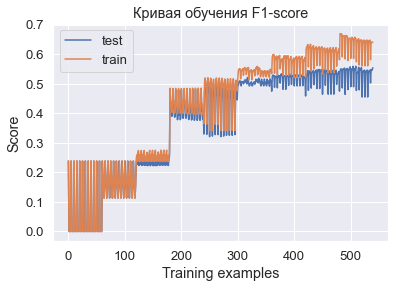

In [71]:
test_scores = grid_search_rf.cv_results_['mean_test_f1']
train_scores = grid_search_rf.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

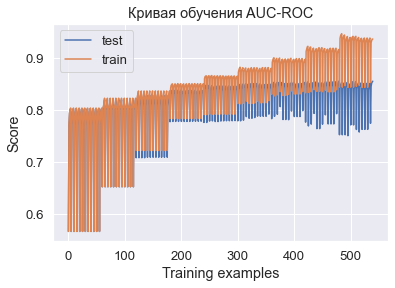

In [72]:
test_scores = grid_search_rf.cv_results_['mean_test_roc_auc']
train_scores = grid_search_rf.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, не превышающий установленный порог точности для проекта. Значение f1-score - 0.559 при целевом - 0.59. AUC-ROC также не очень высокое - 0.855, хотя, конечно, выше чем для случайной модели -0.5. Но пока это лучший результат для обоих показателей f1-score и AUC-ROC.

Инициализируем модель логистической регрессии. Подберем наилучшие значения гиперпараметров для алгоритма LogisticRegression("логистическая регрессия"). 

In [73]:
model_lr = LogisticRegression(random_state=12345)
parameters = [{ 
              'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
              'max_iter': range (0,1000,100)
              }]
grid_search_lr = GridSearchCV(
              model_lr,
              parameters,
              cv = 3, 
              scoring = ['f1','roc_auc'],
              refit='f1',
              verbose=100,
              return_train_score=True
              )
grid_search_lr.fit(features_train, target_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START max_iter=0, solver=lbfgs...................................
[CV 1/3; 1/50] END max_iter=0, solver=lbfgs; f1: (train=0.006, test=0.008) roc_auc: (train=0.727, test=0.680) total time=   0.1s
[CV 2/3; 1/50] START max_iter=0, solver=lbfgs...................................
[CV 2/3; 1/50] END max_iter=0, solver=lbfgs; f1: (train=0.006, test=0.004) roc_auc: (train=0.700, test=0.730) total time=   0.0s
[CV 3/3; 1/50] START max_iter=0, solver=lbfgs...................................
[CV 3/3; 1/50] END max_iter=0, solver=lbfgs; f1: (train=0.008, test=0.004) roc_auc: (train=0.711, test=0.721) total time=   0.0s
[CV 1/3; 2/50] START max_iter=0, solver=liblinear...............................
[CV 1/3; 2/50] END max_iter=0, solver=liblinear; f1: (train=0.000, test=0.000) roc_auc: (train=0.500, test=0.500) total time=   0.0s
[CV 2/3; 2/50] START max_iter=0, solver=liblinear...............................
[CV 2/3; 2/50

[CV 3/3; 13/50] END max_iter=200, solver=sag; f1: (train=0.336, test=0.292) roc_auc: (train=0.769, test=0.765) total time=   0.0s
[CV 1/3; 14/50] START max_iter=200, solver=saga.................................
[CV 1/3; 14/50] END max_iter=200, solver=saga; f1: (train=0.340, test=0.331) roc_auc: (train=0.781, test=0.739) total time=   0.0s
[CV 2/3; 14/50] START max_iter=200, solver=saga.................................
[CV 2/3; 14/50] END max_iter=200, solver=saga; f1: (train=0.294, test=0.311) roc_auc: (train=0.759, test=0.790) total time=   0.0s
[CV 3/3; 14/50] START max_iter=200, solver=saga.................................
[CV 3/3; 14/50] END max_iter=200, solver=saga; f1: (train=0.336, test=0.292) roc_auc: (train=0.769, test=0.765) total time=   0.0s
[CV 1/3; 15/50] START max_iter=200, solver=newton-cg............................
[CV 1/3; 15/50] END max_iter=200, solver=newton-cg; f1: (train=0.340, test=0.331) roc_auc: (train=0.781, test=0.739) total time=   0.0s
[CV 2/3; 15/50] S

[CV 2/3; 28/50] END max_iter=500, solver=sag; f1: (train=0.294, test=0.311) roc_auc: (train=0.759, test=0.790) total time=   0.0s
[CV 3/3; 28/50] START max_iter=500, solver=sag..................................
[CV 3/3; 28/50] END max_iter=500, solver=sag; f1: (train=0.336, test=0.292) roc_auc: (train=0.769, test=0.765) total time=   0.0s
[CV 1/3; 29/50] START max_iter=500, solver=saga.................................
[CV 1/3; 29/50] END max_iter=500, solver=saga; f1: (train=0.340, test=0.331) roc_auc: (train=0.781, test=0.739) total time=   0.0s
[CV 2/3; 29/50] START max_iter=500, solver=saga.................................
[CV 2/3; 29/50] END max_iter=500, solver=saga; f1: (train=0.294, test=0.311) roc_auc: (train=0.759, test=0.790) total time=   0.0s
[CV 3/3; 29/50] START max_iter=500, solver=saga.................................
[CV 3/3; 29/50] END max_iter=500, solver=saga; f1: (train=0.336, test=0.292) roc_auc: (train=0.769, test=0.765) total time=   0.0s
[CV 1/3; 30/50] START m

[CV 3/3; 42/50] END max_iter=800, solver=liblinear; f1: (train=0.338, test=0.294) roc_auc: (train=0.769, test=0.765) total time=   0.0s
[CV 1/3; 43/50] START max_iter=800, solver=sag..................................
[CV 1/3; 43/50] END max_iter=800, solver=sag; f1: (train=0.340, test=0.331) roc_auc: (train=0.781, test=0.739) total time=   0.0s
[CV 2/3; 43/50] START max_iter=800, solver=sag..................................
[CV 2/3; 43/50] END max_iter=800, solver=sag; f1: (train=0.294, test=0.311) roc_auc: (train=0.759, test=0.790) total time=   0.0s
[CV 3/3; 43/50] START max_iter=800, solver=sag..................................
[CV 3/3; 43/50] END max_iter=800, solver=sag; f1: (train=0.336, test=0.292) roc_auc: (train=0.769, test=0.765) total time=   0.0s
[CV 1/3; 44/50] START max_iter=800, solver=saga.................................
[CV 1/3; 44/50] END max_iter=800, solver=saga; f1: (train=0.340, test=0.331) roc_auc: (train=0.781, test=0.739) total time=   0.0s
[CV 2/3; 44/50] STA

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=12345),
             param_grid=[{'max_iter': range(0, 1000, 100),
                          'solver': ['lbfgs', 'liblinear', 'sag', 'saga',
                                     'newton-cg']}],
             refit='f1', return_train_score=True, scoring=['f1', 'roc_auc'],
             verbose=100)

In [74]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_lr.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_lr.cv_results_['mean_test_roc_auc'][grid_search_lr.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_lr.best_params_}')

Значение f1: 0.3125605246520616
Значение auc-roc: 0.7643143196528402
Лучшие параметры: {'max_iter': 100, 'solver': 'liblinear'}


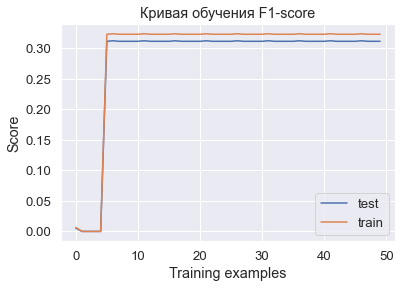

In [75]:
test_scores = grid_search_lr.cv_results_['mean_test_f1']
train_scores = grid_search_lr.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

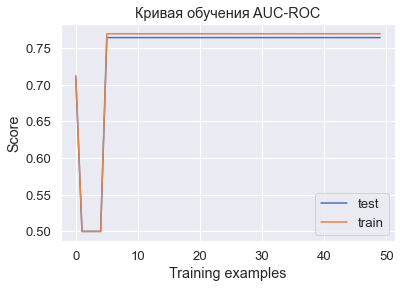

In [76]:
test_scores = grid_search_lr.cv_results_['mean_test_roc_auc']
train_scores = grid_search_lr.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, не превышающий установленный порог точности для проекта. Значение f1-score - 0.313 при целевом - 0.59. AUC-ROC также не очень высокое - 0.764, хотя, конечно, выше чем для случайной модели -0.5. Это худший результат среди моделей.

*Вывод:* Мы исследовали три модели: решающее дерево, случайный лес и логистическую регрессию. Для всех моделей мы подобрали оптимальные гиперпараметры, но тем не менее качество всех моделей не превышает установленное порговое значение. Лучшее качество показала модель случайного леса, ее качество лучше чем у решающего дерева, что закономерно, так как в модели случайного леса мы используем ансамбль решающих деревьев, а не одно дерево. Худшее значение метрики качества показала логистическая регрессия, что тоже закономерный результат, ее преимущество это время работы, а в точности она уступает двум предыдущим моделям. Наилучшее качество модели, таким образом, показал случайный лес f1 - 0.559, но это меньше порогового значения 0.59. Причина столь низких результатов работы моделей кроется в дисбалансе классов, который не был устранен на текущем этапе. 

## Борьба с дисбалансом

В данном разделе мы будем проводить поиск лучшей модели и использовать различные методы устранения последствий дизбаланса классов.

В датасете наблюдается явный дисбаланс классов, поэтому нам следует стратифицировать выборки. Stratified значит, что мы не просто случайно разделяем данные на train/test, а делаем так, что если train часть это 75% датасета, то в ней содержится ровно 75% объектов с классом 0. Это нужно для случаев, когда объектов класса 1 достаточно мало и при обычном случайном разделении в какую-то выборку может не попасть ни один объект класса 1.

In [77]:
# разделим данные на обучающую и тестовую выборку

def train_test_stratified_split(features, target, test_size=0.25, random_state=12345):
    # получим тестовую выборку
    features_train, features_test, target_train, target_test = train_test_split(
        features,
        target,
        stratify=target,
        test_size=test_size,
        random_state=12345
    )
    return features_train, features_test, target_train, target_test

features_train, features_test, target_train, target_test = train_test_stratified_split(features, target)

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(7500, 11)
(7500,)
(2500, 11)
(2500,)


В связи с тем, что в данных присутствуют количественные признаки с разными разбросами значений, проведем масштабирование признаков с использованием стандартизации данных для приведения их к одному масштабу.

In [78]:
# масштабирование признаков
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CustomerId                                                             
15603465       0.153616  0.583435 -0.004794  1.264113       0.807524   
15655464      -0.104283  2.694224 -0.731152 -1.222762      -0.915010   
15737971      -0.042388 -0.855740 -0.004794 -1.222762       0.807524   
15751297       0.844786 -0.280070 -0.004794 -1.222762       0.807524   
15615140       1.453428 -0.280070  0.358385  0.555736      -0.915010   

            HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
CustomerId                                                                  
15603465            1               0        -0.848725                  1   
15655464            0               1        -1.003683                  0   
15737971            1               0        -1.508697                  0   
15751297            1               0         1.057193                  0   
15615140            1               1         1.553724                  0   

            Geography_Spain  Gender_Male  
CustomerId                                
15603465                  0            0  
15655464                  0            0  
15737971                  0            0  
15751297                  0            1  
15615140                  0            1

Используем различные техники борьбы с дисбалансом классов

 -  взвешивание классов (параметр class_weight = 'balanced').

Используем взвешивание классов (параметр class_weight = 'balanced'). Алгоритмы машинного обучения считают все объекты обучающей выборки равнозначными. Но в том случае, если наблюдается значительный дисбаланс классов, для улучшения предсказательной способности модели придадим объектам редкого класса больший вес. 

Инициализируем модель решающее дерево. Подберем наилучшие значения гиперпараметров для алгоритма DecisionTreeClassifier("классификатор дерева решений"). Используем в подборе следующие гиперпараметры:
max_depth – глубина дерева 
criterions - выбор критерия : Джини либо энтропийного или log_loss.

In [79]:
%%time
model_dt = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
parameters = { 
    'max_depth': range (1, 11),
    'criterion':['gini', 'entropy', 'log_loss']
}
grid_search_dt_class = GridSearchCV(
    model_dt,
    parameters,
    cv = 3, 
    verbose=100,
    scoring = SCORING,
    refit='f1',
    return_train_score=True
    )

grid_search_dt_class.fit(features_train, target_train)
metrics_columns_dt_class = [f'mean_test_{x}' for x in SCORING]
final_metrics_dt_class = pd.DataFrame(grid_search_dt_class.cv_results_)[metrics_columns_dt_class].iloc[grid_search_dt_class.best_index_]

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START criterion=gini, max_depth=1................................
[CV 1/3; 1/30] END criterion=gini, max_depth=1; f1: (train=0.473, test=0.469) roc_auc: (train=0.688, test=0.686) total time=   0.0s
[CV 2/3; 1/30] START criterion=gini, max_depth=1................................
[CV 2/3; 1/30] END criterion=gini, max_depth=1; f1: (train=0.482, test=0.464) roc_auc: (train=0.688, test=0.673) total time=   0.0s
[CV 3/3; 1/30] START criterion=gini, max_depth=1................................
[CV 3/3; 1/30] END criterion=gini, max_depth=1; f1: (train=0.480, test=0.480) roc_auc: (train=0.683, test=0.681) total time=   0.0s
[CV 1/3; 2/30] START criterion=gini, max_depth=2................................
[CV 1/3; 2/30] END criterion=gini, max_depth=2; f1: (train=0.491, test=0.485) roc_auc: (train=0.741, test=0.746) total time=   0.0s
[CV 2/3; 2/30] START criterion=gini, max_depth=2................................
[CV 2/

[CV 3/3; 13/30] END criterion=entropy, max_depth=3; f1: (train=0.514, test=0.505) roc_auc: (train=0.798, test=0.781) total time=   0.0s
[CV 1/3; 14/30] START criterion=entropy, max_depth=4............................
[CV 1/3; 14/30] END criterion=entropy, max_depth=4; f1: (train=0.543, test=0.525) roc_auc: (train=0.822, test=0.819) total time=   0.0s
[CV 2/3; 14/30] START criterion=entropy, max_depth=4............................
[CV 2/3; 14/30] END criterion=entropy, max_depth=4; f1: (train=0.551, test=0.555) roc_auc: (train=0.823, test=0.820) total time=   0.0s
[CV 3/3; 14/30] START criterion=entropy, max_depth=4............................
[CV 3/3; 14/30] END criterion=entropy, max_depth=4; f1: (train=0.559, test=0.546) roc_auc: (train=0.827, test=0.808) total time=   0.0s
[CV 1/3; 15/30] START criterion=entropy, max_depth=5............................
[CV 1/3; 15/30] END criterion=entropy, max_depth=5; f1: (train=0.599, test=0.564) roc_auc: (train=0.855, test=0.837) total time=   0

[CV 3/3; 27/30] END criterion=log_loss, max_depth=7; f1: (train=0.613, test=0.560) roc_auc: (train=0.891, test=0.828) total time=   0.0s
[CV 1/3; 28/30] START criterion=log_loss, max_depth=8...........................
[CV 1/3; 28/30] END criterion=log_loss, max_depth=8; f1: (train=0.642, test=0.533) roc_auc: (train=0.915, test=0.783) total time=   0.0s
[CV 2/3; 28/30] START criterion=log_loss, max_depth=8...........................
[CV 2/3; 28/30] END criterion=log_loss, max_depth=8; f1: (train=0.658, test=0.561) roc_auc: (train=0.907, test=0.809) total time=   0.0s
[CV 3/3; 28/30] START criterion=log_loss, max_depth=8...........................
[CV 3/3; 28/30] END criterion=log_loss, max_depth=8; f1: (train=0.634, test=0.570) roc_auc: (train=0.912, test=0.818) total time=   0.0s
[CV 1/3; 29/30] START criterion=log_loss, max_depth=9...........................
[CV 1/3; 29/30] END criterion=log_loss, max_depth=9; f1: (train=0.684, test=0.530) roc_auc: (train=0.937, test=0.760) total time

In [80]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_dt_class.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_dt_class.cv_results_['mean_test_roc_auc'][grid_search_dt_class.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_dt_class.best_params_}')

Значение f1: 0.5654454241340234
Значение auc-roc: 0.8221371475911193
Лучшие параметры: {'criterion': 'entropy', 'max_depth': 7}


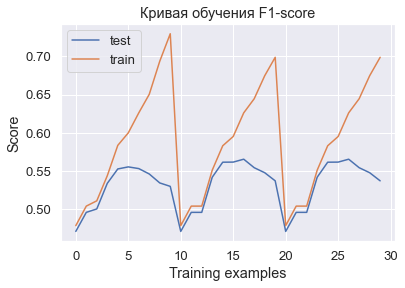

In [81]:
test_scores = grid_search_dt_class.cv_results_['mean_test_f1']
train_scores = grid_search_dt_class.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

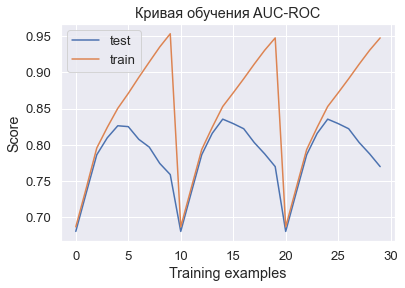

In [82]:
test_scores = grid_search_dt_class.cv_results_['mean_test_roc_auc']
train_scores = grid_search_dt_class.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, не превышающий установленный порог точности для проекта. Значение f1-score - 0.565 при целевом пороговом значении - 0.59. AUC-ROC  - 0.822, выше чем для случайной модели -0.5. 

Инициализируем модель случайного леса. Подберем наилучшие значения гиперпараметров для алгоритма RandomForestClassifier("классификатор случайного леса"). 
Используем в подборе следующие гиперпараметры:
 - n_estimators – количество деревьев в случайном лесу (будет изменяться от 1 до 50 с шагом 10)
 - max_depth – глубина дерева (будет изменяться от 1 до 9)
   /этот гиперпараметр определяет максимальное количество условий от вершины до финального ответа,     считается по количеству переходов между узлами/.
 - min_samples_leaf -  минимальное количество объектов в листе (будет изменяться от 1 до 3)
   /этот гиперпараметр не разрешает создавать лист, в котором слишком мало объектов обучающей выборки/.
 - min_samples_split – минимальное количество примеров для разделения (будет изменяться от 2 до 9 с шагом 2)
/этот гиперпараметр запрещает создавать узлы, в которые попадает слишком мало объектов обучающей выборки/.

In [83]:
%%time
model_rf = RandomForestClassifier(random_state=12345, class_weight='balanced')
parameters = { 
    'n_estimators': range (1, 51, 10),
    'max_depth': range (1, 10),
    'min_samples_leaf': range (1, 4),
    'min_samples_split': range (2, 10, 2)
}
grid_search_rf_class = GridSearchCV(
    model_rf,
    parameters,
    cv = 3, 
    verbose=100,
    scoring = SCORING,
    refit='f1',
    return_train_score=True
)

grid_search_rf_class.fit(features_train, target_train)
metrics_columns_rf_class = [f'mean_test_{x}' for x in SCORING]
final_metrics_rf_class = pd.DataFrame(grid_search_rf_class.cv_results_)[metrics_columns_rf_class].iloc[grid_search_rf_class.best_index_]

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV 1/3; 1/540] START max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 1/3; 1/540] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.234, test=0.240) roc_auc: (train=0.565, test=0.567) total time=   0.0s
[CV 2/3; 1/540] START max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 2/3; 1/540] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.240, test=0.226) roc_auc: (train=0.567, test=0.563) total time=   0.0s
[CV 3/3; 1/540] START max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 3/3; 1/540] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.233, test=0.241) roc_auc: (train=0.565, test=0.566) total time=   0.0s
[CV 1/3; 2/540] START max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=11
[CV 1/3; 2/540] END max_depth=1, min_samples_leaf

[CV 1/3; 12/540] END max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=11; f1: (train=0.476, test=0.489) roc_auc: (train=0.769, test=0.781) total time=   0.0s
[CV 2/3; 12/540] START max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=11
[CV 2/3; 12/540] END max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=11; f1: (train=0.429, test=0.429) roc_auc: (train=0.746, test=0.745) total time=   0.0s
[CV 3/3; 12/540] START max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=11
[CV 3/3; 12/540] END max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=11; f1: (train=0.489, test=0.472) roc_auc: (train=0.784, test=0.771) total time=   0.0s
[CV 1/3; 13/540] START max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=21
[CV 1/3; 13/540] END max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.536, test=0.537) roc_auc: (train=0.796, test=0.801) total time=   0.0s
[CV 2/3; 13/540] 

[CV 2/3; 23/540] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=21; f1: (train=0.539, test=0.515) roc_auc: (train=0.788, test=0.781) total time=   0.0s
[CV 3/3; 23/540] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=21
[CV 3/3; 23/540] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=21; f1: (train=0.543, test=0.546) roc_auc: (train=0.802, test=0.791) total time=   0.0s
[CV 1/3; 24/540] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 1/3; 24/540] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.539, test=0.530) roc_auc: (train=0.797, test=0.798) total time=   0.0s
[CV 2/3; 24/540] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 2/3; 24/540] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.515, test=0.496) roc_auc: (train=0.793, test=0.786) total time=   0.0s
[CV 3/3; 24/540] 

[CV 2/3; 34/540] END max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.515, test=0.496) roc_auc: (train=0.793, test=0.786) total time=   0.0s
[CV 3/3; 34/540] START max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 3/3; 34/540] END max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.512, test=0.520) roc_auc: (train=0.804, test=0.792) total time=   0.0s
[CV 1/3; 35/540] START max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=41
[CV 1/3; 35/540] END max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.533, test=0.526) roc_auc: (train=0.809, test=0.810) total time=   0.0s
[CV 2/3; 35/540] START max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=41
[CV 2/3; 35/540] END max_depth=1, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.534, test=0.514) roc_auc: (train=0.804, test=0.803) total time=   0.0s
[CV 3/3; 35/540] 

[CV 1/3; 45/540] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.533, test=0.526) roc_auc: (train=0.809, test=0.810) total time=   0.0s
[CV 2/3; 45/540] START max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 2/3; 45/540] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.534, test=0.514) roc_auc: (train=0.804, test=0.803) total time=   0.0s
[CV 3/3; 45/540] START max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 3/3; 45/540] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.544, test=0.548) roc_auc: (train=0.816, test=0.805) total time=   0.0s
[CV 1/3; 46/540] START max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 1/3; 46/540] END max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.234, test=0.240) roc_auc: (train=0.565, test=0.567) total time=   0.0s
[CV 2/3; 46/540] ST

[CV 2/3; 55/540] END max_depth=1, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.534, test=0.514) roc_auc: (train=0.804, test=0.803) total time=   0.0s
[CV 3/3; 55/540] START max_depth=1, min_samples_leaf=3, min_samples_split=6, n_estimators=41
[CV 3/3; 55/540] END max_depth=1, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.544, test=0.548) roc_auc: (train=0.816, test=0.805) total time=   0.0s
[CV 1/3; 56/540] START max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=1
[CV 1/3; 56/540] END max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=1; f1: (train=0.234, test=0.240) roc_auc: (train=0.565, test=0.567) total time=   0.0s
[CV 2/3; 56/540] START max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=1
[CV 2/3; 56/540] END max_depth=1, min_samples_leaf=3, min_samples_split=8, n_estimators=1; f1: (train=0.240, test=0.226) roc_auc: (train=0.567, test=0.563) total time=   0.0s
[CV 3/3; 56/540] STAR

[CV 3/3; 65/540] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=41; f1: (train=0.576, test=0.562) roc_auc: (train=0.836, test=0.823) total time=   0.0s
[CV 1/3; 66/540] START max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1
[CV 1/3; 66/540] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; f1: (train=0.411, test=0.410) roc_auc: (train=0.644, test=0.644) total time=   0.0s
[CV 2/3; 66/540] START max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1
[CV 2/3; 66/540] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; f1: (train=0.412, test=0.409) roc_auc: (train=0.645, test=0.642) total time=   0.0s
[CV 3/3; 66/540] START max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1
[CV 3/3; 66/540] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=1; f1: (train=0.410, test=0.413) roc_auc: (train=0.643, test=0.645) total time=   0.0s
[CV 1/3; 67/540] START 

[CV 3/3; 77/540] END max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=11; f1: (train=0.571, test=0.562) roc_auc: (train=0.823, test=0.813) total time=   0.0s
[CV 1/3; 78/540] START max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=21
[CV 1/3; 78/540] END max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=21; f1: (train=0.558, test=0.554) roc_auc: (train=0.819, test=0.819) total time=   0.0s
[CV 2/3; 78/540] START max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=21
[CV 2/3; 78/540] END max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=21; f1: (train=0.560, test=0.548) roc_auc: (train=0.820, test=0.811) total time=   0.0s
[CV 3/3; 78/540] START max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=21
[CV 3/3; 78/540] END max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=21; f1: (train=0.556, test=0.559) roc_auc: (train=0.823, test=0.813) total time=   0.0s
[CV 1/3; 79/540] 

[CV 1/3; 89/540] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.568, test=0.554) roc_auc: (train=0.822, test=0.822) total time=   0.0s
[CV 2/3; 89/540] START max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=31
[CV 2/3; 89/540] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.562, test=0.556) roc_auc: (train=0.821, test=0.815) total time=   0.0s
[CV 3/3; 89/540] START max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=31
[CV 3/3; 89/540] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.570, test=0.570) roc_auc: (train=0.828, test=0.814) total time=   0.0s
[CV 1/3; 90/540] START max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=41
[CV 1/3; 90/540] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.558, test=0.555) roc_auc: (train=0.830, test=0.830) total time=   0.0s
[CV 2/3; 90/540] 

[CV 2/3; 99/540] END max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=31; f1: (train=0.562, test=0.556) roc_auc: (train=0.821, test=0.815) total time=   0.0s
[CV 3/3; 99/540] START max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=31
[CV 3/3; 99/540] END max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=31; f1: (train=0.570, test=0.570) roc_auc: (train=0.828, test=0.814) total time=   0.0s
[CV 1/3; 100/540] START max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=41
[CV 1/3; 100/540] END max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.558, test=0.555) roc_auc: (train=0.830, test=0.830) total time=   0.0s
[CV 2/3; 100/540] START max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=41
[CV 2/3; 100/540] END max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.553, test=0.547) roc_auc: (train=0.826, test=0.820) total time=   0.0s
[CV 3/3; 100/

[CV 1/3; 110/540] END max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.558, test=0.555) roc_auc: (train=0.830, test=0.830) total time=   0.0s
[CV 2/3; 110/540] START max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=41
[CV 2/3; 110/540] END max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.553, test=0.547) roc_auc: (train=0.826, test=0.820) total time=   0.0s
[CV 3/3; 110/540] START max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=41
[CV 3/3; 110/540] END max_depth=2, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.576, test=0.562) roc_auc: (train=0.836, test=0.823) total time=   0.0s
[CV 1/3; 111/540] START max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=1
[CV 1/3; 111/540] END max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=1; f1: (train=0.411, test=0.410) roc_auc: (train=0.644, test=0.644) total time=   0.0s
[CV 2/3; 111

[CV 3/3; 120/540] END max_depth=2, min_samples_leaf=3, min_samples_split=8, n_estimators=41; f1: (train=0.576, test=0.562) roc_auc: (train=0.836, test=0.823) total time=   0.0s
[CV 1/3; 121/540] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 1/3; 121/540] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.461, test=0.455) roc_auc: (train=0.720, test=0.716) total time=   0.0s
[CV 2/3; 121/540] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 2/3; 121/540] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.460, test=0.460) roc_auc: (train=0.725, test=0.721) total time=   0.0s
[CV 3/3; 121/540] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 3/3; 121/540] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.448, test=0.447) roc_auc: (train=0.722, test=0.720) total time=   0.0s
[CV 1/3; 122/540

[CV 3/3; 132/540] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=11; f1: (train=0.551, test=0.551) roc_auc: (train=0.833, test=0.817) total time=   0.0s
[CV 1/3; 133/540] START max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=21
[CV 1/3; 133/540] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.567, test=0.560) roc_auc: (train=0.837, test=0.836) total time=   0.0s
[CV 2/3; 133/540] START max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=21
[CV 2/3; 133/540] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.569, test=0.556) roc_auc: (train=0.836, test=0.824) total time=   0.0s
[CV 3/3; 133/540] START max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=21
[CV 3/3; 133/540] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.578, test=0.578) roc_auc: (train=0.843, test=0.827) total time=   0.0s
[CV 1/3; 1

[CV 2/3; 143/540] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=21; f1: (train=0.569, test=0.556) roc_auc: (train=0.836, test=0.824) total time=   0.0s
[CV 3/3; 143/540] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=21
[CV 3/3; 143/540] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=21; f1: (train=0.578, test=0.578) roc_auc: (train=0.843, test=0.827) total time=   0.0s
[CV 1/3; 144/540] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 1/3; 144/540] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.559, test=0.553) roc_auc: (train=0.836, test=0.834) total time=   0.0s
[CV 2/3; 144/540] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 2/3; 144/540] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.568, test=0.552) roc_auc: (train=0.837, test=0.829) total time=   0.0s
[CV 3/3; 1

[CV 3/3; 153/540] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=21; f1: (train=0.578, test=0.578) roc_auc: (train=0.843, test=0.827) total time=   0.0s
[CV 1/3; 154/540] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 1/3; 154/540] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.559, test=0.553) roc_auc: (train=0.836, test=0.834) total time=   0.0s
[CV 2/3; 154/540] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 2/3; 154/540] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.568, test=0.552) roc_auc: (train=0.837, test=0.829) total time=   0.0s
[CV 3/3; 154/540] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 3/3; 154/540] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.577, test=0.568) roc_auc: (train=0.842, test=0.826) total time=   0.0s
[CV 1/3; 1

[CV 2/3; 164/540] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=31; f1: (train=0.568, test=0.552) roc_auc: (train=0.837, test=0.829) total time=   0.0s
[CV 3/3; 164/540] START max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=31
[CV 3/3; 164/540] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=31; f1: (train=0.577, test=0.568) roc_auc: (train=0.842, test=0.826) total time=   0.0s
[CV 1/3; 165/540] START max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 1/3; 165/540] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.563, test=0.555) roc_auc: (train=0.840, test=0.839) total time=   0.0s
[CV 2/3; 165/540] START max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 2/3; 165/540] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.563, test=0.554) roc_auc: (train=0.841, test=0.832) total time=   0.0s
[CV 3/3; 1

[CV 1/3; 175/540] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.563, test=0.555) roc_auc: (train=0.840, test=0.839) total time=   0.0s
[CV 2/3; 175/540] START max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=41
[CV 2/3; 175/540] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.563, test=0.554) roc_auc: (train=0.841, test=0.832) total time=   0.0s
[CV 3/3; 175/540] START max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=41
[CV 3/3; 175/540] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.574, test=0.570) roc_auc: (train=0.845, test=0.831) total time=   0.0s
[CV 1/3; 176/540] START max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1
[CV 1/3; 176/540] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1; f1: (train=0.461, test=0.455) roc_auc: (train=0.720, test=0.716) total time=   0.0s
[CV 2/3; 176

[CV 2/3; 185/540] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=41; f1: (train=0.587, test=0.573) roc_auc: (train=0.855, test=0.838) total time=   0.1s
[CV 3/3; 185/540] START max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=41
[CV 3/3; 185/540] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=41; f1: (train=0.595, test=0.584) roc_auc: (train=0.857, test=0.836) total time=   0.0s
[CV 1/3; 186/540] START max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1
[CV 1/3; 186/540] END max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1; f1: (train=0.544, test=0.549) roc_auc: (train=0.794, test=0.793) total time=   0.0s
[CV 2/3; 186/540] START max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1
[CV 2/3; 186/540] END max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1; f1: (train=0.532, test=0.523) roc_auc: (train=0.793, test=0.790) total time=   0.0s
[CV 3/3; 186/5

[CV 2/3; 196/540] END max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=1; f1: (train=0.532, test=0.523) roc_auc: (train=0.793, test=0.790) total time=   0.0s
[CV 3/3; 196/540] START max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=1
[CV 3/3; 196/540] END max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=1; f1: (train=0.566, test=0.542) roc_auc: (train=0.797, test=0.785) total time=   0.0s
[CV 1/3; 197/540] START max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=11
[CV 1/3; 197/540] END max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=11; f1: (train=0.598, test=0.585) roc_auc: (train=0.854, test=0.849) total time=   0.0s
[CV 2/3; 197/540] START max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=11
[CV 2/3; 197/540] END max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=11; f1: (train=0.594, test=0.576) roc_auc: (train=0.851, test=0.831) total time=   0.0s
[CV 3/3; 197/

[CV 3/3; 207/540] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=11; f1: (train=0.598, test=0.576) roc_auc: (train=0.848, test=0.825) total time=   0.0s
[CV 1/3; 208/540] START max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=21
[CV 1/3; 208/540] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=21; f1: (train=0.592, test=0.581) roc_auc: (train=0.854, test=0.847) total time=   0.0s
[CV 2/3; 208/540] START max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=21
[CV 2/3; 208/540] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=21; f1: (train=0.585, test=0.575) roc_auc: (train=0.854, test=0.836) total time=   0.0s
[CV 3/3; 208/540] START max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=21
[CV 3/3; 208/540] END max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=21; f1: (train=0.598, test=0.584) roc_auc: (train=0.853, test=0.833) total time=   0.0s
[CV 1/3; 2

[CV 3/3; 218/540] END max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=21; f1: (train=0.598, test=0.584) roc_auc: (train=0.853, test=0.833) total time=   0.0s
[CV 1/3; 219/540] START max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=31
[CV 1/3; 219/540] END max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=31; f1: (train=0.592, test=0.580) roc_auc: (train=0.854, test=0.845) total time=   0.0s
[CV 2/3; 219/540] START max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=31
[CV 2/3; 219/540] END max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=31; f1: (train=0.586, test=0.570) roc_auc: (train=0.854, test=0.837) total time=   0.0s
[CV 3/3; 219/540] START max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=31
[CV 3/3; 219/540] END max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=31; f1: (train=0.599, test=0.586) roc_auc: (train=0.854, test=0.833) total time=   0.0s
[CV 1/3; 2

[CV 1/3; 229/540] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=31; f1: (train=0.593, test=0.580) roc_auc: (train=0.855, test=0.846) total time=   0.0s
[CV 2/3; 229/540] START max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=31
[CV 2/3; 229/540] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=31; f1: (train=0.585, test=0.572) roc_auc: (train=0.854, test=0.836) total time=   0.0s
[CV 3/3; 229/540] START max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=31
[CV 3/3; 229/540] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=31; f1: (train=0.597, test=0.584) roc_auc: (train=0.855, test=0.834) total time=   0.0s
[CV 1/3; 230/540] START max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=41
[CV 1/3; 230/540] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.590, test=0.576) roc_auc: (train=0.857, test=0.849) total time=   0.0s
[CV 2/3; 2

[CV 3/3; 239/540] END max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=31; f1: (train=0.597, test=0.585) roc_auc: (train=0.854, test=0.833) total time=   0.0s
[CV 1/3; 240/540] START max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=41
[CV 1/3; 240/540] END max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=41; f1: (train=0.586, test=0.576) roc_auc: (train=0.857, test=0.849) total time=   0.0s
[CV 2/3; 240/540] START max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=41
[CV 2/3; 240/540] END max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=41; f1: (train=0.588, test=0.579) roc_auc: (train=0.855, test=0.840) total time=   0.0s
[CV 3/3; 240/540] START max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=41
[CV 3/3; 240/540] END max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=41; f1: (train=0.594, test=0.581) roc_auc: (train=0.857, test=0.836) total time=   0.0s
[CV 1/3; 2

[CV 2/3; 250/540] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=41; f1: (train=0.611, test=0.588) roc_auc: (train=0.870, test=0.844) total time=   0.0s
[CV 3/3; 250/540] START max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=41
[CV 3/3; 250/540] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=41; f1: (train=0.622, test=0.588) roc_auc: (train=0.877, test=0.848) total time=   0.1s
[CV 1/3; 251/540] START max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=1
[CV 1/3; 251/540] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=1; f1: (train=0.536, test=0.514) roc_auc: (train=0.804, test=0.794) total time=   0.0s
[CV 2/3; 251/540] START max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=1
[CV 2/3; 251/540] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=1; f1: (train=0.525, test=0.533) roc_auc: (train=0.789, test=0.789) total time=   0.0s
[CV 3/3; 251/5

[CV 2/3; 261/540] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1; f1: (train=0.525, test=0.533) roc_auc: (train=0.789, test=0.789) total time=   0.0s
[CV 3/3; 261/540] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1
[CV 3/3; 261/540] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1; f1: (train=0.546, test=0.535) roc_auc: (train=0.806, test=0.788) total time=   0.0s
[CV 1/3; 262/540] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=11
[CV 1/3; 262/540] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=11; f1: (train=0.621, test=0.592) roc_auc: (train=0.873, test=0.852) total time=   0.0s
[CV 2/3; 262/540] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=11
[CV 2/3; 262/540] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=11; f1: (train=0.620, test=0.592) roc_auc: (train=0.868, test=0.839) total time=   0.0s
[CV 3/3; 262/

[CV 2/3; 272/540] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=11; f1: (train=0.620, test=0.592) roc_auc: (train=0.867, test=0.839) total time=   0.0s
[CV 3/3; 272/540] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=11
[CV 3/3; 272/540] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=11; f1: (train=0.619, test=0.586) roc_auc: (train=0.867, test=0.841) total time=   0.0s
[CV 1/3; 273/540] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=21
[CV 1/3; 273/540] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=21; f1: (train=0.610, test=0.590) roc_auc: (train=0.871, test=0.852) total time=   0.0s
[CV 2/3; 273/540] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=21
[CV 2/3; 273/540] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=21; f1: (train=0.610, test=0.570) roc_auc: (train=0.868, test=0.839) total time=   0.0s
[CV 3/3; 2

[CV 3/3; 282/540] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=11; f1: (train=0.616, test=0.587) roc_auc: (train=0.867, test=0.843) total time=   0.0s
[CV 1/3; 283/540] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=21
[CV 1/3; 283/540] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=21; f1: (train=0.608, test=0.585) roc_auc: (train=0.870, test=0.852) total time=   0.0s
[CV 2/3; 283/540] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=21
[CV 2/3; 283/540] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=21; f1: (train=0.609, test=0.566) roc_auc: (train=0.867, test=0.839) total time=   0.0s
[CV 3/3; 283/540] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=21
[CV 3/3; 283/540] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=21; f1: (train=0.614, test=0.590) roc_auc: (train=0.872, test=0.846) total time=   0.0s
[CV 1/3; 2

[CV 2/3; 293/540] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=21; f1: (train=0.609, test=0.566) roc_auc: (train=0.867, test=0.839) total time=   0.0s
[CV 3/3; 293/540] START max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=21
[CV 3/3; 293/540] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=21; f1: (train=0.614, test=0.590) roc_auc: (train=0.872, test=0.846) total time=   0.0s
[CV 1/3; 294/540] START max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=31
[CV 1/3; 294/540] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=31; f1: (train=0.608, test=0.588) roc_auc: (train=0.871, test=0.851) total time=   0.0s
[CV 2/3; 294/540] START max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=31
[CV 2/3; 294/540] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=31; f1: (train=0.611, test=0.576) roc_auc: (train=0.868, test=0.842) total time=   0.0s
[CV 3/3; 2

[CV 1/3; 304/540] END max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=31; f1: (train=0.650, test=0.597) roc_auc: (train=0.889, test=0.855) total time=   0.0s
[CV 2/3; 304/540] START max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=31
[CV 2/3; 304/540] END max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=31; f1: (train=0.637, test=0.569) roc_auc: (train=0.890, test=0.843) total time=   0.0s
[CV 3/3; 304/540] START max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=31
[CV 3/3; 304/540] END max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=31; f1: (train=0.649, test=0.593) roc_auc: (train=0.893, test=0.850) total time=   0.0s
[CV 1/3; 305/540] START max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=41
[CV 1/3; 305/540] END max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=41; f1: (train=0.646, test=0.597) roc_auc: (train=0.890, test=0.857) total time=   0.1s
[CV 2/3; 3

[CV 3/3; 314/540] END max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=31; f1: (train=0.642, test=0.592) roc_auc: (train=0.889, test=0.848) total time=   0.0s
[CV 1/3; 315/540] START max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=41
[CV 1/3; 315/540] END max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=41; f1: (train=0.640, test=0.598) roc_auc: (train=0.888, test=0.854) total time=   0.1s
[CV 2/3; 315/540] START max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=41
[CV 2/3; 315/540] END max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=41; f1: (train=0.640, test=0.581) roc_auc: (train=0.890, test=0.848) total time=   0.1s
[CV 3/3; 315/540] START max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=41
[CV 3/3; 315/540] END max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=41; f1: (train=0.647, test=0.593) roc_auc: (train=0.890, test=0.850) total time=   0.1s
[CV 1/3; 3

[CV 1/3; 325/540] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=41; f1: (train=0.634, test=0.594) roc_auc: (train=0.887, test=0.852) total time=   0.1s
[CV 2/3; 325/540] START max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=41
[CV 2/3; 325/540] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=41; f1: (train=0.639, test=0.584) roc_auc: (train=0.889, test=0.849) total time=   0.1s
[CV 3/3; 325/540] START max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=41
[CV 3/3; 325/540] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=41; f1: (train=0.641, test=0.604) roc_auc: (train=0.892, test=0.851) total time=   0.1s
[CV 1/3; 326/540] START max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=1
[CV 1/3; 326/540] END max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=1; f1: (train=0.552, test=0.529) roc_auc: (train=0.818, test=0.791) total time=   0.0s
[CV 2/3; 326

[CV 2/3; 335/540] END max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.645, test=0.588) roc_auc: (train=0.890, test=0.850) total time=   0.1s
[CV 3/3; 335/540] START max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=41
[CV 3/3; 335/540] END max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=41; f1: (train=0.645, test=0.604) roc_auc: (train=0.891, test=0.851) total time=   0.1s
[CV 1/3; 336/540] START max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=1
[CV 1/3; 336/540] END max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=1; f1: (train=0.545, test=0.535) roc_auc: (train=0.804, test=0.784) total time=   0.0s
[CV 2/3; 336/540] START max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=1
[CV 2/3; 336/540] END max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=1; f1: (train=0.503, test=0.491) roc_auc: (train=0.797, test=0.766) total time=   0.0s
[CV 3/3; 336/5

[CV 3/3; 345/540] END max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.642, test=0.600) roc_auc: (train=0.890, test=0.851) total time=   0.1s
[CV 1/3; 346/540] START max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 1/3; 346/540] END max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.557, test=0.525) roc_auc: (train=0.808, test=0.761) total time=   0.0s
[CV 2/3; 346/540] START max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 2/3; 346/540] END max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.503, test=0.491) roc_auc: (train=0.796, test=0.764) total time=   0.0s
[CV 3/3; 346/540] START max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1
[CV 3/3; 346/540] END max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=1; f1: (train=0.530, test=0.525) roc_auc: (train=0.807, test=0.780) total time=   0.0s
[CV 1/3; 347/540

[CV 2/3; 357/540] END max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=11; f1: (train=0.624, test=0.598) roc_auc: (train=0.883, test=0.840) total time=   0.0s
[CV 3/3; 357/540] START max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=11
[CV 3/3; 357/540] END max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=11; f1: (train=0.632, test=0.585) roc_auc: (train=0.881, test=0.843) total time=   0.0s
[CV 1/3; 358/540] START max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=21
[CV 1/3; 358/540] END max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=21; f1: (train=0.642, test=0.600) roc_auc: (train=0.883, test=0.851) total time=   0.0s
[CV 2/3; 358/540] START max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=21
[CV 2/3; 358/540] END max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=21; f1: (train=0.643, test=0.592) roc_auc: (train=0.888, test=0.846) total time=   0.0s
[CV 3/3; 3

[CV 1/3; 368/540] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.678, test=0.604) roc_auc: (train=0.907, test=0.850) total time=   0.0s
[CV 2/3; 368/540] START max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=21
[CV 2/3; 368/540] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.677, test=0.582) roc_auc: (train=0.909, test=0.842) total time=   0.0s
[CV 3/3; 368/540] START max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=21
[CV 3/3; 368/540] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=21; f1: (train=0.681, test=0.604) roc_auc: (train=0.910, test=0.849) total time=   0.0s
[CV 1/3; 369/540] START max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=31
[CV 1/3; 369/540] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=31; f1: (train=0.679, test=0.608) roc_auc: (train=0.910, test=0.856) total time=   0.0s
[CV 2/3; 3

[CV 3/3; 378/540] END max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=21; f1: (train=0.681, test=0.593) roc_auc: (train=0.906, test=0.848) total time=   0.0s
[CV 1/3; 379/540] START max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 1/3; 379/540] END max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.663, test=0.611) roc_auc: (train=0.905, test=0.854) total time=   0.0s
[CV 2/3; 379/540] START max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 2/3; 379/540] END max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.674, test=0.592) roc_auc: (train=0.908, test=0.845) total time=   0.0s
[CV 3/3; 379/540] START max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=31
[CV 3/3; 379/540] END max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=31; f1: (train=0.682, test=0.597) roc_auc: (train=0.910, test=0.853) total time=   0.0s
[CV 1/3; 3

[CV 2/3; 389/540] END max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.673, test=0.581) roc_auc: (train=0.909, test=0.845) total time=   0.0s
[CV 3/3; 389/540] START max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=31
[CV 3/3; 389/540] END max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=31; f1: (train=0.688, test=0.605) roc_auc: (train=0.913, test=0.853) total time=   0.1s
[CV 1/3; 390/540] START max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=41
[CV 1/3; 390/540] END max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.677, test=0.613) roc_auc: (train=0.909, test=0.859) total time=   0.1s
[CV 2/3; 390/540] START max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=41
[CV 2/3; 390/540] END max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=41; f1: (train=0.672, test=0.591) roc_auc: (train=0.910, test=0.847) total time=   0.1s
[CV 3/3; 3

[CV 1/3; 400/540] END max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.666, test=0.611) roc_auc: (train=0.909, test=0.859) total time=   0.1s
[CV 2/3; 400/540] START max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=41
[CV 2/3; 400/540] END max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.674, test=0.593) roc_auc: (train=0.910, test=0.848) total time=   0.1s
[CV 3/3; 400/540] START max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=41
[CV 3/3; 400/540] END max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=41; f1: (train=0.682, test=0.607) roc_auc: (train=0.910, test=0.855) total time=   0.1s
[CV 1/3; 401/540] START max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=1
[CV 1/3; 401/540] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=1; f1: (train=0.567, test=0.528) roc_auc: (train=0.812, test=0.762) total time=   0.0s
[CV 2/3; 401

[CV 2/3; 410/540] END max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.675, test=0.595) roc_auc: (train=0.910, test=0.849) total time=   0.1s
[CV 3/3; 410/540] START max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=41
[CV 3/3; 410/540] END max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=41; f1: (train=0.687, test=0.599) roc_auc: (train=0.912, test=0.853) total time=   0.1s
[CV 1/3; 411/540] START max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=1
[CV 1/3; 411/540] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=1; f1: (train=0.567, test=0.528) roc_auc: (train=0.812, test=0.762) total time=   0.0s
[CV 2/3; 411/540] START max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=1
[CV 2/3; 411/540] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=1; f1: (train=0.568, test=0.532) roc_auc: (train=0.836, test=0.784) total time=   0.0s
[CV 3/3; 411/5

[CV 3/3; 420/540] END max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=41; f1: (train=0.674, test=0.602) roc_auc: (train=0.909, test=0.856) total time=   0.1s
[CV 1/3; 421/540] START max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 1/3; 421/540] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.586, test=0.533) roc_auc: (train=0.835, test=0.776) total time=   0.0s
[CV 2/3; 421/540] START max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 2/3; 421/540] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.611, test=0.542) roc_auc: (train=0.843, test=0.757) total time=   0.0s
[CV 3/3; 421/540] START max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1
[CV 3/3; 421/540] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1; f1: (train=0.593, test=0.514) roc_auc: (train=0.847, test=0.743) total time=   0.0s
[CV 1/3; 422/540

[CV 2/3; 432/540] END max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=11; f1: (train=0.698, test=0.602) roc_auc: (train=0.927, test=0.838) total time=   0.0s
[CV 3/3; 432/540] START max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=11
[CV 3/3; 432/540] END max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=11; f1: (train=0.701, test=0.579) roc_auc: (train=0.919, test=0.836) total time=   0.0s
[CV 1/3; 433/540] START max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=21
[CV 1/3; 433/540] END max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.713, test=0.618) roc_auc: (train=0.930, test=0.858) total time=   0.0s
[CV 2/3; 433/540] START max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=21
[CV 2/3; 433/540] END max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=21; f1: (train=0.704, test=0.605) roc_auc: (train=0.929, test=0.841) total time=   0.0s
[CV 3/3; 4

[CV 1/3; 443/540] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=21; f1: (train=0.732, test=0.612) roc_auc: (train=0.932, test=0.850) total time=   0.0s
[CV 2/3; 443/540] START max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=21
[CV 2/3; 443/540] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=21; f1: (train=0.710, test=0.581) roc_auc: (train=0.928, test=0.847) total time=   0.0s
[CV 3/3; 443/540] START max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=21
[CV 3/3; 443/540] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=21; f1: (train=0.707, test=0.590) roc_auc: (train=0.927, test=0.848) total time=   0.0s
[CV 1/3; 444/540] START max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=31
[CV 1/3; 444/540] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=31; f1: (train=0.732, test=0.623) roc_auc: (train=0.933, test=0.855) total time=   0.1s
[CV 2/3; 4

[CV 3/3; 453/540] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=21; f1: (train=0.711, test=0.590) roc_auc: (train=0.926, test=0.851) total time=   0.0s
[CV 1/3; 454/540] START max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 1/3; 454/540] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.712, test=0.607) roc_auc: (train=0.928, test=0.855) total time=   0.1s
[CV 2/3; 454/540] START max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 2/3; 454/540] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.705, test=0.593) roc_auc: (train=0.931, test=0.847) total time=   0.1s
[CV 3/3; 454/540] START max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=31
[CV 3/3; 454/540] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=31; f1: (train=0.720, test=0.586) roc_auc: (train=0.930, test=0.851) total time=   0.1s
[CV 1/3; 4

[CV 2/3; 464/540] END max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=31; f1: (train=0.699, test=0.603) roc_auc: (train=0.929, test=0.847) total time=   0.0s
[CV 3/3; 464/540] START max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=31
[CV 3/3; 464/540] END max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=31; f1: (train=0.707, test=0.598) roc_auc: (train=0.930, test=0.854) total time=   0.1s
[CV 1/3; 465/540] START max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 1/3; 465/540] END max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.714, test=0.607) roc_auc: (train=0.928, test=0.858) total time=   0.1s
[CV 2/3; 465/540] START max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=41
[CV 2/3; 465/540] END max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=41; f1: (train=0.702, test=0.606) roc_auc: (train=0.930, test=0.850) total time=   0.1s
[CV 3/3; 4

[CV 3/3; 474/540] END max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=31; f1: (train=0.707, test=0.598) roc_auc: (train=0.930, test=0.854) total time=   0.1s
[CV 1/3; 475/540] START max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=41
[CV 1/3; 475/540] END max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.714, test=0.607) roc_auc: (train=0.928, test=0.858) total time=   0.1s
[CV 2/3; 475/540] START max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=41
[CV 2/3; 475/540] END max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.702, test=0.606) roc_auc: (train=0.930, test=0.850) total time=   0.1s
[CV 3/3; 475/540] START max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=41
[CV 3/3; 475/540] END max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=41; f1: (train=0.715, test=0.598) roc_auc: (train=0.931, test=0.853) total time=   0.1s
[CV 1/3; 4

[CV 1/3; 485/540] END max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=41; f1: (train=0.779, test=0.621) roc_auc: (train=0.957, test=0.855) total time=   0.1s
[CV 2/3; 485/540] START max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=41
[CV 2/3; 485/540] END max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=41; f1: (train=0.781, test=0.590) roc_auc: (train=0.960, test=0.845) total time=   0.1s
[CV 3/3; 485/540] START max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=41
[CV 3/3; 485/540] END max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=41; f1: (train=0.781, test=0.593) roc_auc: (train=0.958, test=0.852) total time=   0.1s
[CV 1/3; 486/540] START max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=1
[CV 1/3; 486/540] END max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=1; f1: (train=0.618, test=0.512) roc_auc: (train=0.847, test=0.733) total time=   0.0s
[CV 2/3; 486

[CV 2/3; 495/540] END max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=41; f1: (train=0.761, test=0.597) roc_auc: (train=0.954, test=0.846) total time=   0.1s
[CV 3/3; 495/540] START max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=41
[CV 3/3; 495/540] END max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=41; f1: (train=0.772, test=0.596) roc_auc: (train=0.954, test=0.855) total time=   0.1s
[CV 1/3; 496/540] START max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=1
[CV 1/3; 496/540] END max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=1; f1: (train=0.601, test=0.537) roc_auc: (train=0.854, test=0.767) total time=   0.0s
[CV 2/3; 496/540] START max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=1
[CV 2/3; 496/540] END max_depth=9, min_samples_leaf=1, min_samples_split=8, n_estimators=1; f1: (train=0.607, test=0.486) roc_auc: (train=0.848, test=0.730) total time=   0.0s
[CV 3/3; 496/5

[CV 3/3; 505/540] END max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=41; f1: (train=0.770, test=0.600) roc_auc: (train=0.953, test=0.853) total time=   0.1s
[CV 1/3; 506/540] START max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=1
[CV 1/3; 506/540] END max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=1; f1: (train=0.613, test=0.515) roc_auc: (train=0.845, test=0.738) total time=   0.0s
[CV 2/3; 506/540] START max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=1
[CV 2/3; 506/540] END max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=1; f1: (train=0.599, test=0.509) roc_auc: (train=0.839, test=0.737) total time=   0.0s
[CV 3/3; 506/540] START max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=1
[CV 3/3; 506/540] END max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=1; f1: (train=0.618, test=0.530) roc_auc: (train=0.858, test=0.764) total time=   0.0s
[CV 1/3; 507/540

[CV 2/3; 517/540] END max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=11; f1: (train=0.740, test=0.581) roc_auc: (train=0.942, test=0.838) total time=   0.0s
[CV 3/3; 517/540] START max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=11
[CV 3/3; 517/540] END max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=11; f1: (train=0.740, test=0.597) roc_auc: (train=0.941, test=0.838) total time=   0.0s
[CV 1/3; 518/540] START max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=21
[CV 1/3; 518/540] END max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=21; f1: (train=0.762, test=0.611) roc_auc: (train=0.949, test=0.850) total time=   0.0s
[CV 2/3; 518/540] START max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=21
[CV 2/3; 518/540] END max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=21; f1: (train=0.755, test=0.596) roc_auc: (train=0.948, test=0.848) total time=   0.0s
[CV 3/3; 5

[CV 1/3; 528/540] END max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=21; f1: (train=0.747, test=0.620) roc_auc: (train=0.948, test=0.855) total time=   0.0s
[CV 2/3; 528/540] START max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=21
[CV 2/3; 528/540] END max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=21; f1: (train=0.750, test=0.603) roc_auc: (train=0.948, test=0.848) total time=   0.0s
[CV 3/3; 528/540] START max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=21
[CV 3/3; 528/540] END max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=21; f1: (train=0.741, test=0.607) roc_auc: (train=0.946, test=0.850) total time=   0.0s
[CV 1/3; 529/540] START max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=31
[CV 1/3; 529/540] END max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=31; f1: (train=0.755, test=0.623) roc_auc: (train=0.949, test=0.857) total time=   0.1s
[CV 2/3; 5

[CV 3/3; 538/540] END max_depth=9, min_samples_leaf=3, min_samples_split=8, n_estimators=21; f1: (train=0.745, test=0.605) roc_auc: (train=0.943, test=0.854) total time=   0.0s
[CV 1/3; 539/540] START max_depth=9, min_samples_leaf=3, min_samples_split=8, n_estimators=31
[CV 1/3; 539/540] END max_depth=9, min_samples_leaf=3, min_samples_split=8, n_estimators=31; f1: (train=0.747, test=0.621) roc_auc: (train=0.947, test=0.859) total time=   0.1s
[CV 2/3; 539/540] START max_depth=9, min_samples_leaf=3, min_samples_split=8, n_estimators=31
[CV 2/3; 539/540] END max_depth=9, min_samples_leaf=3, min_samples_split=8, n_estimators=31; f1: (train=0.752, test=0.590) roc_auc: (train=0.950, test=0.849) total time=   0.1s
[CV 3/3; 539/540] START max_depth=9, min_samples_leaf=3, min_samples_split=8, n_estimators=31
[CV 3/3; 539/540] END max_depth=9, min_samples_leaf=3, min_samples_split=8, n_estimators=31; f1: (train=0.752, test=0.604) roc_auc: (train=0.946, test=0.854) total time=   0.1s
[CV 1/3; 5

In [84]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_rf_class.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_rf_class.cv_results_['mean_test_roc_auc'][grid_search_rf_class.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_rf_class.best_params_}')

Значение f1: 0.6132476924059457
Значение auc-roc: 0.8535686065352742
Лучшие параметры: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 31}


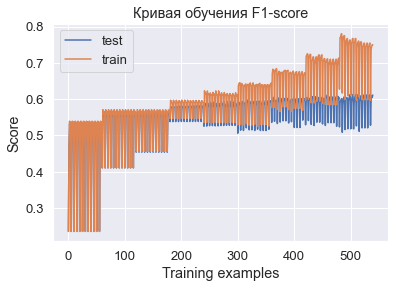

In [85]:
test_scores = grid_search_rf_class.cv_results_['mean_test_f1']
train_scores = grid_search_rf_class.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

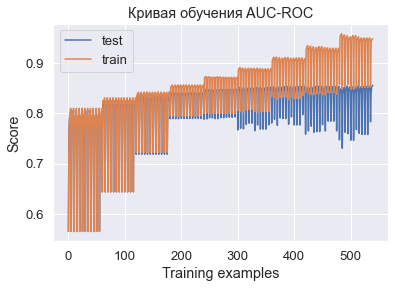

In [86]:
test_scores = grid_search_rf_class.cv_results_['mean_test_roc_auc']
train_scores = grid_search_rf_class.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, превышающий установленный порог точности для проекта. Значение f1-score - 0.613 при целевом - 0.59. AUC-ROC также высокое - 0.854 и выше чем для случайной модели -0.5. Это лучший результат среди моделей. 

Инициализируем модель логистической регрессии. Подберем наилучшие значения гиперпараметров для алгоритма LogisticRegression("логистическая регрессия"). 

In [87]:
model_lr = LogisticRegression(random_state=12345, class_weight='balanced')
parameters = [{ 
              'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
              'max_iter': range (0,1000,100)
              }]
grid_search_lr_class = GridSearchCV(
              model_lr,
              parameters,
              cv = 3, 
              verbose=100,
              scoring = SCORING,
              refit='f1',
              return_train_score=True
              )
grid_search_lr_class.fit(features_train, target_train)
metrics_columns_lr_class = [f'mean_test_{x}' for x in SCORING]
final_metrics_lr_class = pd.DataFrame(grid_search_lr_class.cv_results_)[metrics_columns_lr_class].iloc[grid_search_lr_class.best_index_]

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START max_iter=0, solver=lbfgs...................................
[CV 1/3; 1/50] END max_iter=0, solver=lbfgs; f1: (train=0.479, test=0.471) roc_auc: (train=0.746, test=0.748) total time=   0.0s
[CV 2/3; 1/50] START max_iter=0, solver=lbfgs...................................
[CV 2/3; 1/50] END max_iter=0, solver=lbfgs; f1: (train=0.477, test=0.475) roc_auc: (train=0.751, test=0.742) total time=   0.0s
[CV 3/3; 1/50] START max_iter=0, solver=lbfgs...................................
[CV 3/3; 1/50] END max_iter=0, solver=lbfgs; f1: (train=0.476, test=0.489) roc_auc: (train=0.747, test=0.748) total time=   0.0s
[CV 1/3; 2/50] START max_iter=0, solver=liblinear...............................
[CV 1/3; 2/50] END max_iter=0, solver=liblinear; f1: (train=0.000, test=0.000) roc_auc: (train=0.500, test=0.500) total time=   0.0s
[CV 2/3; 2/50] START max_iter=0, solver=liblinear...............................
[CV 2/3; 2/50

[CV 2/3; 14/50] END max_iter=200, solver=saga; f1: (train=0.497, test=0.485) roc_auc: (train=0.768, test=0.764) total time=   0.0s
[CV 3/3; 14/50] START max_iter=200, solver=saga.................................
[CV 3/3; 14/50] END max_iter=200, solver=saga; f1: (train=0.485, test=0.487) roc_auc: (train=0.768, test=0.762) total time=   0.0s
[CV 1/3; 15/50] START max_iter=200, solver=newton-cg............................
[CV 1/3; 15/50] END max_iter=200, solver=newton-cg; f1: (train=0.489, test=0.488) roc_auc: (train=0.767, test=0.767) total time=   0.0s
[CV 2/3; 15/50] START max_iter=200, solver=newton-cg............................
[CV 2/3; 15/50] END max_iter=200, solver=newton-cg; f1: (train=0.497, test=0.485) roc_auc: (train=0.768, test=0.764) total time=   0.0s
[CV 3/3; 15/50] START max_iter=200, solver=newton-cg............................
[CV 3/3; 15/50] END max_iter=200, solver=newton-cg; f1: (train=0.485, test=0.487) roc_auc: (train=0.768, test=0.762) total time=   0.0s
[CV 1/

[CV 1/3; 28/50] END max_iter=500, solver=sag; f1: (train=0.489, test=0.488) roc_auc: (train=0.767, test=0.767) total time=   0.0s
[CV 2/3; 28/50] START max_iter=500, solver=sag..................................
[CV 2/3; 28/50] END max_iter=500, solver=sag; f1: (train=0.497, test=0.485) roc_auc: (train=0.768, test=0.764) total time=   0.0s
[CV 3/3; 28/50] START max_iter=500, solver=sag..................................
[CV 3/3; 28/50] END max_iter=500, solver=sag; f1: (train=0.485, test=0.488) roc_auc: (train=0.768, test=0.762) total time=   0.0s
[CV 1/3; 29/50] START max_iter=500, solver=saga.................................
[CV 1/3; 29/50] END max_iter=500, solver=saga; f1: (train=0.489, test=0.488) roc_auc: (train=0.767, test=0.767) total time=   0.0s
[CV 2/3; 29/50] START max_iter=500, solver=saga.................................
[CV 2/3; 29/50] END max_iter=500, solver=saga; f1: (train=0.497, test=0.485) roc_auc: (train=0.768, test=0.764) total time=   0.0s
[CV 3/3; 29/50] START ma

[CV 3/3; 41/50] END max_iter=800, solver=lbfgs; f1: (train=0.485, test=0.487) roc_auc: (train=0.768, test=0.762) total time=   0.0s
[CV 1/3; 42/50] START max_iter=800, solver=liblinear............................
[CV 1/3; 42/50] END max_iter=800, solver=liblinear; f1: (train=0.489, test=0.489) roc_auc: (train=0.767, test=0.767) total time=   0.0s
[CV 2/3; 42/50] START max_iter=800, solver=liblinear............................
[CV 2/3; 42/50] END max_iter=800, solver=liblinear; f1: (train=0.497, test=0.485) roc_auc: (train=0.768, test=0.764) total time=   0.0s
[CV 3/3; 42/50] START max_iter=800, solver=liblinear............................
[CV 3/3; 42/50] END max_iter=800, solver=liblinear; f1: (train=0.485, test=0.488) roc_auc: (train=0.768, test=0.762) total time=   0.0s
[CV 1/3; 43/50] START max_iter=800, solver=sag..................................
[CV 1/3; 43/50] END max_iter=800, solver=sag; f1: (train=0.489, test=0.488) roc_auc: (train=0.767, test=0.767) total time=   0.0s
[CV 2/

In [88]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_lr_class.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_lr_class.cv_results_['mean_test_roc_auc'][grid_search_lr_class.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_lr_class.best_params_}')

Значение f1: 0.48701189458747024
Значение auc-roc: 0.7642856182613236
Лучшие параметры: {'max_iter': 100, 'solver': 'liblinear'}


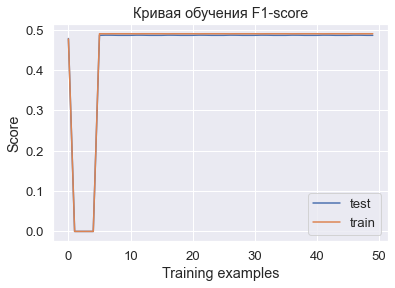

In [89]:
test_scores = grid_search_lr_class.cv_results_['mean_test_f1']
train_scores = grid_search_lr_class.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

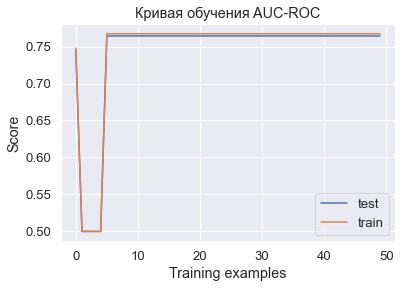

In [90]:
test_scores = grid_search_lr_class.cv_results_['mean_test_roc_auc']
train_scores = grid_search_lr_class.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, не превышающий установленный порог точности для проекта. Значение f1-score - 0.487 при целевом - 0.59. AUC-ROC также не очень высокое - 0.764, хотя, конечно, выше чем для случайной модели -0.5. 

 - Используем технику upsampling (увеличение выборки)

Upsampling - техника балансирования классов, которая заключается в увечичении числа объектов меньшего класса путем многократного копирования объектов меньшего класса.

In [91]:
# upsampling
def upsample(features, target, repeat):

    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
# добавим перемешивание
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(12084, 11)
(12084,)


In [92]:
target_upsampled.value_counts(normalize=True)

1    0.505793
0    0.494207
Name: Exited, dtype: float64

Аналогичное разделение дает нам использование SMOTE ( англ. Synthetic Minority Oversampling Technique -"Техника синтентического оверсемплинга меньшего класса"). Проверим это с помощью следующего кода.

In [93]:
features_upsample, target_upsample = SMOTE(random_state=12345).fit_resample(features_train, target_train)
print(features_upsampled.shape)
print(target_upsampled.shape)
print(target_upsampled.mean())
print(target_upsampled.value_counts(normalize=True))

(12084, 11)
(12084,)
0.5057927838464085
1    0.505793
0    0.494207
Name: Exited, dtype: float64


Теперь проведем поиск лучших параметров с использованием GridSearchCV с использованием imbalanced-learn.

Инициализируем модель решающее дерево. Подберем наилучшие значения гиперпараметров для алгоритма DecisionTreeClassifier("классификатор дерева решений"). Используем в подборе следующие гиперпараметры:
max_depth – глубина дерева 
criterions - выбор критерия : Джини либо энтропийного или log_loss.

In [94]:
%%time
imba_pipeline_dt_up = make_pipeline(SMOTE(random_state=12345), DecisionTreeClassifier(random_state=12345))
params = { 
    'max_depth': range (1, 11),
    'criterion':['gini', 'entropy', 'log_loss']
}
new_params = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_search_dt_up = GridSearchCV(                         
                          imba_pipeline_dt_up,
                          param_grid=new_params,
                          cv = 3, 
                          verbose=100,
                          scoring = SCORING,
                          refit='f1',
                          return_train_score=True
                          )

grid_search_dt_up.fit(features_train, target_train)
metrics_columns_dt_up = [f'mean_test_{x}' for x in SCORING]
final_metrics_dt_up = pd.DataFrame(grid_search_dt_up.cv_results_)[metrics_columns_dt_up].iloc[grid_search_dt_up.best_index_]

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1
[CV 1/3; 1/30] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1; f1: (train=0.473, test=0.469) roc_auc: (train=0.688, test=0.686) total time=   0.0s
[CV 2/3; 1/30] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1
[CV 2/3; 1/30] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1; f1: (train=0.467, test=0.456) roc_auc: (train=0.687, test=0.676) total time=   0.0s
[CV 3/3; 1/30] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1
[CV 3/3; 1/30] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1; f1: (train=0.463, test=0.463) roc_auc: (train=0.684, test=0.682) total time=   0.0s
[CV 1/3; 2/30] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=2
[CV 1/3; 2/

[CV 3/3; 11/30] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=1; f1: (train=0.463, test=0.463) roc_auc: (train=0.684, test=0.682) total time=   0.0s
[CV 1/3; 12/30] START decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2
[CV 1/3; 12/30] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2; f1: (train=0.495, test=0.516) roc_auc: (train=0.741, test=0.746) total time=   0.0s
[CV 2/3; 12/30] START decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2
[CV 2/3; 12/30] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2; f1: (train=0.498, test=0.484) roc_auc: (train=0.742, test=0.732) total time=   0.0s
[CV 3/3; 12/30] START decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2
[CV 3/3; 12/30] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2; f1: (train=0.500, test=0.480) roc_auc: (train

[CV 3/3; 22/30] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=2; f1: (train=0.500, test=0.480) roc_auc: (train=0.742, test=0.733) total time=   0.0s
[CV 1/3; 23/30] START decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=3
[CV 1/3; 23/30] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=3; f1: (train=0.523, test=0.539) roc_auc: (train=0.788, test=0.791) total time=   0.0s
[CV 2/3; 23/30] START decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=3
[CV 2/3; 23/30] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=3; f1: (train=0.526, test=0.506) roc_auc: (train=0.788, test=0.780) total time=   0.0s
[CV 3/3; 23/30] START decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=3
[CV 3/3; 23/30] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=3; f1: (train=0.523, test=0.513) roc_auc:

In [95]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_dt_up.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_dt_up.cv_results_['mean_test_roc_auc'][grid_search_dt_up.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_dt_up.best_params_}')

Значение f1: 0.5622695718075853
Значение auc-roc: 0.8217628578387695
Лучшие параметры: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5}


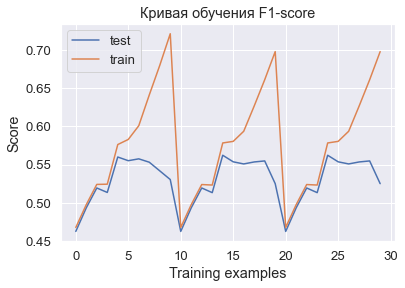

In [96]:
test_scores = grid_search_dt_up.cv_results_['mean_test_f1']
train_scores = grid_search_dt_up.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

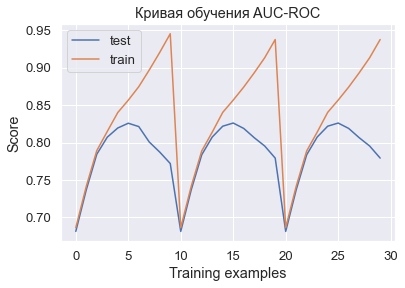

In [97]:
test_scores = grid_search_dt_up.cv_results_['mean_test_roc_auc']
train_scores = grid_search_dt_up.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, не превышающий установленный порог точности для проекта. Значение f1-score - 0.562 при целевом - 0.59. AUC-ROC  - 0.822, выше чем для случайной модели -0.5. 

Инициализируем модель случайного леса. Подберем наилучшие значения гиперпараметров для алгоритма RandomForestClassifier("классификатор случайного леса"). 
Используем в подборе следующие гиперпараметры:
 - n_estimators – количество деревьев в случайном лесу (будет изменяться от 1 до 50 с шагом 10)
 - max_depth – глубина дерева (будет изменяться от 1 до 9)
   /этот гиперпараметр определяет максимальное количество условий от вершины до финального ответа,     считается по количеству переходов между узлами/.
 - min_samples_leaf -  минимальное количество объектов в листе (будет изменяться от 1 до 3)
   /этот гиперпараметр не разрешает создавать лист, в котором слишком мало объектов обучающей выборки/.
 - min_samples_split – минимальное количество примеров для разделения (будет изменяться от 2 до 9 с шагом 2)
/этот гиперпараметр запрещает создавать узлы, в которые попадает слишком мало объектов обучающей выборки/.

In [98]:
%%time
imba_pipeline_rf_up = make_pipeline(SMOTE(random_state=12345), RandomForestClassifier(random_state=12345))
params = { 
    'n_estimators': range (1, 51, 10),
    'max_depth': range (1, 10),
    'min_samples_leaf': range (1, 4),
    'min_samples_split': range (2, 10, 2)
}
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_search_rf_up = GridSearchCV(
                          imba_pipeline_rf_up,
                          param_grid=new_params,
                          cv = 3, 
                          verbose=100,
                          scoring = SCORING,
                          refit='f1',
                          return_train_score=True )
grid_search_rf_up.fit(features_train, target_train)
metrics_columns_rf_up = [f'mean_test_{x}' for x in SCORING]
final_metrics_rf_up = pd.DataFrame(grid_search_rf_up.cv_results_)[metrics_columns_rf_up].iloc[grid_search_rf_up.best_index_]

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV 1/3; 1/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 1/3; 1/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.234, test=0.240) roc_auc: (train=0.565, test=0.567) total time=   0.0s
[CV 2/3; 1/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 2/3; 1/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.240, test=0.226) roc_auc: (train=0.567, test=0.563) total time=   0.0s
[CV 3/3; 1/540] START 

[CV 2/3; 7/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.430, test=0.431) roc_auc: (train=0.735, test=0.734) total time=   0.0s
[CV 3/3; 7/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 7/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.432, test=0.424) roc_auc: (train=0.747, test=0.741) total time=   0.0s
[CV 1/3; 8/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 1/3; 8/540] END randomforestclassifier__max_depth=1, randomforestclassifier__m

[CV 2/3; 13/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.525, test=0.504) roc_auc: (train=0.764, test=0.760) total time=   0.0s
[CV 3/3; 13/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 13/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.510, test=0.504) roc_auc: (train=0.780, test=0.774) total time=   0.0s
[CV 1/3; 14/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 1/3; 14/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 3/3; 19/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.523, test=0.528) roc_auc: (train=0.782, test=0.778) total time=   0.0s
[CV 1/3; 20/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 20/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.534, test=0.536) roc_auc: (train=0.797, test=0.796) total time=   0.0s
[CV 2/3; 20/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 2/3; 20/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 1/3; 26/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1; f1: (train=0.234, test=0.240) roc_auc: (train=0.565, test=0.567) total time=   0.0s
[CV 2/3; 26/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 2/3; 26/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1; f1: (train=0.240, test=0.226) roc_auc: (train=0.567, test=0.563) total time=   0.0s
[CV 3/3; 26/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 3/3; 26/540] END randomforestclassifier__max_depth=1, randomforestclassifier__

[CV 2/3; 32/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.430, test=0.431) roc_auc: (train=0.735, test=0.734) total time=   0.0s
[CV 3/3; 32/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 3/3; 32/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.432, test=0.424) roc_auc: (train=0.747, test=0.741) total time=   0.0s
[CV 1/3; 33/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 1/3; 33/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 2/3; 38/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.525, test=0.504) roc_auc: (train=0.764, test=0.760) total time=   0.0s
[CV 3/3; 38/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 3/3; 38/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.510, test=0.504) roc_auc: (train=0.780, test=0.774) total time=   0.0s
[CV 1/3; 39/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 1/3; 39/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 2/3; 44/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.538, test=0.509) roc_auc: (train=0.774, test=0.767) total time=   0.0s
[CV 3/3; 44/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 3/3; 44/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.523, test=0.528) roc_auc: (train=0.782, test=0.778) total time=   0.0s
[CV 1/3; 45/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 1/3; 45/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 2/3; 50/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.542, test=0.511) roc_auc: (train=0.778, test=0.773) total time=   0.0s
[CV 3/3; 50/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 3/3; 50/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.523, test=0.530) roc_auc: (train=0.791, test=0.787) total time=   0.0s
[CV 1/3; 51/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 1/3; 51/540] END randomforestclassifier__max_depth=1, randomforestclassifie

[CV 2/3; 57/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.430, test=0.431) roc_auc: (train=0.735, test=0.734) total time=   0.0s
[CV 3/3; 57/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 57/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.432, test=0.424) roc_auc: (train=0.747, test=0.741) total time=   0.0s
[CV 1/3; 58/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 1/3; 58/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 2/3; 63/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.547, test=0.531) roc_auc: (train=0.806, test=0.798) total time=   0.0s
[CV 3/3; 63/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 63/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.568, test=0.561) roc_auc: (train=0.814, test=0.809) total time=   0.0s
[CV 1/3; 64/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 1/3; 64/540] END randomforestclassifier__max_depth=2, randomforestclassifi

[CV 3/3; 69/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.565, test=0.562) roc_auc: (train=0.814, test=0.808) total time=   0.0s
[CV 1/3; 70/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 1/3; 70/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.567, test=0.565) roc_auc: (train=0.825, test=0.824) total time=   0.1s
[CV 2/3; 70/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 2/3; 70/540] END randomforestclassifier__max_depth=2, randomforestclassifi

[CV 3/3; 75/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.562, test=0.555) roc_auc: (train=0.824, test=0.818) total time=   0.1s
[CV 1/3; 76/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 1/3; 76/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1; f1: (train=0.411, test=0.410) roc_auc: (train=0.644, test=0.644) total time=   0.0s
[CV 2/3; 76/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 2/3; 76/540] END randomforestclassifier__max_depth=2, randomforestclassifier_

[CV 2/3; 82/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.581, test=0.555) roc_auc: (train=0.810, test=0.803) total time=   0.0s
[CV 3/3; 82/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 3/3; 82/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.569, test=0.567) roc_auc: (train=0.820, test=0.812) total time=   0.0s
[CV 1/3; 83/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 1/3; 83/540] END randomforestclassifier__max_depth=2, randomforestclassifi

[CV 2/3; 88/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.547, test=0.531) roc_auc: (train=0.806, test=0.798) total time=   0.0s
[CV 3/3; 88/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 3/3; 88/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.568, test=0.561) roc_auc: (train=0.814, test=0.809) total time=   0.0s
[CV 1/3; 89/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 1/3; 89/540] END randomforestclassifier__max_depth=2, randomforestclassifi

[CV 2/3; 94/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.552, test=0.526) roc_auc: (train=0.806, test=0.798) total time=   0.0s
[CV 3/3; 94/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 3/3; 94/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.565, test=0.562) roc_auc: (train=0.814, test=0.808) total time=   0.0s
[CV 1/3; 95/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 1/3; 95/540] END randomforestclassifier__max_depth=2, randomforestclassifi

[CV 3/3; 100/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.562, test=0.555) roc_auc: (train=0.824, test=0.818) total time=   0.1s
[CV 1/3; 101/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 1/3; 101/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.411, test=0.410) roc_auc: (train=0.644, test=0.644) total time=   0.0s
[CV 2/3; 101/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 2/3; 101/540] END randomforestclassifier__max_depth=2, randomforestclassi

[CV 2/3; 107/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.581, test=0.555) roc_auc: (train=0.810, test=0.803) total time=   0.0s
[CV 3/3; 107/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 107/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.569, test=0.567) roc_auc: (train=0.820, test=0.812) total time=   0.0s
[CV 1/3; 108/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 1/3; 108/540] END randomforestclassifier__max_depth=2, randomforestcla

[CV 3/3; 113/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.568, test=0.561) roc_auc: (train=0.814, test=0.809) total time=   0.0s
[CV 1/3; 114/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 1/3; 114/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.566, test=0.572) roc_auc: (train=0.815, test=0.812) total time=   0.0s
[CV 2/3; 114/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 2/3; 114/540] END randomforestclassifier__max_depth=2, randomforestcla

[CV 1/3; 120/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.567, test=0.565) roc_auc: (train=0.825, test=0.824) total time=   0.1s
[CV 2/3; 120/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 2/3; 120/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.562, test=0.534) roc_auc: (train=0.812, test=0.806) total time=   0.1s
[CV 3/3; 120/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 3/3; 120/540] END randomforestclassifier__max_depth=2, randomforestcla

[CV 1/3; 127/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.576, test=0.574) roc_auc: (train=0.833, test=0.830) total time=   0.0s
[CV 2/3; 127/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 2/3; 127/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.584, test=0.575) roc_auc: (train=0.829, test=0.824) total time=   0.0s
[CV 3/3; 127/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 127/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 1/3; 133/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.564, test=0.556) roc_auc: (train=0.832, test=0.828) total time=   0.0s
[CV 2/3; 133/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 2/3; 133/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.580, test=0.550) roc_auc: (train=0.830, test=0.820) total time=   0.0s
[CV 3/3; 133/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 133/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 2/3; 139/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.565, test=0.550) roc_auc: (train=0.828, test=0.818) total time=   0.1s
[CV 3/3; 139/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 139/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.585, test=0.576) roc_auc: (train=0.835, test=0.826) total time=   0.0s
[CV 1/3; 140/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 140/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 2/3; 145/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.565, test=0.554) roc_auc: (train=0.829, test=0.821) total time=   0.1s
[CV 3/3; 145/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 145/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.578, test=0.566) roc_auc: (train=0.837, test=0.828) total time=   0.1s
[CV 1/3; 146/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 146/540] END randomforestclassifier__max_depth=3, randomforestclas

[CV 1/3; 152/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.576, test=0.574) roc_auc: (train=0.833, test=0.830) total time=   0.0s
[CV 2/3; 152/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 2/3; 152/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.584, test=0.575) roc_auc: (train=0.829, test=0.824) total time=   0.0s
[CV 3/3; 152/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 3/3; 152/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 1/3; 158/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.564, test=0.556) roc_auc: (train=0.832, test=0.828) total time=   0.0s
[CV 2/3; 158/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 2/3; 158/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.580, test=0.550) roc_auc: (train=0.830, test=0.820) total time=   0.0s
[CV 3/3; 158/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 3/3; 158/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 2/3; 164/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.565, test=0.550) roc_auc: (train=0.828, test=0.818) total time=   0.0s
[CV 3/3; 164/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 3/3; 164/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.585, test=0.576) roc_auc: (train=0.835, test=0.826) total time=   0.0s
[CV 1/3; 165/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 1/3; 165/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 2/3; 170/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.565, test=0.554) roc_auc: (train=0.829, test=0.821) total time=   0.1s
[CV 3/3; 170/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 3/3; 170/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.578, test=0.566) roc_auc: (train=0.837, test=0.828) total time=   0.1s
[CV 1/3; 171/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 1/3; 171/540] END randomforestclassifier__max_depth=3, randomforestclas

[CV 1/3; 177/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.576, test=0.574) roc_auc: (train=0.833, test=0.830) total time=   0.0s
[CV 2/3; 177/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 2/3; 177/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.584, test=0.575) roc_auc: (train=0.829, test=0.824) total time=   0.0s
[CV 3/3; 177/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 177/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 1/3; 183/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.572, test=0.569) roc_auc: (train=0.840, test=0.830) total time=   0.0s
[CV 2/3; 183/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 2/3; 183/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.581, test=0.567) roc_auc: (train=0.840, test=0.825) total time=   0.0s
[CV 3/3; 183/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 183/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 2/3; 189/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.574, test=0.559) roc_auc: (train=0.834, test=0.820) total time=   0.1s
[CV 3/3; 189/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 189/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.589, test=0.570) roc_auc: (train=0.844, test=0.830) total time=   0.1s
[CV 1/3; 190/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 1/3; 190/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 2/3; 195/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.583, test=0.562) roc_auc: (train=0.839, test=0.825) total time=   0.1s
[CV 3/3; 195/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 195/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.603, test=0.573) roc_auc: (train=0.847, test=0.836) total time=   0.1s
[CV 1/3; 196/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 1/3; 196/540] END randomforestclassifier__max_depth=4, randomforestclas

[CV 1/3; 202/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.576, test=0.565) roc_auc: (train=0.837, test=0.829) total time=   0.0s
[CV 2/3; 202/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 2/3; 202/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.586, test=0.580) roc_auc: (train=0.836, test=0.824) total time=   0.0s
[CV 3/3; 202/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 3/3; 202/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 1/3; 208/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.571, test=0.564) roc_auc: (train=0.839, test=0.830) total time=   0.0s
[CV 2/3; 208/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 2/3; 208/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.581, test=0.567) roc_auc: (train=0.840, test=0.825) total time=   0.0s
[CV 3/3; 208/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 3/3; 208/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 1/3; 214/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.576, test=0.565) roc_auc: (train=0.838, test=0.827) total time=   0.1s
[CV 2/3; 214/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 2/3; 214/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.573, test=0.559) roc_auc: (train=0.834, test=0.820) total time=   0.1s
[CV 3/3; 214/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 3/3; 214/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 1/3; 220/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.575, test=0.568) roc_auc: (train=0.844, test=0.835) total time=   0.1s
[CV 2/3; 220/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 2/3; 220/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.583, test=0.568) roc_auc: (train=0.839, test=0.826) total time=   0.1s
[CV 3/3; 220/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 3/3; 220/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 1/3; 227/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.576, test=0.565) roc_auc: (train=0.837, test=0.829) total time=   0.0s
[CV 2/3; 227/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 2/3; 227/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.585, test=0.583) roc_auc: (train=0.836, test=0.825) total time=   0.0s
[CV 3/3; 227/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 227/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 1/3; 233/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.573, test=0.569) roc_auc: (train=0.840, test=0.831) total time=   0.0s
[CV 2/3; 233/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 2/3; 233/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.580, test=0.567) roc_auc: (train=0.840, test=0.825) total time=   0.0s
[CV 3/3; 233/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 233/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 2/3; 239/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.575, test=0.560) roc_auc: (train=0.834, test=0.820) total time=   0.1s
[CV 3/3; 239/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 239/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.591, test=0.564) roc_auc: (train=0.844, test=0.830) total time=   0.1s
[CV 1/3; 240/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 240/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 2/3; 245/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.615, test=0.578) roc_auc: (train=0.863, test=0.839) total time=   0.1s
[CV 3/3; 245/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 245/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.623, test=0.595) roc_auc: (train=0.863, test=0.843) total time=   0.1s
[CV 1/3; 246/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 246/540] END randomforestclassifier__max_depth=5, randomforestclas

[CV 1/3; 252/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.602, test=0.566) roc_auc: (train=0.856, test=0.836) total time=   0.0s
[CV 2/3; 252/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 2/3; 252/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.612, test=0.582) roc_auc: (train=0.859, test=0.839) total time=   0.0s
[CV 3/3; 252/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 3/3; 252/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 2/3; 258/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.613, test=0.576) roc_auc: (train=0.862, test=0.839) total time=   0.0s
[CV 3/3; 258/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 3/3; 258/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.621, test=0.581) roc_auc: (train=0.861, test=0.844) total time=   0.0s
[CV 1/3; 259/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 1/3; 259/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 2/3; 264/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.614, test=0.586) roc_auc: (train=0.862, test=0.839) total time=   0.1s
[CV 3/3; 264/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 3/3; 264/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.620, test=0.593) roc_auc: (train=0.860, test=0.840) total time=   0.1s
[CV 1/3; 265/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 1/3; 265/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 2/3; 270/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.611, test=0.584) roc_auc: (train=0.863, test=0.840) total time=   0.1s
[CV 3/3; 270/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 3/3; 270/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.623, test=0.590) roc_auc: (train=0.862, test=0.842) total time=   0.1s
[CV 1/3; 271/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 1/3; 271/540] END randomforestclassifier__max_depth=5, randomforestclas

[CV 1/3; 277/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.601, test=0.567) roc_auc: (train=0.856, test=0.836) total time=   0.0s
[CV 2/3; 277/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 2/3; 277/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.611, test=0.584) roc_auc: (train=0.858, test=0.839) total time=   0.0s
[CV 3/3; 277/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 277/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 1/3; 283/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.601, test=0.590) roc_auc: (train=0.861, test=0.843) total time=   0.0s
[CV 2/3; 283/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 2/3; 283/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.607, test=0.570) roc_auc: (train=0.861, test=0.839) total time=   0.0s
[CV 3/3; 283/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 283/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 1/3; 289/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.597, test=0.581) roc_auc: (train=0.861, test=0.842) total time=   0.1s
[CV 2/3; 289/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 2/3; 289/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.611, test=0.577) roc_auc: (train=0.860, test=0.838) total time=   0.1s
[CV 3/3; 289/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 289/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 1/3; 295/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.607, test=0.579) roc_auc: (train=0.863, test=0.844) total time=   0.1s
[CV 2/3; 295/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 2/3; 295/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.610, test=0.583) roc_auc: (train=0.862, test=0.839) total time=   0.1s
[CV 3/3; 295/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 295/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 1/3; 302/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.620, test=0.578) roc_auc: (train=0.870, test=0.845) total time=   0.0s
[CV 2/3; 302/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 2/3; 302/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.613, test=0.575) roc_auc: (train=0.872, test=0.838) total time=   0.0s
[CV 3/3; 302/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 3/3; 302/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 308/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.621, test=0.560) roc_auc: (train=0.872, test=0.835) total time=   0.0s
[CV 3/3; 308/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 3/3; 308/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.620, test=0.573) roc_auc: (train=0.870, test=0.838) total time=   0.1s
[CV 1/3; 309/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 1/3; 309/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 314/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.626, test=0.562) roc_auc: (train=0.871, test=0.835) total time=   0.1s
[CV 3/3; 314/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 3/3; 314/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.631, test=0.585) roc_auc: (train=0.873, test=0.840) total time=   0.1s
[CV 1/3; 315/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 1/3; 315/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 320/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.624, test=0.572) roc_auc: (train=0.873, test=0.839) total time=   0.2s
[CV 3/3; 320/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 3/3; 320/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.632, test=0.587) roc_auc: (train=0.874, test=0.843) total time=   0.1s
[CV 1/3; 321/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 1/3; 321/540] END randomforestclassifier__max_depth=6, randomforestclas

[CV 1/3; 327/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.617, test=0.577) roc_auc: (train=0.869, test=0.843) total time=   0.0s
[CV 2/3; 327/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 2/3; 327/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.621, test=0.570) roc_auc: (train=0.869, test=0.834) total time=   0.0s
[CV 3/3; 327/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 327/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 333/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.618, test=0.560) roc_auc: (train=0.872, test=0.837) total time=   0.0s
[CV 3/3; 333/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 333/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.621, test=0.575) roc_auc: (train=0.869, test=0.838) total time=   0.0s
[CV 1/3; 334/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 1/3; 334/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 339/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.620, test=0.575) roc_auc: (train=0.871, test=0.840) total time=   0.1s
[CV 3/3; 339/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 339/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.626, test=0.585) roc_auc: (train=0.873, test=0.841) total time=   0.1s
[CV 1/3; 340/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 340/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 345/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.619, test=0.562) roc_auc: (train=0.871, test=0.834) total time=   0.1s
[CV 3/3; 345/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 345/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.628, test=0.588) roc_auc: (train=0.874, test=0.842) total time=   0.2s
[CV 1/3; 346/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 346/540] END randomforestclassifier__max_depth=6, randomforestclas

[CV 1/3; 352/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.619, test=0.581) roc_auc: (train=0.870, test=0.848) total time=   0.0s
[CV 2/3; 352/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 2/3; 352/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.619, test=0.575) roc_auc: (train=0.869, test=0.834) total time=   0.0s
[CV 3/3; 352/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 3/3; 352/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 358/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.618, test=0.559) roc_auc: (train=0.871, test=0.839) total time=   0.1s
[CV 3/3; 358/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 3/3; 358/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.618, test=0.574) roc_auc: (train=0.869, test=0.840) total time=   0.1s
[CV 1/3; 359/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 1/3; 359/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 364/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.644, test=0.574) roc_auc: (train=0.888, test=0.828) total time=   0.1s
[CV 3/3; 364/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 3/3; 364/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.657, test=0.603) roc_auc: (train=0.892, test=0.842) total time=   0.1s
[CV 1/3; 365/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 1/3; 365/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 370/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.659, test=0.571) roc_auc: (train=0.891, test=0.834) total time=   0.2s
[CV 3/3; 370/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 3/3; 370/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.648, test=0.600) roc_auc: (train=0.892, test=0.845) total time=   0.2s
[CV 1/3; 371/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 1/3; 371/540] END randomforestclassifier__max_depth=7, randomforestclas

[CV 1/3; 377/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.644, test=0.573) roc_auc: (train=0.887, test=0.843) total time=   0.0s
[CV 2/3; 377/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 2/3; 377/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.640, test=0.575) roc_auc: (train=0.885, test=0.831) total time=   0.0s
[CV 3/3; 377/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 377/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 383/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.651, test=0.564) roc_auc: (train=0.887, test=0.829) total time=   0.1s
[CV 3/3; 383/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 383/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.657, test=0.587) roc_auc: (train=0.890, test=0.842) total time=   0.1s
[CV 1/3; 384/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 1/3; 384/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 389/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.650, test=0.570) roc_auc: (train=0.887, test=0.830) total time=   0.1s
[CV 3/3; 389/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 389/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.657, test=0.586) roc_auc: (train=0.892, test=0.841) total time=   0.1s
[CV 1/3; 390/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 1/3; 390/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 395/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.652, test=0.570) roc_auc: (train=0.890, test=0.834) total time=   0.2s
[CV 3/3; 395/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 395/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.651, test=0.591) roc_auc: (train=0.891, test=0.843) total time=   0.2s
[CV 1/3; 396/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 1/3; 396/540] END randomforestclassifier__max_depth=7, randomforestclas

[CV 1/3; 402/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.637, test=0.564) roc_auc: (train=0.884, test=0.842) total time=   0.0s
[CV 2/3; 402/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 2/3; 402/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.645, test=0.570) roc_auc: (train=0.883, test=0.831) total time=   0.0s
[CV 3/3; 402/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 3/3; 402/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 408/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.650, test=0.576) roc_auc: (train=0.888, test=0.835) total time=   0.1s
[CV 3/3; 408/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 3/3; 408/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.643, test=0.588) roc_auc: (train=0.886, test=0.841) total time=   0.1s
[CV 1/3; 409/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 1/3; 409/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 414/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.650, test=0.571) roc_auc: (train=0.888, test=0.834) total time=   0.1s
[CV 3/3; 414/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 3/3; 414/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.647, test=0.589) roc_auc: (train=0.887, test=0.840) total time=   0.1s
[CV 1/3; 415/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 1/3; 415/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 420/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.650, test=0.587) roc_auc: (train=0.889, test=0.838) total time=   0.2s
[CV 3/3; 420/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 3/3; 420/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.647, test=0.592) roc_auc: (train=0.889, test=0.846) total time=   0.2s
[CV 1/3; 421/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 1/3; 421/540] END randomforestclassifier__max_depth=8, randomforestclas

[CV 1/3; 427/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.672, test=0.591) roc_auc: (train=0.906, test=0.848) total time=   0.0s
[CV 2/3; 427/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 2/3; 427/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.679, test=0.563) roc_auc: (train=0.910, test=0.832) total time=   0.0s
[CV 3/3; 427/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 427/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 2/3; 433/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 2/3; 433/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.690, test=0.567) roc_auc: (train=0.910, test=0.837) total time=   0.1s
[CV 3/3; 433/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 433/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.680, test=0.585) roc_auc: (train=0.910, test=0.844) total time=   0.1s
[CV 1/3; 434/540] START randomforestclassifier__max_depth=8, randomforestc

[CV 2/3; 439/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.672, test=0.570) roc_auc: (train=0.906, test=0.837) total time=   0.1s
[CV 3/3; 439/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 439/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.674, test=0.587) roc_auc: (train=0.908, test=0.839) total time=   0.1s
[CV 1/3; 440/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 440/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 2/3; 445/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.680, test=0.575) roc_auc: (train=0.913, test=0.836) total time=   0.2s
[CV 3/3; 445/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 445/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.683, test=0.589) roc_auc: (train=0.912, test=0.846) total time=   0.2s
[CV 1/3; 446/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 446/540] END randomforestclassifier__max_depth=8, randomforestclas

[CV 1/3; 452/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.666, test=0.591) roc_auc: (train=0.905, test=0.846) total time=   0.0s
[CV 2/3; 452/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 2/3; 452/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.673, test=0.569) roc_auc: (train=0.903, test=0.835) total time=   0.0s
[CV 3/3; 452/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 3/3; 452/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 1/3; 458/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.669, test=0.586) roc_auc: (train=0.909, test=0.851) total time=   0.1s
[CV 2/3; 458/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 2/3; 458/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.672, test=0.568) roc_auc: (train=0.904, test=0.836) total time=   0.1s
[CV 3/3; 458/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 3/3; 458/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 1/3; 464/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.671, test=0.588) roc_auc: (train=0.909, test=0.848) total time=   0.1s
[CV 2/3; 464/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 2/3; 464/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.672, test=0.575) roc_auc: (train=0.906, test=0.832) total time=   0.1s
[CV 3/3; 464/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 3/3; 464/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 1/3; 470/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.673, test=0.585) roc_auc: (train=0.911, test=0.848) total time=   0.3s
[CV 2/3; 470/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 2/3; 470/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.676, test=0.576) roc_auc: (train=0.909, test=0.836) total time=   0.2s
[CV 3/3; 470/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 3/3; 470/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 1/3; 477/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.669, test=0.584) roc_auc: (train=0.903, test=0.840) total time=   0.0s
[CV 2/3; 477/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 2/3; 477/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.661, test=0.573) roc_auc: (train=0.902, test=0.835) total time=   0.0s
[CV 3/3; 477/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 477/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 1/3; 483/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.731, test=0.585) roc_auc: (train=0.940, test=0.842) total time=   0.1s
[CV 2/3; 483/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 2/3; 483/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.721, test=0.575) roc_auc: (train=0.935, test=0.834) total time=   0.1s
[CV 3/3; 483/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 483/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 1/3; 489/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.727, test=0.581) roc_auc: (train=0.940, test=0.846) total time=   0.2s
[CV 2/3; 489/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 2/3; 489/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.721, test=0.580) roc_auc: (train=0.935, test=0.833) total time=   0.1s
[CV 3/3; 489/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 489/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 1/3; 495/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.731, test=0.587) roc_auc: (train=0.939, test=0.854) total time=   0.2s
[CV 2/3; 495/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 2/3; 495/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.711, test=0.577) roc_auc: (train=0.933, test=0.838) total time=   0.2s
[CV 3/3; 495/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 495/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 1/3; 502/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.713, test=0.578) roc_auc: (train=0.928, test=0.841) total time=   0.0s
[CV 2/3; 502/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 2/3; 502/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.701, test=0.579) roc_auc: (train=0.927, test=0.831) total time=   0.0s
[CV 3/3; 502/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 3/3; 502/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 1/3; 508/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.713, test=0.583) roc_auc: (train=0.931, test=0.846) total time=   0.1s
[CV 2/3; 508/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 2/3; 508/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.711, test=0.575) roc_auc: (train=0.930, test=0.837) total time=   0.1s
[CV 3/3; 508/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 3/3; 508/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 1/3; 514/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.725, test=0.591) roc_auc: (train=0.934, test=0.849) total time=   0.2s
[CV 2/3; 514/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 2/3; 514/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.711, test=0.577) roc_auc: (train=0.930, test=0.835) total time=   0.1s
[CV 3/3; 514/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 3/3; 514/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 1/3; 520/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.726, test=0.586) roc_auc: (train=0.934, test=0.851) total time=   0.3s
[CV 2/3; 520/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 2/3; 520/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.702, test=0.580) roc_auc: (train=0.928, test=0.838) total time=   0.2s
[CV 3/3; 520/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 3/3; 520/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 1/3; 527/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.703, test=0.581) roc_auc: (train=0.924, test=0.844) total time=   0.0s
[CV 2/3; 527/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 2/3; 527/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.696, test=0.570) roc_auc: (train=0.923, test=0.829) total time=   0.0s
[CV 3/3; 527/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 527/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 1/3; 533/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.716, test=0.590) roc_auc: (train=0.929, test=0.845) total time=   0.1s
[CV 2/3; 533/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 2/3; 533/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.707, test=0.575) roc_auc: (train=0.927, test=0.837) total time=   0.1s
[CV 3/3; 533/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 533/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 1/3; 539/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.721, test=0.585) roc_auc: (train=0.930, test=0.846) total time=   0.2s
[CV 2/3; 539/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 2/3; 539/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.701, test=0.580) roc_auc: (train=0.926, test=0.839) total time=   0.1s
[CV 3/3; 539/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 539/540] END randomforestclassifier__max_depth=9, randomforestcla

In [99]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_rf_up.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_rf_up.cv_results_['mean_test_roc_auc'][grid_search_rf_up.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_rf_up.best_params_}')
#print(f'Значение f1:', grid_search_rf_up.cv_results_['mean_test_f1'][grid_search_rf_up.best_index_]) 
#print(f'Значение f1:', grid_search_rf_up.cv_results_['mean_test_f1'])
#print(f'Значение auc-roc:', grid_search_rf_up.cv_results_['mean_test_roc_auc'])
#print(f'Лучшие параметры: {grid_search_rf_up.best_index_}') 

Значение f1: 0.5935908083085141
Значение auc-roc: 0.8432994577585887
Лучшие параметры: {'randomforestclassifier__max_depth': 9, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__n_estimators': 31}


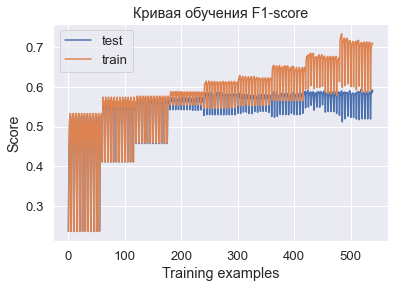

In [100]:
test_scores = grid_search_rf_up.cv_results_['mean_test_f1']
train_scores = grid_search_rf_up.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

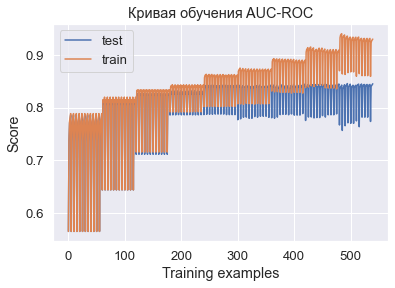

In [101]:
test_scores = grid_search_rf_up.cv_results_['mean_test_roc_auc']
train_scores = grid_search_rf_up.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, превышающий установленный порог точности для проекта. Значение f1-score - 0.594 при целевом - 0.59. AUC-ROC также достаточно высокое - 0.843, также выше чем для случайной модели -0.5. 

Инициализируем модель логистической регрессии. Подберем наилучшие значения гиперпараметров для алгоритма LogisticRegression("логистическая регрессия"). 

In [102]:
imba_pipeline_lr_up = make_pipeline(SMOTE(random_state=12345), LogisticRegression(random_state=12345))
params = {    'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
              'max_iter': range (0,1000,100)
              }
new_params = {'logisticregression__' + key: params[key] for key in params}                                    
grid_search_lr_up = GridSearchCV(
              imba_pipeline_lr_up,
              param_grid=new_params,
              cv = 3, 
              verbose=100,
              scoring = SCORING,
              refit='f1',
              return_train_score=True
              )
grid_search_lr_up.fit(features_train, target_train)
metrics_columns_lr_up = [f'mean_test_{x}' for x in SCORING]
final_metrics_lr_up = pd.DataFrame(grid_search_lr_up.cv_results_)[metrics_columns_lr_up].iloc[grid_search_lr_up.best_index_]

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START logisticregression__max_iter=0, logisticregression__solver=lbfgs
[CV 1/3; 1/50] END logisticregression__max_iter=0, logisticregression__solver=lbfgs; f1: (train=0.486, test=0.481) roc_auc: (train=0.750, test=0.751) total time=   0.0s
[CV 2/3; 1/50] START logisticregression__max_iter=0, logisticregression__solver=lbfgs
[CV 2/3; 1/50] END logisticregression__max_iter=0, logisticregression__solver=lbfgs; f1: (train=0.497, test=0.473) roc_auc: (train=0.756, test=0.748) total time=   0.0s
[CV 3/3; 1/50] START logisticregression__max_iter=0, logisticregression__solver=lbfgs
[CV 3/3; 1/50] END logisticregression__max_iter=0, logisticregression__solver=lbfgs; f1: (train=0.481, test=0.489) roc_auc: (train=0.753, test=0.754) total time=   0.0s
[CV 1/3; 2/50] START logisticregression__max_iter=0, logisticregression__solver=liblinear
[CV 1/3; 2/50] END logisticregression__max_iter=0, logisticregression__solver=libli

[CV 3/3; 11/50] END logisticregression__max_iter=200, logisticregression__solver=lbfgs; f1: (train=0.474, test=0.484) roc_auc: (train=0.755, test=0.752) total time=   0.0s
[CV 1/3; 12/50] START logisticregression__max_iter=200, logisticregression__solver=liblinear
[CV 1/3; 12/50] END logisticregression__max_iter=200, logisticregression__solver=liblinear; f1: (train=0.481, test=0.473) roc_auc: (train=0.754, test=0.755) total time=   0.0s
[CV 2/3; 12/50] START logisticregression__max_iter=200, logisticregression__solver=liblinear
[CV 2/3; 12/50] END logisticregression__max_iter=200, logisticregression__solver=liblinear; f1: (train=0.481, test=0.471) roc_auc: (train=0.756, test=0.750) total time=   0.0s
[CV 3/3; 12/50] START logisticregression__max_iter=200, logisticregression__solver=liblinear
[CV 3/3; 12/50] END logisticregression__max_iter=200, logisticregression__solver=liblinear; f1: (train=0.474, test=0.485) roc_auc: (train=0.755, test=0.752) total time=   0.0s
[CV 1/3; 13/50] START

[CV 2/3; 22/50] END logisticregression__max_iter=400, logisticregression__solver=liblinear; f1: (train=0.481, test=0.471) roc_auc: (train=0.756, test=0.750) total time=   0.0s
[CV 3/3; 22/50] START logisticregression__max_iter=400, logisticregression__solver=liblinear
[CV 3/3; 22/50] END logisticregression__max_iter=400, logisticregression__solver=liblinear; f1: (train=0.474, test=0.485) roc_auc: (train=0.755, test=0.752) total time=   0.0s
[CV 1/3; 23/50] START logisticregression__max_iter=400, logisticregression__solver=sag
[CV 1/3; 23/50] END logisticregression__max_iter=400, logisticregression__solver=sag; f1: (train=0.481, test=0.472) roc_auc: (train=0.754, test=0.755) total time=   0.0s
[CV 2/3; 23/50] START logisticregression__max_iter=400, logisticregression__solver=sag
[CV 2/3; 23/50] END logisticregression__max_iter=400, logisticregression__solver=sag; f1: (train=0.481, test=0.470) roc_auc: (train=0.756, test=0.750) total time=   0.0s
[CV 3/3; 23/50] START logisticregression_

[CV 1/3; 33/50] END logisticregression__max_iter=600, logisticregression__solver=sag; f1: (train=0.481, test=0.472) roc_auc: (train=0.754, test=0.755) total time=   0.0s
[CV 2/3; 33/50] START logisticregression__max_iter=600, logisticregression__solver=sag
[CV 2/3; 33/50] END logisticregression__max_iter=600, logisticregression__solver=sag; f1: (train=0.481, test=0.470) roc_auc: (train=0.756, test=0.750) total time=   0.0s
[CV 3/3; 33/50] START logisticregression__max_iter=600, logisticregression__solver=sag
[CV 3/3; 33/50] END logisticregression__max_iter=600, logisticregression__solver=sag; f1: (train=0.474, test=0.484) roc_auc: (train=0.755, test=0.752) total time=   0.0s
[CV 1/3; 34/50] START logisticregression__max_iter=600, logisticregression__solver=saga
[CV 1/3; 34/50] END logisticregression__max_iter=600, logisticregression__solver=saga; f1: (train=0.481, test=0.472) roc_auc: (train=0.754, test=0.755) total time=   0.0s
[CV 2/3; 34/50] START logisticregression__max_iter=600, l

[CV 1/3; 44/50] END logisticregression__max_iter=800, logisticregression__solver=saga; f1: (train=0.481, test=0.472) roc_auc: (train=0.754, test=0.755) total time=   0.0s
[CV 2/3; 44/50] START logisticregression__max_iter=800, logisticregression__solver=saga
[CV 2/3; 44/50] END logisticregression__max_iter=800, logisticregression__solver=saga; f1: (train=0.481, test=0.470) roc_auc: (train=0.756, test=0.750) total time=   0.0s
[CV 3/3; 44/50] START logisticregression__max_iter=800, logisticregression__solver=saga
[CV 3/3; 44/50] END logisticregression__max_iter=800, logisticregression__solver=saga; f1: (train=0.474, test=0.484) roc_auc: (train=0.755, test=0.752) total time=   0.0s
[CV 1/3; 45/50] START logisticregression__max_iter=800, logisticregression__solver=newton-cg
[CV 1/3; 45/50] END logisticregression__max_iter=800, logisticregression__solver=newton-cg; f1: (train=0.481, test=0.472) roc_auc: (train=0.754, test=0.755) total time=   0.0s
[CV 2/3; 45/50] START logisticregression__

In [103]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_lr_up.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_lr_up.cv_results_['mean_test_roc_auc'][grid_search_lr_up.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_lr_up.best_params_}')

Значение f1: 0.48096466327752624
Значение auc-roc: 0.7511348767395072
Лучшие параметры: {'logisticregression__max_iter': 0, 'logisticregression__solver': 'lbfgs'}


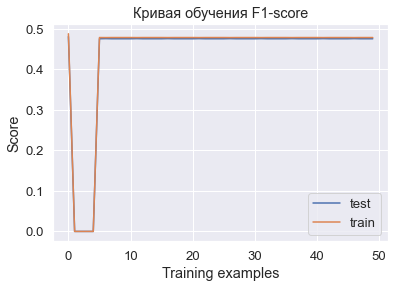

In [104]:
test_scores = grid_search_lr_up.cv_results_['mean_test_f1']
train_scores = grid_search_lr_up.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

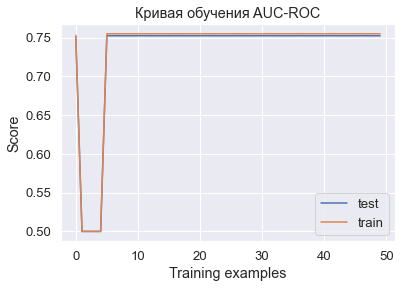

In [105]:
test_scores = grid_search_lr_up.cv_results_['mean_test_roc_auc']
train_scores = grid_search_lr_up.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, не превышающий установленный порог точности для проекта. Значение f1-score - 0.481 при целевом - 0.59. AUC-ROC также не очень высокое - 0.751, хотя, конечно, выше чем для случайной модели -0.5. 

 - используем технику downsampling (уменьшения выборки)

Downsampling - техника балансирования классов, которая заключается в уменьшении числа объектов большего класса путем случайного удаления объектов большего класса. 

In [106]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.256)
print(features_downsampled.shape)
print(target_downsampled.shape)

(3057, 11)
(3057,)


In [107]:
target_downsampled.value_counts(normalize=True)

0    0.500164
1    0.499836
Name: Exited, dtype: float64

Аналогичное разделение дает нам использование методов называется «Tomek Links». «Links» в данном случае — пары элементов из разных классов, находящиеся поблизости.Используя алгоритм мы в конечном итоге удалим элемент пары из большего набора, что позволит классификатору отработать лучше. Проверим это с помощью следующего кода.

In [108]:
features_downsample, target_downsample = TomekLinks().fit_resample(features_train, target_train)
print(features_downsampled.shape)
print(target_downsampled.shape)
print(target_downsampled.mean())
print(target_downsampled.value_counts(normalize=True))

(3057, 11)
(3057,)
0.4998364409551848
0    0.500164
1    0.499836
Name: Exited, dtype: float64


Теперь проведем поиск лучших параметров с использованием GridSearchCV с использованием imbalanced-learn.

Инициализируем модель решающее дерево. Подберем наилучшие значения гиперпараметров для алгоритма DecisionTreeClassifier("классификатор дерева решений"). Используем в подборе следующие гиперпараметры:
max_depth – глубина дерева 
criterions - выбор критерия : Джини либо энтропийного или log_loss.

In [109]:
%%time
imba_pipeline_dt_down = make_pipeline(TomekLinks(), DecisionTreeClassifier(random_state=12345))
params = { 
    'max_depth': range (1, 11),
    'criterion':['gini', 'entropy', 'log_loss']
}
new_params = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_search_dt_down = GridSearchCV(                         
                          imba_pipeline_dt_down,
                          param_grid=new_params,
                          cv = 3, 
                          verbose=100,
                          scoring = SCORING,
                          refit='f1',
                          return_train_score=True
                          )

grid_search_dt_down.fit(features_train, target_train)
metrics_columns_dt_down = [f'mean_test_{x}' for x in SCORING]
final_metrics_dt_down = pd.DataFrame(grid_search_dt_down.cv_results_)[metrics_columns_dt_down].iloc[grid_search_dt_down.best_index_]

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1
[CV 1/3; 1/30] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.668, test=0.674) total time=   0.1s
[CV 2/3; 1/30] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1
[CV 2/3; 1/30] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.685, test=0.678) total time=   0.1s
[CV 3/3; 1/30] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1
[CV 3/3; 1/30] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.672, test=0.666) total time=   0.1s
[CV 1/3; 2/30] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=2
[CV 1/3; 2/

[CV 1/3; 11/30] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.680, test=0.688) total time=   0.1s
[CV 2/3; 11/30] START decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=1
[CV 2/3; 11/30] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.688, test=0.673) total time=   0.1s
[CV 3/3; 11/30] START decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=1
[CV 3/3; 11/30] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.683, test=0.681) total time=   0.1s
[CV 1/3; 12/30] START decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2
[CV 1/3; 12/30] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2; f1: (train=0.500, test=0.529) roc_auc: (train

[CV 3/3; 20/30] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=10; f1: (train=0.751, test=0.537) roc_auc: (train=0.947, test=0.776) total time=   0.1s
[CV 1/3; 21/30] START decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=1
[CV 1/3; 21/30] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.680, test=0.688) total time=   0.1s
[CV 2/3; 21/30] START decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=1
[CV 2/3; 21/30] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=1; f1: (train=0.000, test=0.000) roc_auc: (train=0.688, test=0.673) total time=   0.1s
[CV 3/3; 21/30] START decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=1
[CV 3/3; 21/30] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=1; f1: (train=0.000, test=0.000) roc_auc:

[CV 2/3; 30/30] START decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=10
[CV 2/3; 30/30] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=10; f1: (train=0.726, test=0.567) roc_auc: (train=0.936, test=0.786) total time=   0.1s
[CV 3/3; 30/30] START decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=10
[CV 3/3; 30/30] END decisiontreeclassifier__criterion=log_loss, decisiontreeclassifier__max_depth=10; f1: (train=0.751, test=0.537) roc_auc: (train=0.947, test=0.776) total time=   0.1s
Wall time: 17.4 s


In [110]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_dt_down.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_dt_down.cv_results_['mean_test_roc_auc'][grid_search_dt_down.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_dt_down.best_params_}')

Значение f1: 0.5756437570303597
Значение auc-roc: 0.8221707985971595
Лучшие параметры: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 7}


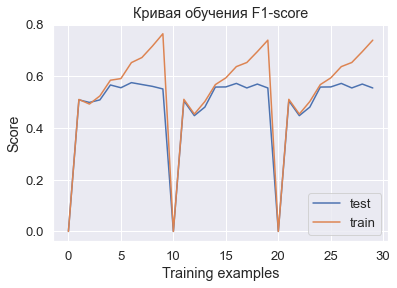

In [111]:
test_scores = grid_search_dt_down.cv_results_['mean_test_f1']
train_scores = grid_search_dt_down.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

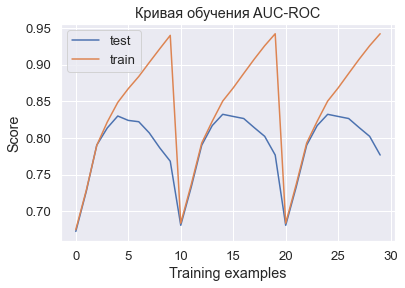

In [112]:
test_scores = grid_search_dt_down.cv_results_['mean_test_roc_auc']
train_scores = grid_search_dt_down.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, не превышающий установленный порог точности для проекта. Значение f1-score - 0.576 при целевом - 0.59. AUC-ROC - 0.822, выше чем для случайной модели -0.5. 

Инициализируем модель случайного леса. Подберем наилучшие значения гиперпараметров для алгоритма RandomForestClassifier("классификатор случайного леса"). 
Используем в подборе следующие гиперпараметры:
 - n_estimators – количество деревьев в случайном лесу (будет изменяться от 1 до 50 с шагом 10)
 - max_depth – глубина дерева (будет изменяться от 1 до 9)
   /этот гиперпараметр определяет максимальное количество условий от вершины до финального ответа,     считается по количеству переходов между узлами/.
 - min_samples_leaf -  минимальное количество объектов в листе (будет изменяться от 1 до 3)
   /этот гиперпараметр не разрешает создавать лист, в котором слишком мало объектов обучающей выборки/.
 - min_samples_split – минимальное количество примеров для разделения (будет изменяться от 2 до 9 с шагом 2)
/этот гиперпараметр запрещает создавать узлы, в которые попадает слишком мало объектов обучающей выборки/.

In [113]:
%%time
imba_pipeline_rf_down = make_pipeline(TomekLinks(), RandomForestClassifier(random_state=12345))
params = { 
    'n_estimators': range (1, 51, 10),
    'max_depth': range (1, 10),
    'min_samples_leaf': range (1, 4),
    'min_samples_split': range (2, 10, 2)
}
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_search_rf_down = GridSearchCV(
                          imba_pipeline_rf_down,
                          param_grid=new_params,
                          cv = 3, 
                          verbose=100,
                          scoring = SCORING,
                          refit='f1',
                          return_train_score=True )
grid_search_rf_down.fit(features_train, target_train)
metrics_columns_rf_down = [f'mean_test_{x}' for x in SCORING]
final_metrics_rf_down = pd.DataFrame(grid_search_rf_down.cv_results_)[metrics_columns_rf_down].iloc[grid_search_rf_down.best_index_]

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV 1/3; 1/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 1/3; 1/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.234, test=0.240) roc_auc: (train=0.565, test=0.567) total time=   0.1s
[CV 2/3; 1/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 2/3; 1/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.240, test=0.226) roc_auc: (train=0.567, test=0.563) total time=   0.1s
[CV 3/3; 1/540] START 

[CV 1/3; 7/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.000, test=0.000) roc_auc: (train=0.752, test=0.758) total time=   0.1s
[CV 2/3; 7/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 2/3; 7/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.000, test=0.000) roc_auc: (train=0.758, test=0.755) total time=   0.1s
[CV 3/3; 7/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 7/540] END randomforestclassifier__max_depth=1, randomforestclassifier__m

[CV 1/3; 13/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.781, test=0.789) total time=   0.1s
[CV 2/3; 13/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 2/3; 13/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.786, test=0.780) total time=   0.1s
[CV 3/3; 13/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 13/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 1/3; 19/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.000, test=0.000) roc_auc: (train=0.788, test=0.794) total time=   0.1s
[CV 2/3; 19/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 2/3; 19/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.000, test=0.000) roc_auc: (train=0.791, test=0.788) total time=   0.1s
[CV 3/3; 19/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 19/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 1/3; 25/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.000, test=0.000) roc_auc: (train=0.792, test=0.795) total time=   0.2s
[CV 2/3; 25/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 2/3; 25/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.000, test=0.000) roc_auc: (train=0.792, test=0.794) total time=   0.1s
[CV 3/3; 25/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 25/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 2/3; 31/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.240, test=0.226) roc_auc: (train=0.567, test=0.563) total time=   0.1s
[CV 3/3; 31/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 3/3; 31/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.233, test=0.241) roc_auc: (train=0.565, test=0.566) total time=   0.1s
[CV 1/3; 32/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 1/3; 32/540] END randomforestclassifier__max_depth=1, randomforestclassifier_

[CV 2/3; 37/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.000, test=0.000) roc_auc: (train=0.758, test=0.755) total time=   0.1s
[CV 3/3; 37/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 37/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.000, test=0.000) roc_auc: (train=0.756, test=0.740) total time=   0.1s
[CV 1/3; 38/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 1/3; 38/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 2/3; 43/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.786, test=0.780) total time=   0.1s
[CV 3/3; 43/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 43/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.000, test=0.000) roc_auc: (train=0.784, test=0.767) total time=   0.1s
[CV 1/3; 44/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 1/3; 44/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 2/3; 49/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.000, test=0.000) roc_auc: (train=0.791, test=0.788) total time=   0.1s
[CV 3/3; 49/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 49/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.000, test=0.000) roc_auc: (train=0.793, test=0.775) total time=   0.1s
[CV 1/3; 50/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 1/3; 50/540] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 2/3; 55/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.000, test=0.000) roc_auc: (train=0.792, test=0.794) total time=   0.1s
[CV 3/3; 55/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 55/540] END randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.000, test=0.000) roc_auc: (train=0.797, test=0.778) total time=   0.2s
[CV 1/3; 56/540] START randomforestclassifier__max_depth=1, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 1/3; 56/540] END randomforestclassifier__max_depth=1, randomforestclassifie

[CV 2/3; 61/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.240, test=0.226) roc_auc: (train=0.645, test=0.642) total time=   0.1s
[CV 3/3; 61/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 3/3; 61/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.233, test=0.241) roc_auc: (train=0.643, test=0.645) total time=   0.1s
[CV 1/3; 62/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 1/3; 62/540] END randomforestclassifier__max_depth=2, randomforestclassifier_

[CV 2/3; 67/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.211, test=0.184) roc_auc: (train=0.794, test=0.799) total time=   0.1s
[CV 3/3; 67/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 67/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.187, test=0.180) roc_auc: (train=0.795, test=0.777) total time=   0.1s
[CV 1/3; 68/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 1/3; 68/540] END randomforestclassifier__max_depth=2, randomforestclassifi

[CV 2/3; 73/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.170, test=0.135) roc_auc: (train=0.797, test=0.799) total time=   0.1s
[CV 3/3; 73/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 73/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.178, test=0.193) roc_auc: (train=0.800, test=0.781) total time=   0.1s
[CV 1/3; 74/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 1/3; 74/540] END randomforestclassifier__max_depth=2, randomforestclassifi

[CV 2/3; 79/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.154, test=0.125) roc_auc: (train=0.802, test=0.805) total time=   0.1s
[CV 3/3; 79/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 79/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.178, test=0.174) roc_auc: (train=0.808, test=0.788) total time=   0.1s
[CV 1/3; 80/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 80/540] END randomforestclassifier__max_depth=2, randomforestclassifi

[CV 2/3; 85/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.183, test=0.149) roc_auc: (train=0.811, test=0.814) total time=   0.2s
[CV 3/3; 85/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 85/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.199, test=0.215) roc_auc: (train=0.821, test=0.801) total time=   0.2s
[CV 1/3; 86/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 86/540] END randomforestclassifier__max_depth=2, randomforestclassifie

[CV 2/3; 91/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.240, test=0.226) roc_auc: (train=0.645, test=0.642) total time=   0.1s
[CV 3/3; 91/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 3/3; 91/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.233, test=0.241) roc_auc: (train=0.643, test=0.645) total time=   0.1s
[CV 1/3; 92/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 1/3; 92/540] END randomforestclassifier__max_depth=2, randomforestclassifier_

[CV 2/3; 97/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.211, test=0.184) roc_auc: (train=0.794, test=0.799) total time=   0.1s
[CV 3/3; 97/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 97/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.187, test=0.180) roc_auc: (train=0.795, test=0.777) total time=   0.1s
[CV 1/3; 98/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 1/3; 98/540] END randomforestclassifier__max_depth=2, randomforestclassifi

[CV 2/3; 103/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.170, test=0.135) roc_auc: (train=0.797, test=0.799) total time=   0.1s
[CV 3/3; 103/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 103/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.178, test=0.193) roc_auc: (train=0.800, test=0.781) total time=   0.1s
[CV 1/3; 104/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 1/3; 104/540] END randomforestclassifier__max_depth=2, randomforestcla

[CV 2/3; 109/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.152, test=0.125) roc_auc: (train=0.802, test=0.804) total time=   0.2s
[CV 3/3; 109/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 109/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.178, test=0.174) roc_auc: (train=0.808, test=0.788) total time=   0.1s
[CV 1/3; 110/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 1/3; 110/540] END randomforestclassifier__max_depth=2, randomforestcla

[CV 2/3; 115/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.186, test=0.156) roc_auc: (train=0.811, test=0.814) total time=   0.2s
[CV 3/3; 115/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 115/540] END randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.199, test=0.215) roc_auc: (train=0.821, test=0.801) total time=   0.2s
[CV 1/3; 116/540] START randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 1/3; 116/540] END randomforestclassifier__max_depth=2, randomforestclas

[CV 3/3; 121/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.249, test=0.255) roc_auc: (train=0.728, test=0.725) total time=   0.1s
[CV 1/3; 122/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 1/3; 122/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.311, test=0.298) roc_auc: (train=0.818, test=0.821) total time=   0.1s
[CV 2/3; 122/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 2/3; 122/540] END randomforestclassifier__max_depth=3, randomforestclas

[CV 3/3; 127/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.315, test=0.289) roc_auc: (train=0.826, test=0.803) total time=   0.1s
[CV 1/3; 128/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 1/3; 128/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.282, test=0.286) roc_auc: (train=0.824, test=0.825) total time=   0.1s
[CV 2/3; 128/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 2/3; 128/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 3/3; 133/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.327, test=0.296) roc_auc: (train=0.830, test=0.808) total time=   0.1s
[CV 1/3; 134/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 1/3; 134/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.343, test=0.341) roc_auc: (train=0.829, test=0.831) total time=   0.2s
[CV 2/3; 134/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 2/3; 134/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 3/3; 139/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.367, test=0.355) roc_auc: (train=0.836, test=0.816) total time=   0.2s
[CV 1/3; 140/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 140/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.367, test=0.356) roc_auc: (train=0.835, test=0.838) total time=   0.2s
[CV 2/3; 140/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 2/3; 140/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 3/3; 145/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.368, test=0.356) roc_auc: (train=0.842, test=0.823) total time=   0.2s
[CV 1/3; 146/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 146/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1; f1: (train=0.255, test=0.238) roc_auc: (train=0.727, test=0.724) total time=   0.1s
[CV 2/3; 146/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 2/3; 146/540] END randomforestclassifier__max_depth=3, randomforestclassi

[CV 3/3; 151/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.248, test=0.255) roc_auc: (train=0.728, test=0.725) total time=   0.1s
[CV 1/3; 152/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 1/3; 152/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.311, test=0.298) roc_auc: (train=0.818, test=0.821) total time=   0.1s
[CV 2/3; 152/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 2/3; 152/540] END randomforestclassifier__max_depth=3, randomforestclas

[CV 3/3; 157/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.315, test=0.289) roc_auc: (train=0.826, test=0.803) total time=   0.1s
[CV 1/3; 158/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 1/3; 158/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.282, test=0.286) roc_auc: (train=0.824, test=0.826) total time=   0.2s
[CV 2/3; 158/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 2/3; 158/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 3/3; 163/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.326, test=0.296) roc_auc: (train=0.830, test=0.809) total time=   0.1s
[CV 1/3; 164/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 1/3; 164/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.343, test=0.341) roc_auc: (train=0.829, test=0.831) total time=   0.2s
[CV 2/3; 164/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 2/3; 164/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 3/3; 169/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.367, test=0.355) roc_auc: (train=0.835, test=0.815) total time=   0.2s
[CV 1/3; 170/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 1/3; 170/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.367, test=0.357) roc_auc: (train=0.835, test=0.838) total time=   0.2s
[CV 2/3; 170/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 2/3; 170/540] END randomforestclassifier__max_depth=3, randomforestcla

[CV 3/3; 175/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.368, test=0.356) roc_auc: (train=0.842, test=0.823) total time=   0.2s
[CV 1/3; 176/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 1/3; 176/540] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1; f1: (train=0.255, test=0.238) roc_auc: (train=0.727, test=0.724) total time=   0.1s
[CV 2/3; 176/540] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 2/3; 176/540] END randomforestclassifier__max_depth=3, randomforestclassi

[CV 1/3; 182/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.494, test=0.495) roc_auc: (train=0.846, test=0.846) total time=   0.1s
[CV 2/3; 182/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 2/3; 182/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.528, test=0.527) roc_auc: (train=0.843, test=0.829) total time=   0.1s
[CV 3/3; 182/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 3/3; 182/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 1/3; 188/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.501, test=0.514) roc_auc: (train=0.848, test=0.847) total time=   0.1s
[CV 2/3; 188/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 2/3; 188/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.487, test=0.495) roc_auc: (train=0.848, test=0.838) total time=   0.2s
[CV 3/3; 188/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 3/3; 188/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 1/3; 194/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.500, test=0.511) roc_auc: (train=0.850, test=0.849) total time=   0.2s
[CV 2/3; 194/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 2/3; 194/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.448, test=0.453) roc_auc: (train=0.848, test=0.840) total time=   0.2s
[CV 3/3; 194/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 3/3; 194/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 1/3; 200/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.511, test=0.502) roc_auc: (train=0.851, test=0.850) total time=   0.2s
[CV 2/3; 200/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 2/3; 200/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.444, test=0.452) roc_auc: (train=0.850, test=0.842) total time=   0.2s
[CV 3/3; 200/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 3/3; 200/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 2/3; 206/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1; f1: (train=0.558, test=0.562) roc_auc: (train=0.782, test=0.775) total time=   0.1s
[CV 3/3; 206/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 3/3; 206/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1; f1: (train=0.561, test=0.523) roc_auc: (train=0.788, test=0.771) total time=   0.1s
[CV 1/3; 207/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 1/3; 207/540] END randomforestclassifier__max_depth=4, randomforestclassi

[CV 2/3; 212/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.527, test=0.527) roc_auc: (train=0.843, test=0.829) total time=   0.1s
[CV 3/3; 212/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 3/3; 212/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.535, test=0.493) roc_auc: (train=0.841, test=0.819) total time=   0.1s
[CV 1/3; 213/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 1/3; 213/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 2/3; 218/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.488, test=0.495) roc_auc: (train=0.848, test=0.839) total time=   0.2s
[CV 3/3; 218/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 3/3; 218/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.528, test=0.484) roc_auc: (train=0.850, test=0.827) total time=   0.2s
[CV 1/3; 219/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 1/3; 219/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 2/3; 224/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.463, test=0.475) roc_auc: (train=0.848, test=0.841) total time=   0.2s
[CV 3/3; 224/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 3/3; 224/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.531, test=0.495) roc_auc: (train=0.854, test=0.832) total time=   0.2s
[CV 1/3; 225/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 1/3; 225/540] END randomforestclassifier__max_depth=4, randomforestcla

[CV 2/3; 230/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.462, test=0.466) roc_auc: (train=0.849, test=0.842) total time=   0.2s
[CV 3/3; 230/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 3/3; 230/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.529, test=0.484) roc_auc: (train=0.857, test=0.836) total time=   0.2s
[CV 1/3; 231/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 1/3; 231/540] END randomforestclassifier__max_depth=4, randomforestclas

[CV 2/3; 236/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1; f1: (train=0.558, test=0.562) roc_auc: (train=0.782, test=0.775) total time=   0.1s
[CV 3/3; 236/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 3/3; 236/540] END randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1; f1: (train=0.567, test=0.525) roc_auc: (train=0.789, test=0.771) total time=   0.1s
[CV 1/3; 237/540] START randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 1/3; 237/540] END randomforestclassifier__max_depth=4, randomforestclassi

[CV 2/3; 242/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.547, test=0.550) roc_auc: (train=0.859, test=0.840) total time=   0.1s
[CV 3/3; 242/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 3/3; 242/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11; f1: (train=0.554, test=0.505) roc_auc: (train=0.856, test=0.828) total time=   0.1s
[CV 1/3; 243/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 1/3; 243/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 2/3; 248/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.560, test=0.549) roc_auc: (train=0.865, test=0.844) total time=   0.2s
[CV 3/3; 248/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 3/3; 248/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21; f1: (train=0.554, test=0.509) roc_auc: (train=0.865, test=0.837) total time=   0.2s
[CV 1/3; 249/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 1/3; 249/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 2/3; 254/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.568, test=0.550) roc_auc: (train=0.863, test=0.845) total time=   0.2s
[CV 3/3; 254/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 3/3; 254/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31; f1: (train=0.565, test=0.513) roc_auc: (train=0.867, test=0.839) total time=   0.2s
[CV 1/3; 255/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 1/3; 255/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 2/3; 260/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.555, test=0.550) roc_auc: (train=0.864, test=0.845) total time=   0.2s
[CV 3/3; 260/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 3/3; 260/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41; f1: (train=0.563, test=0.523) roc_auc: (train=0.869, test=0.842) total time=   0.2s
[CV 1/3; 261/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 1/3; 261/540] END randomforestclassifier__max_depth=5, randomforestclas

[CV 3/3; 266/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1; f1: (train=0.517, test=0.498) roc_auc: (train=0.791, test=0.781) total time=   0.1s
[CV 1/3; 267/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 1/3; 267/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.547, test=0.549) roc_auc: (train=0.865, test=0.853) total time=   0.1s
[CV 2/3; 267/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 2/3; 267/540] END randomforestclassifier__max_depth=5, randomforestclas

[CV 3/3; 272/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11; f1: (train=0.551, test=0.515) roc_auc: (train=0.855, test=0.829) total time=   0.1s
[CV 1/3; 273/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 1/3; 273/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.536, test=0.539) roc_auc: (train=0.865, test=0.853) total time=   0.2s
[CV 2/3; 273/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 2/3; 273/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 3/3; 278/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21; f1: (train=0.552, test=0.509) roc_auc: (train=0.865, test=0.838) total time=   0.1s
[CV 1/3; 279/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 1/3; 279/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.552, test=0.557) roc_auc: (train=0.863, test=0.851) total time=   0.2s
[CV 2/3; 279/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 2/3; 279/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 3/3; 284/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31; f1: (train=0.564, test=0.511) roc_auc: (train=0.867, test=0.840) total time=   0.2s
[CV 1/3; 285/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 1/3; 285/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.531, test=0.544) roc_auc: (train=0.863, test=0.852) total time=   0.2s
[CV 2/3; 285/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 2/3; 285/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 3/3; 290/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41; f1: (train=0.558, test=0.515) roc_auc: (train=0.868, test=0.842) total time=   0.2s
[CV 1/3; 291/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 1/3; 291/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.429, test=0.439) roc_auc: (train=0.786, test=0.780) total time=   0.1s
[CV 2/3; 291/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 2/3; 291/540] END randomforestclassifier__max_depth=5, randomforestclassi

[CV 1/3; 297/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.532, test=0.539) roc_auc: (train=0.863, test=0.851) total time=   0.1s
[CV 2/3; 297/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 2/3; 297/540] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.550, test=0.543) roc_auc: (train=0.858, test=0.841) total time=   0.1s
[CV 3/3; 297/540] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 297/540] END randomforestclassifier__max_depth=5, randomforestcla

[CV 1/3; 303/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.590, test=0.560) roc_auc: (train=0.880, test=0.855) total time=   0.2s
[CV 2/3; 303/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 2/3; 303/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.575, test=0.570) roc_auc: (train=0.878, test=0.846) total time=   0.2s
[CV 3/3; 303/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 303/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 1/3; 309/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.595, test=0.562) roc_auc: (train=0.878, test=0.861) total time=   0.2s
[CV 2/3; 309/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 2/3; 309/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.587, test=0.572) roc_auc: (train=0.877, test=0.846) total time=   0.2s
[CV 3/3; 309/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 309/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 1/3; 315/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.585, test=0.562) roc_auc: (train=0.881, test=0.860) total time=   0.2s
[CV 2/3; 315/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 2/3; 315/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.582, test=0.574) roc_auc: (train=0.880, test=0.851) total time=   0.2s
[CV 3/3; 315/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 315/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 321/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.527, test=0.516) roc_auc: (train=0.810, test=0.790) total time=   0.1s
[CV 3/3; 321/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 3/3; 321/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.537, test=0.488) roc_auc: (train=0.825, test=0.795) total time=   0.1s
[CV 1/3; 322/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 1/3; 322/540] END randomforestclassifier__max_depth=6, randomforestclassi

[CV 2/3; 327/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.573, test=0.554) roc_auc: (train=0.869, test=0.835) total time=   0.1s
[CV 3/3; 327/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 327/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.568, test=0.514) roc_auc: (train=0.876, test=0.832) total time=   0.1s
[CV 1/3; 328/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 1/3; 328/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 333/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.559, test=0.569) roc_auc: (train=0.879, test=0.845) total time=   0.1s
[CV 3/3; 333/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 333/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.567, test=0.525) roc_auc: (train=0.879, test=0.838) total time=   0.1s
[CV 1/3; 334/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 1/3; 334/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 339/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.568, test=0.560) roc_auc: (train=0.876, test=0.848) total time=   0.2s
[CV 3/3; 339/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 339/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.579, test=0.537) roc_auc: (train=0.881, test=0.839) total time=   0.2s
[CV 1/3; 340/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 340/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 345/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.571, test=0.562) roc_auc: (train=0.879, test=0.850) total time=   0.2s
[CV 3/3; 345/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 345/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.586, test=0.544) roc_auc: (train=0.883, test=0.846) total time=   0.2s
[CV 1/3; 346/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 346/540] END randomforestclassifier__max_depth=6, randomforestclas

[CV 2/3; 351/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.526, test=0.511) roc_auc: (train=0.809, test=0.791) total time=   0.1s
[CV 3/3; 351/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 3/3; 351/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.540, test=0.495) roc_auc: (train=0.824, test=0.803) total time=   0.1s
[CV 1/3; 352/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 1/3; 352/540] END randomforestclassifier__max_depth=6, randomforestclassi

[CV 2/3; 357/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.559, test=0.552) roc_auc: (train=0.871, test=0.842) total time=   0.1s
[CV 3/3; 357/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 357/540] END randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.570, test=0.522) roc_auc: (train=0.873, test=0.835) total time=   0.1s
[CV 1/3; 358/540] START randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 1/3; 358/540] END randomforestclassifier__max_depth=6, randomforestcla

[CV 2/3; 363/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.614, test=0.595) roc_auc: (train=0.896, test=0.850) total time=   0.1s
[CV 3/3; 363/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 363/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.610, test=0.546) roc_auc: (train=0.899, test=0.845) total time=   0.1s
[CV 1/3; 364/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 1/3; 364/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 369/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.611, test=0.575) roc_auc: (train=0.895, test=0.851) total time=   0.2s
[CV 3/3; 369/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 369/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.620, test=0.542) roc_auc: (train=0.901, test=0.846) total time=   0.2s
[CV 1/3; 370/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 1/3; 370/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 375/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.600, test=0.581) roc_auc: (train=0.895, test=0.852) total time=   0.2s
[CV 3/3; 375/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 375/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.617, test=0.546) roc_auc: (train=0.900, test=0.847) total time=   0.2s
[CV 1/3; 376/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 1/3; 376/540] END randomforestclassifier__max_depth=7, randomforestclas

[CV 2/3; 381/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.546, test=0.494) roc_auc: (train=0.830, test=0.779) total time=   0.1s
[CV 3/3; 381/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 3/3; 381/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.482, test=0.419) roc_auc: (train=0.819, test=0.782) total time=   0.1s
[CV 1/3; 382/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 1/3; 382/540] END randomforestclassifier__max_depth=7, randomforestclassi

[CV 2/3; 387/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.598, test=0.583) roc_auc: (train=0.888, test=0.841) total time=   0.1s
[CV 3/3; 387/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 387/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.605, test=0.529) roc_auc: (train=0.894, test=0.839) total time=   0.1s
[CV 1/3; 388/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 1/3; 388/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 393/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.601, test=0.578) roc_auc: (train=0.891, test=0.845) total time=   0.2s
[CV 3/3; 393/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 393/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.609, test=0.540) roc_auc: (train=0.897, test=0.844) total time=   0.1s
[CV 1/3; 394/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 1/3; 394/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 399/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.601, test=0.583) roc_auc: (train=0.893, test=0.851) total time=   0.2s
[CV 3/3; 399/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 399/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.614, test=0.541) roc_auc: (train=0.897, test=0.845) total time=   0.2s
[CV 1/3; 400/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 400/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 405/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.602, test=0.578) roc_auc: (train=0.895, test=0.851) total time=   0.2s
[CV 3/3; 405/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 405/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.613, test=0.543) roc_auc: (train=0.902, test=0.847) total time=   0.2s
[CV 1/3; 406/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 406/540] END randomforestclassifier__max_depth=7, randomforestclas

[CV 2/3; 411/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.532, test=0.485) roc_auc: (train=0.831, test=0.787) total time=   0.1s
[CV 3/3; 411/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 3/3; 411/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.568, test=0.514) roc_auc: (train=0.832, test=0.790) total time=   0.1s
[CV 1/3; 412/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 1/3; 412/540] END randomforestclassifier__max_depth=7, randomforestclassi

[CV 2/3; 417/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.609, test=0.574) roc_auc: (train=0.887, test=0.844) total time=   0.1s
[CV 3/3; 417/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 417/540] END randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.603, test=0.522) roc_auc: (train=0.891, test=0.840) total time=   0.1s
[CV 1/3; 418/540] START randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 1/3; 418/540] END randomforestclassifier__max_depth=7, randomforestcla

[CV 2/3; 423/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.650, test=0.580) roc_auc: (train=0.917, test=0.847) total time=   0.2s
[CV 3/3; 423/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 423/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.650, test=0.556) roc_auc: (train=0.918, test=0.845) total time=   0.2s
[CV 1/3; 424/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 1/3; 424/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 2/3; 429/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.640, test=0.587) roc_auc: (train=0.919, test=0.852) total time=   0.2s
[CV 3/3; 429/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 429/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.645, test=0.562) roc_auc: (train=0.917, test=0.848) total time=   0.2s
[CV 1/3; 430/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 1/3; 430/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 2/3; 435/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.637, test=0.594) roc_auc: (train=0.916, test=0.858) total time=   0.2s
[CV 3/3; 435/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 435/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.630, test=0.553) roc_auc: (train=0.918, test=0.847) total time=   0.3s
[CV 1/3; 436/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 1/3; 436/540] END randomforestclassifier__max_depth=8, randomforestclas

[CV 2/3; 441/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.605, test=0.541) roc_auc: (train=0.843, test=0.776) total time=   0.1s
[CV 3/3; 441/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 3/3; 441/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.602, test=0.534) roc_auc: (train=0.846, test=0.787) total time=   0.1s
[CV 1/3; 442/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 1/3; 442/540] END randomforestclassifier__max_depth=8, randomforestclassi

[CV 2/3; 447/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.637, test=0.595) roc_auc: (train=0.910, test=0.842) total time=   0.1s
[CV 3/3; 447/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 447/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.621, test=0.546) roc_auc: (train=0.911, test=0.847) total time=   0.1s
[CV 1/3; 448/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 1/3; 448/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 2/3; 453/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.629, test=0.588) roc_auc: (train=0.913, test=0.851) total time=   0.2s
[CV 3/3; 453/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 453/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.628, test=0.546) roc_auc: (train=0.915, test=0.845) total time=   0.2s
[CV 1/3; 454/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 1/3; 454/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 2/3; 459/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.630, test=0.577) roc_auc: (train=0.915, test=0.850) total time=   0.2s
[CV 3/3; 459/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 459/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.636, test=0.557) roc_auc: (train=0.916, test=0.851) total time=   0.2s
[CV 1/3; 460/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 460/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 2/3; 465/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.633, test=0.587) roc_auc: (train=0.916, test=0.854) total time=   0.3s
[CV 3/3; 465/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 465/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.629, test=0.549) roc_auc: (train=0.918, test=0.849) total time=   0.2s
[CV 1/3; 466/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 466/540] END randomforestclassifier__max_depth=8, randomforestclas

[CV 2/3; 471/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.595, test=0.552) roc_auc: (train=0.846, test=0.781) total time=   0.1s
[CV 3/3; 471/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 3/3; 471/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.597, test=0.506) roc_auc: (train=0.856, test=0.790) total time=   0.1s
[CV 1/3; 472/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 1/3; 472/540] END randomforestclassifier__max_depth=8, randomforestclassi

[CV 2/3; 477/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.631, test=0.573) roc_auc: (train=0.906, test=0.844) total time=   0.1s
[CV 3/3; 477/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 477/540] END randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.640, test=0.542) roc_auc: (train=0.910, test=0.847) total time=   0.1s
[CV 1/3; 478/540] START randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 1/3; 478/540] END randomforestclassifier__max_depth=8, randomforestcla

[CV 2/3; 483/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.679, test=0.576) roc_auc: (train=0.941, test=0.846) total time=   0.2s
[CV 3/3; 483/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21
[CV 3/3; 483/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=21; f1: (train=0.681, test=0.570) roc_auc: (train=0.938, test=0.845) total time=   0.2s
[CV 1/3; 484/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=31
[CV 1/3; 484/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 2/3; 489/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.683, test=0.574) roc_auc: (train=0.939, test=0.851) total time=   0.2s
[CV 3/3; 489/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31
[CV 3/3; 489/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=31; f1: (train=0.685, test=0.560) roc_auc: (train=0.938, test=0.850) total time=   0.2s
[CV 1/3; 490/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=41
[CV 1/3; 490/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 2/3; 495/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.676, test=0.593) roc_auc: (train=0.937, test=0.852) total time=   0.3s
[CV 3/3; 495/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41
[CV 3/3; 495/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=41; f1: (train=0.676, test=0.565) roc_auc: (train=0.938, test=0.851) total time=   0.3s
[CV 1/3; 496/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=1
[CV 1/3; 496/540] END randomforestclassifier__max_depth=9, randomforestclas

[CV 2/3; 501/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.596, test=0.540) roc_auc: (train=0.847, test=0.772) total time=   0.1s
[CV 3/3; 501/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1
[CV 3/3; 501/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; f1: (train=0.627, test=0.538) roc_auc: (train=0.861, test=0.772) total time=   0.1s
[CV 1/3; 502/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=11
[CV 1/3; 502/540] END randomforestclassifier__max_depth=9, randomforestclassi

[CV 2/3; 507/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.666, test=0.580) roc_auc: (train=0.928, test=0.848) total time=   0.1s
[CV 3/3; 507/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11
[CV 3/3; 507/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=11; f1: (train=0.680, test=0.543) roc_auc: (train=0.932, test=0.847) total time=   0.1s
[CV 1/3; 508/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=21
[CV 1/3; 508/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 2/3; 513/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.661, test=0.593) roc_auc: (train=0.935, test=0.849) total time=   0.2s
[CV 3/3; 513/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21
[CV 3/3; 513/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=21; f1: (train=0.673, test=0.553) roc_auc: (train=0.935, test=0.846) total time=   0.2s
[CV 1/3; 514/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=31
[CV 1/3; 514/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 2/3; 519/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.661, test=0.587) roc_auc: (train=0.932, test=0.855) total time=   0.2s
[CV 3/3; 519/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31
[CV 3/3; 519/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=31; f1: (train=0.673, test=0.560) roc_auc: (train=0.935, test=0.851) total time=   0.2s
[CV 1/3; 520/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=41
[CV 1/3; 520/540] END randomforestclassifier__max_depth=9, randomforestcla

[CV 2/3; 525/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.664, test=0.593) roc_auc: (train=0.932, test=0.856) total time=   0.3s
[CV 3/3; 525/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41
[CV 3/3; 525/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; f1: (train=0.674, test=0.555) roc_auc: (train=0.934, test=0.849) total time=   0.3s
[CV 1/3; 526/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=1
[CV 1/3; 526/540] END randomforestclassifier__max_depth=9, randomforestclas

[CV 2/3; 531/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.543, test=0.439) roc_auc: (train=0.851, test=0.747) total time=   0.1s
[CV 3/3; 531/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1
[CV 3/3; 531/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=1; f1: (train=0.621, test=0.538) roc_auc: (train=0.857, test=0.767) total time=   0.1s
[CV 1/3; 532/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=11
[CV 1/3; 532/540] END randomforestclassifier__max_depth=9, randomforestclassi

[CV 2/3; 537/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.659, test=0.578) roc_auc: (train=0.922, test=0.847) total time=   0.1s
[CV 3/3; 537/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11
[CV 3/3; 537/540] END randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=11; f1: (train=0.681, test=0.553) roc_auc: (train=0.929, test=0.843) total time=   0.1s
[CV 1/3; 538/540] START randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=21
[CV 1/3; 538/540] END randomforestclassifier__max_depth=9, randomforestcla

In [114]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_rf_down.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_rf_down.cv_results_['mean_test_roc_auc'][grid_search_rf_down.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_rf_down.best_params_}')
#print(f'Значение f1:', grid_search_rf_down.cv_results_['mean_test_f1'][grid_search_rf_down.best_index_]) 
#print(f'Значение f1:', grid_search_rf_down.cv_results_['mean_test_f1'])
#print(f'Значение auc-roc:', grid_search_rf_down.cv_results_['mean_test_roc_auc'])
#print(f'Лучшие параметры: {grid_search_rf_down.best_index_}') 

Значение f1: 0.5895725814064147
Значение auc-roc: 0.855406608144302
Лучшие параметры: {'randomforestclassifier__max_depth': 9, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__n_estimators': 41}


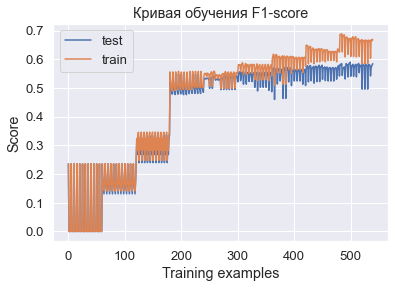

In [115]:
test_scores = grid_search_rf_down.cv_results_['mean_test_f1']
train_scores = grid_search_rf_down.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

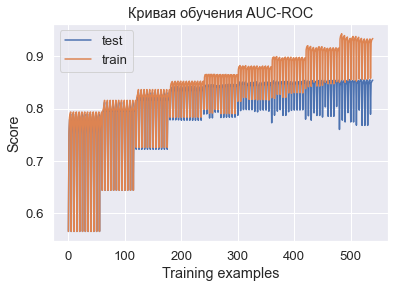

In [116]:
test_scores = grid_search_rf_down.cv_results_['mean_test_roc_auc']
train_scores = grid_search_rf_down.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, практически равный установленному порогу точности для проекта. Значение f1-score - 0.590(округленное значение) при целевом - 0.59. AUC-ROC достаточно высокое - 0.855 и выше чем для случайной модели -0.5. 

Инициализируем модель логистической регрессии. Подберем наилучшие значения гиперпараметров для алгоритма LogisticRegression("логистическая регрессия"). 

In [117]:
imba_pipeline_lr_down = make_pipeline(TomekLinks(), LogisticRegression(random_state=12345))
params = {    'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
              'max_iter': range (0,1000,100)
              }
new_params = {'logisticregression__' + key: params[key] for key in params}                                    
grid_search_lr_down = GridSearchCV(
              imba_pipeline_lr_down,
              param_grid=new_params,
              cv = 3, 
              verbose=100,
              scoring = SCORING,
              refit='f1',
              return_train_score=True
              )
grid_search_lr_down.fit(features_train, target_train)
metrics_columns_lr_down = [f'mean_test_{x}' for x in SCORING]
final_metrics_lr_down = pd.DataFrame(grid_search_lr_down.cv_results_)[metrics_columns_lr_down].iloc[grid_search_lr_down.best_index_]

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START logisticregression__max_iter=0, logisticregression__solver=lbfgs
[CV 1/3; 1/50] END logisticregression__max_iter=0, logisticregression__solver=lbfgs; f1: (train=0.010, test=0.012) roc_auc: (train=0.715, test=0.717) total time=   0.1s
[CV 2/3; 1/50] START logisticregression__max_iter=0, logisticregression__solver=lbfgs
[CV 2/3; 1/50] END logisticregression__max_iter=0, logisticregression__solver=lbfgs; f1: (train=0.012, test=0.012) roc_auc: (train=0.714, test=0.718) total time=   0.1s
[CV 3/3; 1/50] START logisticregression__max_iter=0, logisticregression__solver=lbfgs
[CV 3/3; 1/50] END logisticregression__max_iter=0, logisticregression__solver=lbfgs; f1: (train=0.019, test=0.004) roc_auc: (train=0.720, test=0.710) total time=   0.1s
[CV 1/3; 2/50] START logisticregression__max_iter=0, logisticregression__solver=liblinear
[CV 1/3; 2/50] END logisticregression__max_iter=0, logisticregression__solver=libli

[CV 3/3; 11/50] END logisticregression__max_iter=200, logisticregression__solver=lbfgs; f1: (train=0.367, test=0.329) roc_auc: (train=0.765, test=0.757) total time=   0.1s
[CV 1/3; 12/50] START logisticregression__max_iter=200, logisticregression__solver=liblinear
[CV 1/3; 12/50] END logisticregression__max_iter=200, logisticregression__solver=liblinear; f1: (train=0.344, test=0.350) roc_auc: (train=0.763, test=0.765) total time=   0.1s
[CV 2/3; 12/50] START logisticregression__max_iter=200, logisticregression__solver=liblinear
[CV 2/3; 12/50] END logisticregression__max_iter=200, logisticregression__solver=liblinear; f1: (train=0.349, test=0.343) roc_auc: (train=0.765, test=0.762) total time=   0.1s
[CV 3/3; 12/50] START logisticregression__max_iter=200, logisticregression__solver=liblinear
[CV 3/3; 12/50] END logisticregression__max_iter=200, logisticregression__solver=liblinear; f1: (train=0.367, test=0.328) roc_auc: (train=0.765, test=0.757) total time=   0.1s
[CV 1/3; 13/50] START

[CV 2/3; 22/50] END logisticregression__max_iter=400, logisticregression__solver=liblinear; f1: (train=0.349, test=0.343) roc_auc: (train=0.765, test=0.762) total time=   0.1s
[CV 3/3; 22/50] START logisticregression__max_iter=400, logisticregression__solver=liblinear
[CV 3/3; 22/50] END logisticregression__max_iter=400, logisticregression__solver=liblinear; f1: (train=0.367, test=0.328) roc_auc: (train=0.765, test=0.757) total time=   0.1s
[CV 1/3; 23/50] START logisticregression__max_iter=400, logisticregression__solver=sag
[CV 1/3; 23/50] END logisticregression__max_iter=400, logisticregression__solver=sag; f1: (train=0.343, test=0.351) roc_auc: (train=0.763, test=0.765) total time=   0.2s
[CV 2/3; 23/50] START logisticregression__max_iter=400, logisticregression__solver=sag
[CV 2/3; 23/50] END logisticregression__max_iter=400, logisticregression__solver=sag; f1: (train=0.348, test=0.341) roc_auc: (train=0.765, test=0.762) total time=   0.1s
[CV 3/3; 23/50] START logisticregression_

[CV 1/3; 33/50] END logisticregression__max_iter=600, logisticregression__solver=sag; f1: (train=0.343, test=0.351) roc_auc: (train=0.763, test=0.765) total time=   0.1s
[CV 2/3; 33/50] START logisticregression__max_iter=600, logisticregression__solver=sag
[CV 2/3; 33/50] END logisticregression__max_iter=600, logisticregression__solver=sag; f1: (train=0.348, test=0.341) roc_auc: (train=0.765, test=0.762) total time=   0.1s
[CV 3/3; 33/50] START logisticregression__max_iter=600, logisticregression__solver=sag
[CV 3/3; 33/50] END logisticregression__max_iter=600, logisticregression__solver=sag; f1: (train=0.367, test=0.329) roc_auc: (train=0.765, test=0.757) total time=   0.1s
[CV 1/3; 34/50] START logisticregression__max_iter=600, logisticregression__solver=saga
[CV 1/3; 34/50] END logisticregression__max_iter=600, logisticregression__solver=saga; f1: (train=0.343, test=0.351) roc_auc: (train=0.763, test=0.765) total time=   0.2s
[CV 2/3; 34/50] START logisticregression__max_iter=600, l

[CV 3/3; 43/50] END logisticregression__max_iter=800, logisticregression__solver=sag; f1: (train=0.367, test=0.329) roc_auc: (train=0.765, test=0.757) total time=   0.2s
[CV 1/3; 44/50] START logisticregression__max_iter=800, logisticregression__solver=saga
[CV 1/3; 44/50] END logisticregression__max_iter=800, logisticregression__solver=saga; f1: (train=0.343, test=0.351) roc_auc: (train=0.763, test=0.765) total time=   0.2s
[CV 2/3; 44/50] START logisticregression__max_iter=800, logisticregression__solver=saga
[CV 2/3; 44/50] END logisticregression__max_iter=800, logisticregression__solver=saga; f1: (train=0.348, test=0.341) roc_auc: (train=0.765, test=0.762) total time=   0.2s
[CV 3/3; 44/50] START logisticregression__max_iter=800, logisticregression__solver=saga
[CV 3/3; 44/50] END logisticregression__max_iter=800, logisticregression__solver=saga; f1: (train=0.367, test=0.329) roc_auc: (train=0.765, test=0.757) total time=   0.1s
[CV 1/3; 45/50] START logisticregression__max_iter=80

In [118]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_lr_down.best_score_}')
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_lr_down.cv_results_['mean_test_roc_auc'][grid_search_lr_down.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_lr_down.best_params_}')

Значение f1: 0.3404329813264777
Значение auc-roc: 0.761193521029018
Лучшие параметры: {'logisticregression__max_iter': 100, 'logisticregression__solver': 'liblinear'}


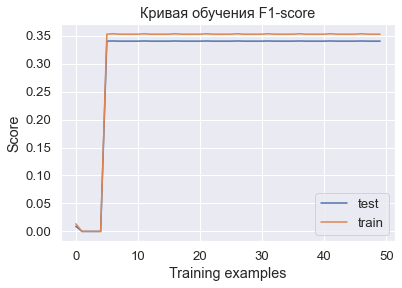

In [119]:
test_scores = grid_search_lr_down.cv_results_['mean_test_f1']
train_scores = grid_search_lr_down.cv_results_['mean_train_f1'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения F1-score')
plt.show()

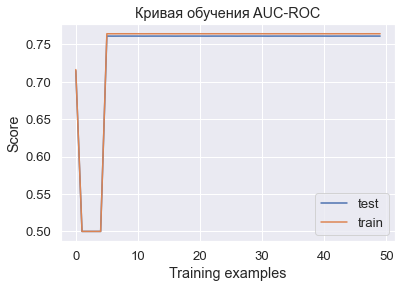

In [120]:
test_scores = grid_search_lr_down.cv_results_['mean_test_roc_auc']
train_scores = grid_search_lr_down.cv_results_['mean_train_roc_auc'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Кривая обучения AUC-ROC')
plt.show()

Модель показала результат на валидационной выборке, не превышающий установленный порог точности для проекта. Значение f1-score - 0.340 при целевом - 0.59. AUC-ROC также не очень высокое - 0.761, хотя, конечно, выше чем для случайной модели -0.5. Это худший результат среди моделей.

Составим сводную таблицу с результами исследуемых моделей.

In [122]:
models = [type(grid_search_dt_class.best_estimator_).__name__, type(grid_search_dt_up.best_estimator_).__name__, type(grid_search_dt_down.best_estimator_).__name__, type(grid_search_rf_class.best_estimator_).__name__, type(grid_search_rf_up.best_estimator_).__name__, type(grid_search_rf_down.best_estimator_).__name__, type(grid_search_lr_class.best_estimator_).__name__, type(grid_search_lr_up.best_estimator_).__name__, type(grid_search_lr_down.best_estimator_).__name__]  
techniques = ['взвешивание классов', 'upsampling', 'downsampling', 'взвешивание классов', 'upsampling', 'downsampling', 'взвешивание классов', 'upsampling', 'downsampling']
f1 = [final_metrics_dt_class[0], final_metrics_dt_up[0], final_metrics_dt_down[0], final_metrics_rf_class[0], final_metrics_rf_up[0], final_metrics_rf_down[0], final_metrics_lr_class[0], final_metrics_lr_up[0], final_metrics_lr_down[0]]
roc = [final_metrics_dt_class[1], final_metrics_dt_up[1], final_metrics_dt_down[1], final_metrics_rf_class[1], final_metrics_rf_up[1], final_metrics_rf_down[1], final_metrics_lr_class[1], final_metrics_lr_up[1], final_metrics_lr_down[1]]
parameters_best = [grid_search_dt_class.best_params_, grid_search_dt_up.best_params_, grid_search_dt_down.best_params_, grid_search_rf_class.best_params_, grid_search_rf_up.best_params_, grid_search_rf_down.best_params_, grid_search_lr_class.best_params_, grid_search_lr_up.best_params_, grid_search_lr_down.best_params_ ]
list_tuples = list(zip(models, techniques, f1, roc, parameters_best)) 
data = pd.DataFrame(list_tuples, columns=['Модель', 'Техника', 'F1-score', 'AUC-ROC', 'Лучшие параметры']) 
data.head(9)

Модель              Техника  F1-score   AUC-ROC  \
0  DecisionTreeClassifier  взвешивание классов  0.565445  0.822137   
1                Pipeline           upsampling  0.562270  0.821763   
2                Pipeline         downsampling  0.575644  0.822171   
3  RandomForestClassifier  взвешивание классов  0.613248  0.853569   
4                Pipeline           upsampling  0.593591  0.843299   
5                Pipeline         downsampling  0.589573  0.855407   
6      LogisticRegression  взвешивание классов  0.487012  0.764286   
7                Pipeline           upsampling  0.480965  0.751135   
8                Pipeline         downsampling  0.340433  0.761194   

                                                                                                                                                                      Лучшие параметры  
0                                                                                                                                             {'criterion': 'entropy', 'max_depth': 7}  
1                                                                                             {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5}  
2                                                                                                {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 7}  
3                                                                                                  {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 31}  
4  {'randomforestclassifier__max_depth': 9, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__n_estimators': 31}  
5  {'randomforestclassifier__max_depth': 9, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__n_estimators': 41}  
6                                                                                                                                             {'max_iter': 100, 'solver': 'liblinear'}  
7                                                                                                           {'logisticregression__max_iter': 0, 'logisticregression__solver': 'lbfgs'}  
8                                                                                                     {'logisticregression__max_iter': 100, 'logisticregression__solver': 'liblinear'}

*Вывод:* Мы исследовали три модели: решающее дерево, случайный лес и логистическую регрессию с использованием различных техник борьбы с дисбалансом классов (взвешивание классов, upsampling, downsampling). Для всех моделей мы подобрали оптимальные гиперпараметры. Можно сделать вывод, что лучшие значения наблюдаются у модели случайного леса, ее качество лучше чем у решающего дерева, что закономерно, так как в модели случайного леса мы используем ансамбль решающих деревьев, а не одно дерево. Худшее значение метрики качества показала логистическая регрессия, что тоже закономерный результат, ее преимущество это время работы, а в точности она уступает двум предыдущим моделям. Наилучшее качество модели, таким образом, показал случайный лес - f1 - 0.613, auc-roc - 0.854 для техники взвешивание классов.Гиперпараметры лучшей модели : 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 31.

## Оценка модели и результатов

Проведем тестирование на тестовой выборке модели RandomForestClassifier с лучшими гиперпараметрами для техники борьбы с дисбалансом классов- взвешивание классов, которая показала на предыдущем этапе лучшие метрики качества.

F1:  0.636036036036036


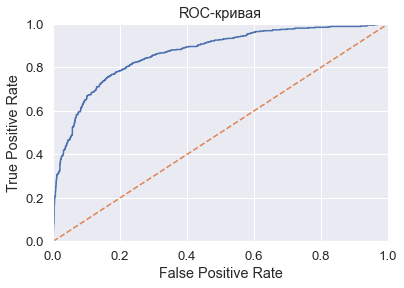

AUC-ROC: 0.867813313150829


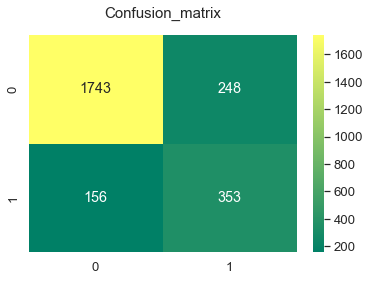

In [123]:
predictions_test_rf = grid_search_rf_class.predict(features_test)
f1_score_test_rf = f1_score(target_test, predictions_test_rf)
print("F1: ", f1_score_test_rf)

# код ROC- кривой и расчет AUC-ROC
probabilities_test = grid_search_rf_class.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr,tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("AUC-ROC:", auc_roc)

sns.heatmap(confusion_matrix(target_test, predictions_test_rf), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

F1- score (F1-мера) - агрегируюшая метрика, позволяющая параллельно контролировать полноту и точность и являющаяся средним гармоническим полноты и точности. Полнота и точность оченивают качество прогноза положительного класса с разных позиций. Recall описывает, насколько хорошо модель распознает классы, при этом Precision выявляет ситуацию, когда положительные метрики присваиваются излишне часто. Когда полнота или точность близки к нулю, то к 0 приближается и само среднее гармоническое.

Модель показала результат на тестовой выборке, превышающий установленный порог точности для проекта. Значение f1 - score - 0.636, пороговое значение - 0.59. 

ROC-кривая (или кривая ошибок) - это график зависимости доли истинно положительных ответов(TPR) от доли ложноположительных ответов (FPR).

Чтобы выявить насколько значительно наша модель отличается от случайной вычислим площадь под ROC-кривой. 
AUC-ROC (англ. Area Under Curve ROC) - это метрика качества классификации, равная площади под ROC-кривой.Значения метрики изменяются от 0 до 1. При этом для случайной модели AUC-ROC равна 0.5.

AUC-ROC - 0.868, т.е. значительно превышает случайное значение, при этом и F1- score превышает пороговое значение проекта.

Матрица неточностей (англ. Confusion Matrix) — это таблица или диаграмма, показывающая точность прогнозирования классификатора в отношении двух и более классов. Прогнозы классификатора находятся на оси X, а результат (точность) — на оси Y. Наш классификатор определил верно принадлежность к классу 1 (True Positive = 353), и принадлежность к классу 0 (True Negative = 1743) и допустил ошибки в определении классов (False Negative = 156, False Positive  = 248). Иными словами, 2096 значений из 2500 предсказаны верно.

Проверим адекватность модели.

In [124]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(features_train, target_train)
predictions_test = dummy_model.predict(features_test)
print("F1:", f1_score(target_test, predictions_test))

F1: 0.0


0    0.7963
1    0.2037
Name: Exited, dtype: float64


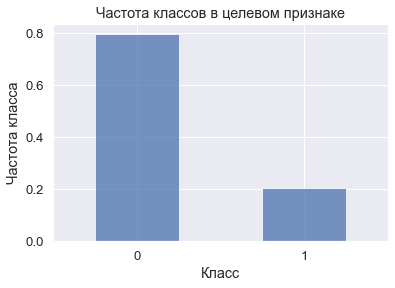

0    0.7596
1    0.2404
dtype: float64


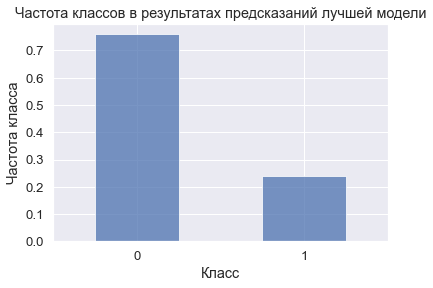

F1: 0.0


In [125]:
# проверка адекватности лучшей модели
class_frequency_target=df['Exited'].value_counts(normalize=True)
print(class_frequency_target)
class_frequency_target.plot(kind='bar', alpha=0.75, rot=0)
plt.title('Частота классов в целевом признаке')
plt.xlabel('Класс')
plt.ylabel('Частота класса')
plt.show()

# чтобы работала функция value_counts(),мы преобразовали результат к pd.Series
predicted_test = pd.Series(grid_search_rf_class.predict(features_test))

class_frequency = predicted_test.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', alpha=0.75, rot=0)
plt.title('Частота классов в результатах предсказаний лучшей модели')
plt.xlabel('Класс')
plt.ylabel('Частота класса')
plt.show()

target_pred_constant = pd.Series(0, index=target_test.index)
print("F1:", f1_score(target_test, target_pred_constant))



Проверим модель на адекватность( англ. sanity check). В процессе данной проверки производится сравнение модели со случайной для оценки ее адекватности.
У нас в датасете наблюдается следующее распределение классов 79.63% - нулей и 20,37% единиц. Наблюдается значительный дисбаланс классов. Если мы возьмем самое примитивное предсказание состоящее только из значений наиболее часто встречающегося класса, т.е. нулей. F1- score (F1-мера) - агрегируюшая метрика, позволяющая параллельно контролировать полноту и точность и являющаяся средним гармоническим полноты и точности. Полнота и точность оченивают качество прогноза положительного класса с разных позиций. Recall описывает, насколько хорошо модель распознает классы, при этом Precision выявляет ситуацию, когда положительные метрики присваиваются излишне часто. Когда полнота или точность близки к нулю, то к 0 приближается и само среднее гармоническое. То есть для нашей модели мы получим в итоге F1-score - 0.
С помощью DummyClassifier смоделируем вышеописанную ситуацию.  Теперь сравним данное значение с f1-score наших моделей, полученных на тестовой выборке, в том числе лучшей. Все наши модели имеют значительно более высокую прогностическую ценность. Например, лучшая модель случайного леса имеет f1-score - 0.636. 

*Вывод:* Проверка качества лучшей модели случайного леса с техникой взвешивание классов на тестовой выборке показало F1-score - 0.636, т.е. превышает установленный в проекте порог точности на 0.046, AUC-ROC - 0.868 превышает данный показатель для случайной модели- 0.5. Гиперпараметры лучшей модели : 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 31, техника борьбы с дисбалансом классов - взвешивание классов.  Все наши модели , в том числе лучшая, прошли тест на адекватность и имеют лучшую прогностическую ценность, чем примитивная модель, состоящая из значения наиболее часто встречающегося класса. 

## Выводы

В рамках проекта исследованы три типа моделей для задачи классификации, позволяющие на основании исторических данных о поведении клиентов и расторжении договоров с банком спрогнозировать уйдёт клиент из банка в ближайшее время или нет. Исследованные модели: решающее дерево, случайный лес и логистическая регрессия. Наилучшая модель по результатам исследования - случайный лес со следующими гиперпараметрами: 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 31. Техника, которая была использована для устранения дисбаланса классов, взвешивание классов.
На тестовой выборке для данной модели получено значение F1-score- 0.636 при пороговом значении для проекта - 0.59, что превышает пороговое значение на 0.046; AUC-ROC для данной модели- 0.868, что значительно превышает данный показатель для случайной модели - 0.5. Проведен тест модели на адекватность.
Используя данную модель Банк Х может прогнозировать уход клиентов банка.